# Organoid Learning Evaluation
Using the CartPole system as a dynamic control task, these methods evaluate the adaptive learning capacity of cortical organoids using short, high-frequency training signals to targeted neurons.

In [4]:
import os
import sys
import numpy as np
import pickle
import importlib
import matplotlib.pyplot as plt
import pandas as pd
from pexpect.pxssh import pxssh

# Check module path
module_path = os.path.abspath(os.path.join(''))  # adjust if needed
if module_path not in sys.path:
    sys.path.append(module_path)

# Import / reload full modules
import core.data_loader as data_loader
importlib.reload(data_loader)
import core.analysis_utils as analysis_utils
importlib.reload(analysis_utils)
import viz.plots_general as plots_general
importlib.reload(plots_general)
import braindance
importlib.reload(braindance)
import core.map_utils as map_utils
importlib.reload(map_utils)
import OrgLearningEval
importlib.reload(OrgLearningEval)

# Import specific functions
from OrgLearningEval import OrgLearningEval


In [69]:
# Check if core directory is in sys.path

# Print out current working directory
print("Current working directory:", os.getcwd())

# Print search path list
print("\nPython sys.path:")
for p in sys.path:
    print("  ", p)

# Check whether 'core/data_loader.py' exists from this working directory
core_path = os.path.join(os.getcwd(), "core", "data_loader.py")
print("\nChecking for core/data_loader.py:")
print("Exists" if os.path.exists(core_path) else "  NOT FOUND")

# Check core directory contents
print("Contents of ./core/:", os.listdir("./core"))

Current working directory: /Users/main_mac/data/org_eval

Python sys.path:
   /Users/main_mac/data
   /Users/main_mac/data/org_eval/braindance
   /Users/main_mac/Applications/DataSpell.app/Contents/plugins/python-ce/helpers/pydev
   /Users/main_mac/Applications/DataSpell.app/Contents/plugins/python-ce/helpers-pro/jupyter_debug
   /opt/anaconda3/envs/brain/lib/python310.zip
   /opt/anaconda3/envs/brain/lib/python3.10
   /opt/anaconda3/envs/brain/lib/python3.10/lib-dynload
   
   /opt/anaconda3/envs/brain/lib/python3.10/site-packages
   /Users/main_mac/data/org_eval
   /opt/anaconda3/envs/brain/lib/python3.10/site-packages/setuptools/_vendor

Checking for core/data_loader.py:
Exists
Contents of ./core/: ['data_loader.py', '__init__.py', 'spike_data_utils.py', '__pycache__', 'map_utils.py', 'analysis_utils.py']


In [3]:
try:
    from core.data_loader import load_pickle, load_datasets
    print("Imported successfully.")
except Exception as e:
    print("Import failed:", e)


Imported successfully.


In [5]:
ole = OrgLearningEval()  # Loads all datasets and keys contained, sets "Baseline" as default dataset, and prints confirmation

Loaded log data for Adaptive: <class 'dict'>, 5 entries
  Keys in Adaptive log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Random: <class 'dict'>, 5 entries
  Keys in Random log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Null: <class 'dict'>, 5 entries
  Keys in Null log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
Loaded metadata keys: ['mapping', 'fs', 'stim_electrodes', 'stim_inds', 'encode_electrodes', 'encode_inds', 'decode_electrodes', 'training_electrodes', 'training_inds', 'spike_channels', 'spike_locs']
Loaded spike data for Baseline: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Adaptive: <class 'spikedata.spikedata.Spike

Switched to dataset: Adaptive


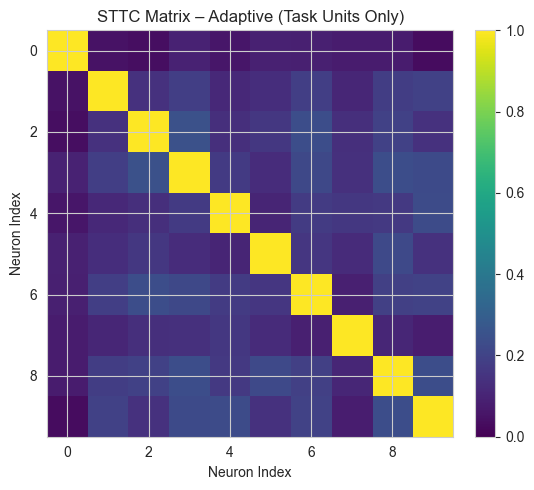

In [5]:
# View the STTC heatmap for the task neurons in the Adaptive conditions

# Set dataset to Adaptive
ole.set_dataset("Adaptive")

# Get task unit IDs
task_unit_ids = ole.task_unit_ids

# Plot STTC matrix using only task neurons
ole.show_spike_time_tilings(
    condition="Adaptive",
    start_ms=0,
    end_ms=None,
    unit_ids=task_unit_ids,
    title="STTC Matrix – Adaptive (Task Units Only)"
)

In [6]:
print("Stim Indices:", ole.metadata["stim_inds"])
print("Training Indices:", ole.metadata["training_inds"])
print("Encode Indices:", ole.metadata["encode_inds"])

Stim Indices: [0 1 2 3 4 5 6 7]
Training Indices: [1, 2, 3, 4, 5, 6]
Encode Indices: [0, 7]


In [7]:
# Get the labeled task unit info table from metadata
df = ole.metadata["task_unit_info"]

# Filter only the rows with assigned task roles
task_units = df[df["is_task_unit"] == True]

# Print to console
print(task_units)

   channel  electrode       x       y      role  is_task_unit
0        0      18598  2065.0  1470.0    encode          True
1        1      20644  3220.0  1627.5  training          True
2        2      19040  2100.0  1505.0  training          True
3        3      21723  2852.5  1715.0  training          True
4        4      14939  3482.5  1172.5  training          True
5        5      21078  3115.0  1662.5  training          True
6        6      17051  1942.5  1347.5  training          True
7        7      15172  3710.0  1190.0    encode          True
8        8      18817  2047.5  1487.5    decode          True
9        9      20640  3150.0  1627.5    decode          True



First-Order Weighted Latencies (±15 ms) — Causal Matrices - Baseline (0–15 min, ±15 ms)
  [0, 1] = -1.90 ms
  [0, 2] = 6.04 ms
  [0, 3] = 0.77 ms
  [0, 4] = 0.57 ms
  [0, 5] = -0.07 ms
  [0, 6] = -0.51 ms
  [0, 7] = -0.36 ms
  [0, 8] = -0.53 ms
  [0, 9] = 0.16 ms
  [1, 0] = 0.82 ms
  [1, 2] = 1.94 ms
  [1, 3] = 1.12 ms
  [1, 4] = -0.50 ms
  [1, 5] = -0.83 ms
  [1, 6] = 0.13 ms
  [1, 7] = -0.89 ms
  [1, 8] = -0.16 ms
  [1, 9] = 0.95 ms
  [2, 0] = -5.99 ms
  [2, 1] = -1.94 ms
  [2, 3] = -0.89 ms
  [2, 4] = -1.76 ms
  [2, 5] = -0.37 ms
  [2, 6] = -0.07 ms
  [2, 7] = -0.02 ms
  [2, 8] = -0.46 ms
  [2, 9] = -0.75 ms
  [3, 0] = -0.16 ms
  [3, 1] = -2.06 ms
  [3, 2] = 1.08 ms
  [3, 4] = 0.27 ms
  [3, 5] = -0.18 ms
  [3, 6] = -0.22 ms
  [3, 7] = -2.00 ms
  [3, 8] = 0.32 ms
  [3, 9] = -0.02 ms
  [4, 0] = 0.06 ms
  [4, 1] = 0.33 ms
  [4, 2] = 1.90 ms
  [4, 3] = 0.06 ms
  [4, 5] = 2.01 ms
  [4, 6] = -0.87 ms
  [4, 7] = 0.30 ms
  [4, 8] = -0.11 ms
  [4, 9] = 0.02 ms
  [5, 0] = 0.27 ms
  [5, 1] = 

condition  start_ms  end_ms  \
0  Baseline         0  900000   
1  Adaptive         0  900000   
2    Random         0  900000   
3      Null         0  900000   

                                  first_order_matrix  \
0  [[0.0, -1.9029850746268662, 6.038681948424069,...   
1  [[0.0, 1.9311377245508987, 2.24835886214442, 0...   
2  [[0.0, 2.5582750582750586, 3.544386422976501, ...   
3  [[0.0, 2.5572519083969465, 3.5038119440914866,...   

                                  multi_order_matrix  
0  [[0.0, -1.9029850746268662, 6.038681948424069,...  
1  [[0.0, 1.9311377245508987, 2.24835886214442, 0...  
2  [[0.0, 2.5582750582750586, 3.544386422976501, ...  
3  [[0.0, 2.5572519083969465, 3.5038119440914866,...

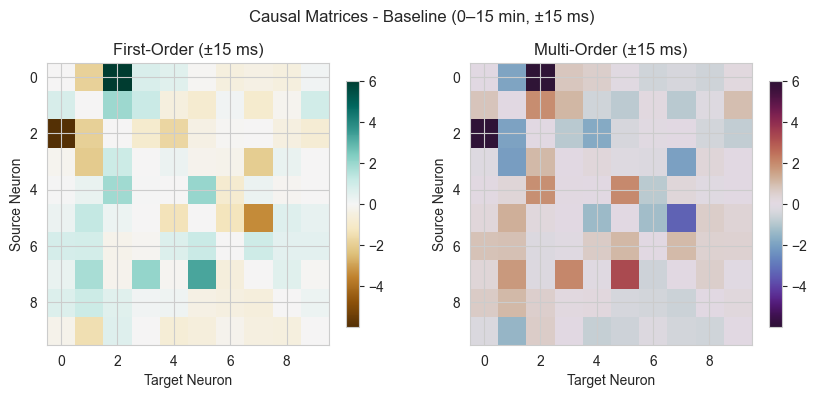

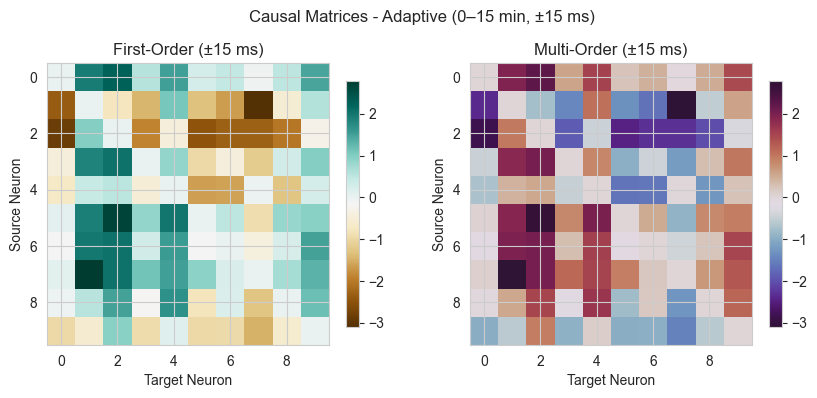

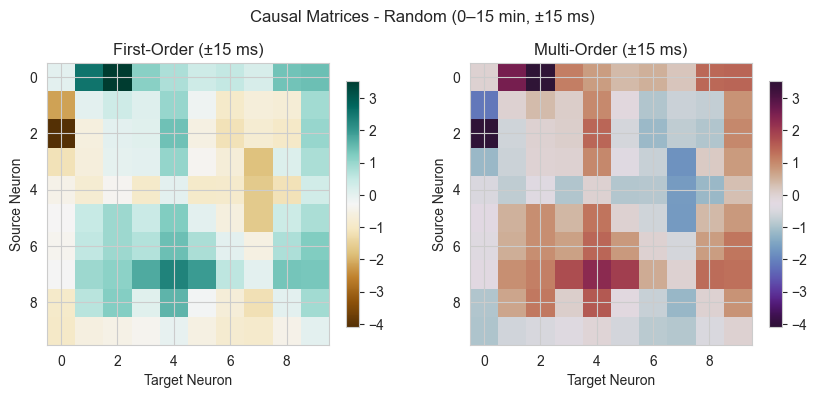

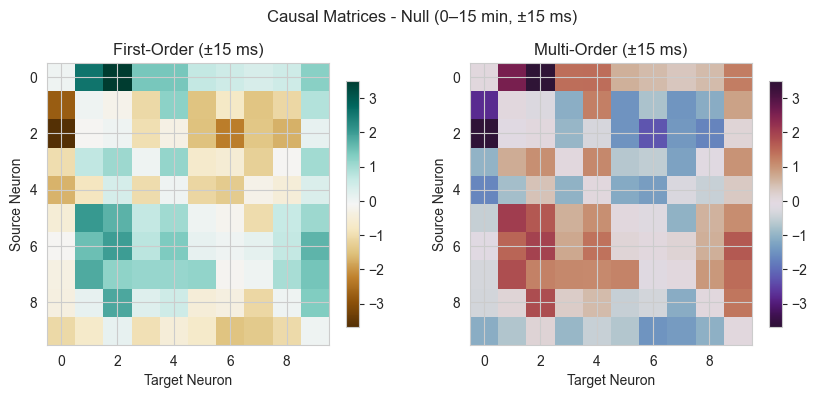

In [6]:
########################################
# Rank order Analysis
########################################

import numpy as np
import pandas as pd
from scipy.stats import spearmanr

# ======= Step 1: Get causal matrices and compute firing order =========
# Get task unit IDs from the metadata DataFrame (channel = internal unit index)
task_units = ole.metadata["task_unit_info"]
task_unit_ids = task_units[task_units["is_task_unit"] == True]["channel"].tolist()
task_unit_ids = list(map(int, task_unit_ids))  # Ensure they're int and 1D

# Store causal matrices as metadata
causal_matrices = []

# Compute and plot causal matrices using proper unit IDs
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.compute_causal_matrices(
        condition=cond,
        start_ms=0,
        end_ms=900000,
        unit_ids=task_unit_ids,
        max_latency_ms=15  # <-- correct window for first-order inference
    )

    first = ole.causal_latency_matrices[(cond, 0, 900000)]
    multi = ole.multi_order_matrices[(cond, 0, 900000)]

    causal_matrices.append({
        "condition": cond,
        "start_ms": 0,
        "end_ms": 900000,
        "first_order_matrix": first,
        "multi_order_matrix": multi
    })

    ole.show_causal_plot_from_matrices(
        first_order=first,
        multi_order=multi,
        title=f"Causal Matrices - {cond} (0–15 min, ±15 ms)",
        unit_ids=task_unit_ids,
        max_latency_ms=15  # <-- correct window for first-order inference
    )


# Save results as DataFrame
df_causal_matrices = pd.DataFrame(causal_matrices)
df_causal_matrices.to_pickle("latency_analysis_cache/causal_matrices.pkl")
display(df_causal_matrices)


In [9]:
from scipy.stats import spearmanr
import pandas as pd

# 1. Load the matrix cache and re-register
df_causal_matrices = pd.read_pickle("latency_analysis_cache/causal_matrices.pkl")
for _, row in df_causal_matrices.iterrows():
    key = (row["condition"], row["start_ms"], row["end_ms"])
    ole.causal_latency_matrices[key] = row["first_order_matrix"]
    ole.multi_order_matrices[key] = row["multi_order_matrix"]

# 2. Get baseline matrix and compute firing order
baseline_mat = ole.causal_latency_matrices[("Baseline", 0, 900000)]
firing_order_baseline, _ = ole.compute_firing_order_from_causal_matrix(baseline_mat, condition="Baseline")
rank_ref = pd.Series(range(len(firing_order_baseline)), index=firing_order_baseline)

# Step 2: Compare to each condition
results = []

for condition in ["Adaptive", "Null", "Random"]:
    try:
        cond_key = next(k for k in ole.causal_latency_matrices if k[0] == condition)
        mat = ole.causal_latency_matrices[cond_key]
    except StopIteration:
        print(f"Missing matrix for {condition}, computing...")
        ole.compute_causal_matrices(
            condition=condition,
            start_ms=0,
            end_ms=900000,
            unit_ids=task_unit_ids
        )
        cond_key = (condition, 0, 900000)
        mat = ole.causal_latency_matrices[cond_key]

    # Compute firing order
    order, _ = ole.compute_firing_order_from_causal_matrix(mat, condition=condition)
    rank_test = pd.Series(range(len(order)), index=order)

    # Spearman correlation
    common_units = rank_ref.index.intersection(rank_test.index)
    if len(common_units) > 0:
        corr, _ = spearmanr(rank_ref[common_units], rank_test[common_units])
    else:
        corr = None

    results.append({
        "condition": condition,
        "rank_corr": corr,
        "method": "latency_firing_order",
        "n_units": len(common_units)
    })

# Step 3: Save and view results
df_rank_corr = pd.DataFrame(results)
df_rank_corr.to_pickle("latency_analysis_cache/rank_order_backbone_firing.pkl")
display(df_rank_corr)


condition  rank_corr                method  n_units
0  Adaptive   0.800747  latency_firing_order      108
1      Null   0.804596  latency_firing_order      108
2    Random   0.845380  latency_firing_order      108

In [10]:
# Print top 20 units from each firing order
for cond in ["Baseline", "Adaptive", "Null", "Random"]:
    result = ole.firing_order_results.get((cond, "first_order"))
    if result:
        print(f"\n{cond} Firing Order (Top 20):")
        print(result["firing_order"][:20])
    else:
        print(f"{cond}: No firing order computed.")


Baseline Firing Order (Top 20):
[ 7  6  0  4  1  8 78 79 70 76 75 74 73 72 71 77 69 66 67 80]

Adaptive Firing Order (Top 20):
[ 7  0  5  6  3  8 78 79 70 76 75 74 73 72 71 77 69 66 67 80]

Null Firing Order (Top 20):
[ 0  7  6  5  8  3 78 79 70 76 75 74 73 72 71 77 69 66 67 80]

Random Firing Order (Top 20):
[ 0  7  6  5  8 79 78 77 76 75 74 73 72 71 70 69 67 80 66 65]


In [11]:
# Extract firing order ranks for all conditions
rows = []

for cond in ["Baseline", "Adaptive", "Null", "Random"]:
    res = ole.firing_order_results.get((cond, "first_order"))
    if not res:
        print(f"Missing firing order for {cond}")
        continue

    order = res["firing_order"]
    for rank, unit_id in enumerate(order):
        rows.append({
            "condition": cond,
            "unit_id": unit_id,
            "rank": rank
        })

# Create DataFrame and pivot for easy diffing
df_ranks = pd.DataFrame(rows)
df_ranks.to_pickle("latency_analysis_cache/firing_orders_first.pkl")
display(df_ranks.head(10))

condition  unit_id  rank
0  Baseline        7     0
1  Baseline        6     1
2  Baseline        0     2
3  Baseline        4     3
4  Baseline        1     4
5  Baseline        8     5
6  Baseline       78     6
7  Baseline       79     7
8  Baseline       70     8
9  Baseline       76     9

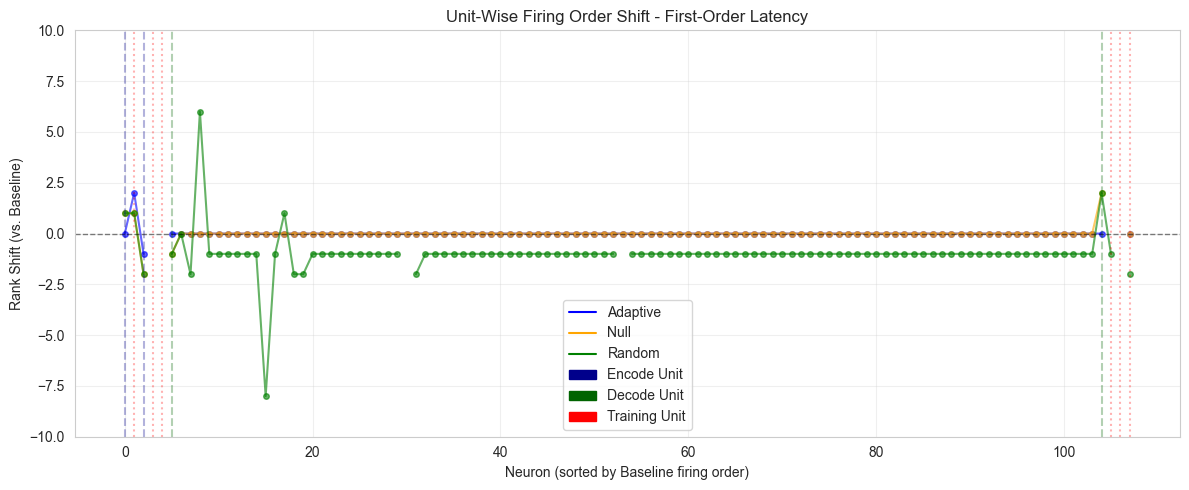

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Load cached firing orders
df_ranks = pd.read_pickle("latency_analysis_cache/firing_orders_first.pkl")

# Pivot to get rank per condition
df_pivot = df_ranks.pivot(index="unit_id", columns="condition", values="rank")

# Assign roles directly from unit_id (channel) using task_unit_info
role_map = ole.metadata["task_unit_info"].set_index("channel")["role"].to_dict()
df_pivot["role"] = df_pivot.index.map(role_map)

# Sort by baseline order
firing_order_baseline = ole.firing_order_results[("Baseline", "first_order")]["firing_order"]
df_pivot = df_pivot.loc[firing_order_baseline]

# Compute deltas
for cond in ["Adaptive", "Null", "Random"]:
    df_pivot[f"{cond}_delta"] = df_pivot[cond] - df_pivot["Baseline"]

# Plot
plt.figure(figsize=(12, 5))
x_vals = range(len(df_pivot))
colors = {"Adaptive": "blue", "Null": "orange", "Random": "green"}

for cond in colors:
    deltas = df_pivot[f"{cond}_delta"].copy()
    deltas[np.abs(deltas) > 10] = np.nan  # hide outliers
    plt.plot(x_vals, deltas, label=cond,
             marker='o', linestyle='-', markersize=4, alpha=0.6, color=colors[cond])

# Highlight task-role neurons
role_colors = {"encode": "darkblue", "decode": "darkgreen", "training": "red"}
role_styles = {"encode": "--", "decode": "--", "training": ":"}

for idx, role in enumerate(df_pivot["role"]):
    if role in role_colors:
        plt.axvline(idx, color=role_colors[role], linestyle=role_styles[role], alpha=0.3)

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Create legend handles for task roles
role_legend_handles = [
    mpatches.Patch(color=color, label=f"{role.capitalize()} Unit")
    for role, color in role_colors.items()
]

# Create legend handles for condition lines
cond_legend_handles = [
    Line2D([0], [0], color=color, label=cond)
    for cond, color in colors.items()
]

# Combine and show legend
plt.legend(handles=cond_legend_handles + role_legend_handles, loc="best")

plt.axhline(0, linestyle="--", color="black", linewidth=1, alpha=0.5)
plt.ylim(-10, 10)
plt.xlabel("Neuron (sorted by Baseline firing order)")
plt.ylabel("Rank Shift (vs. Baseline)")
plt.title("Unit-Wise Firing Order Shift - First-Order Latency")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [13]:
ole = OrgLearningEval()
reward_df = ole.get_reward_df("Adaptive")
reward_df.head()

Loaded log data for Adaptive: <class 'dict'>, 5 entries
  Keys in Adaptive log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Random: <class 'dict'>, 5 entries
  Keys in Random log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Null: <class 'dict'>, 5 entries
  Keys in Null log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
Loaded metadata keys: ['mapping', 'fs', 'stim_electrodes', 'stim_inds', 'encode_electrodes', 'encode_inds', 'decode_electrodes', 'training_electrodes', 'training_inds', 'spike_channels', 'spike_locs']
Loaded spike data for Baseline: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Adaptive: <class 'spikedata.spikedata.Spike

time  episode  reward
0   3.911218        0    19.0
1  18.770805        1    56.0
2  24.654084        2    12.0
3  31.596691        3    17.0
4  38.112137        4    15.0

In [14]:
print("Adaptive Reward DataFrame:")
display(ole.get_reward_df("Adaptive").head(10))

print("\n Random Reward DataFrame:")
display(ole.get_reward_df("Random").head(10))

print("\n Null Reward DataFrame:")
display(ole.get_reward_df("Null").head(10))

Adaptive Reward DataFrame:


time  episode  reward
0   3.911218        0    19.0
1  18.770805        1    56.0
2  24.654084        2    12.0
3  31.596691        3    17.0
4  38.112137        4    15.0
5  44.167144        5    13.0
6  50.062327        6    14.0
7  56.332156        7    14.0
8  62.393498        8    13.0
9  93.602599        9   135.0


 Random Reward DataFrame:


time  episode  reward
0   10.916741        0    53.0
1   22.128940        1    38.0
2   28.397783        2    14.0
3   35.692659        3    19.0
4   63.851734        4   120.0
5   70.520720        5    16.0
6  116.594423        6   207.0
7  128.053490        7    41.0
8  138.297740        8    35.0
9  170.118700        9   140.0


 Null Reward DataFrame:


time  episode  reward
0   4.958258        0    24.0
1  18.258702        1    48.0
2  26.177174        2    22.0
3  36.393520        3    33.0
4  42.694989        4    14.0
5  48.358414        5    11.0
6  54.321791        6    14.0
7  60.856962        7    15.0
8  68.418198        8    20.0
9  81.352820        9    46.0

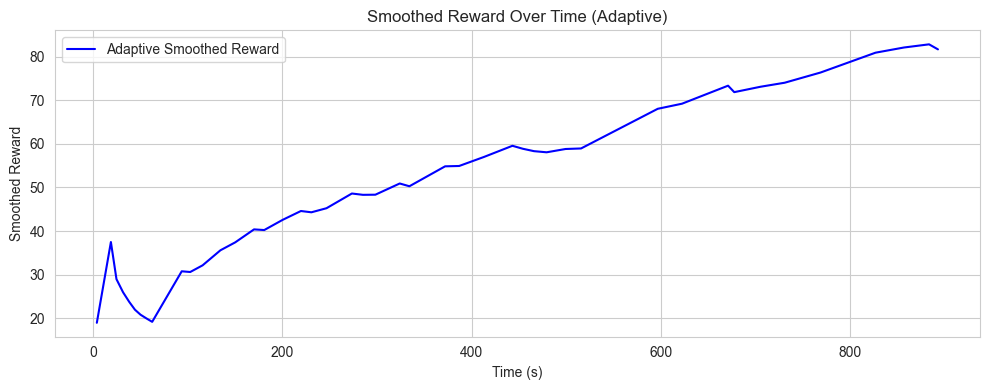

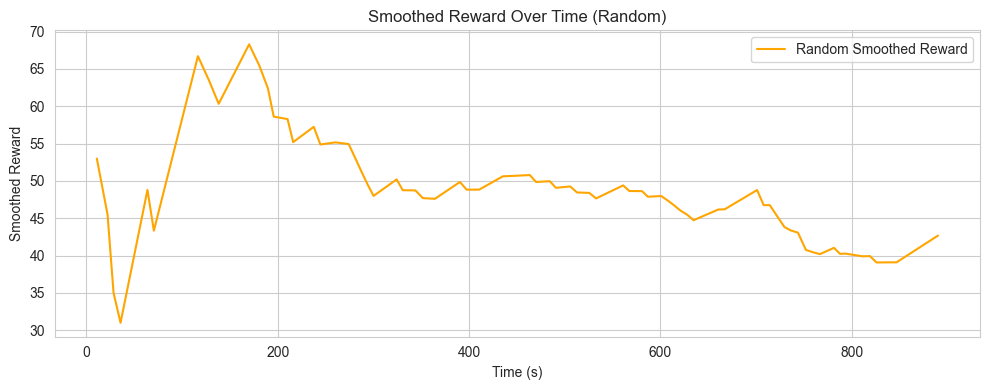

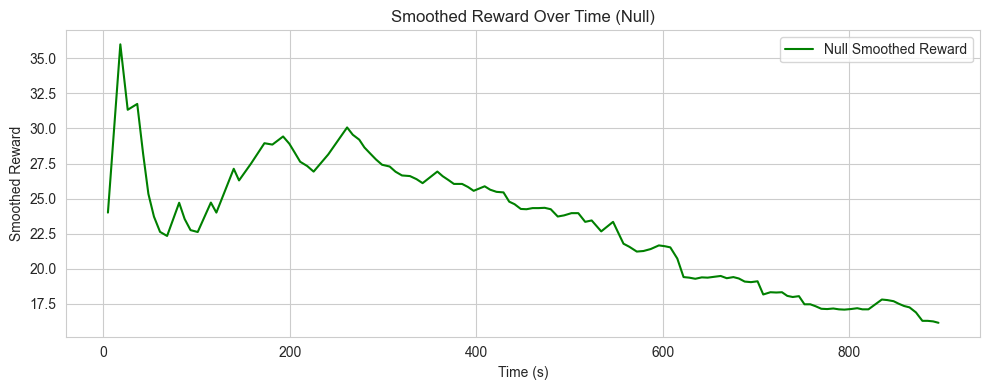

In [15]:
ole.show_reward_plot("Adaptive", color="blue")
ole.show_reward_plot("Random", color="orange")
ole.show_reward_plot("Null", color="green")

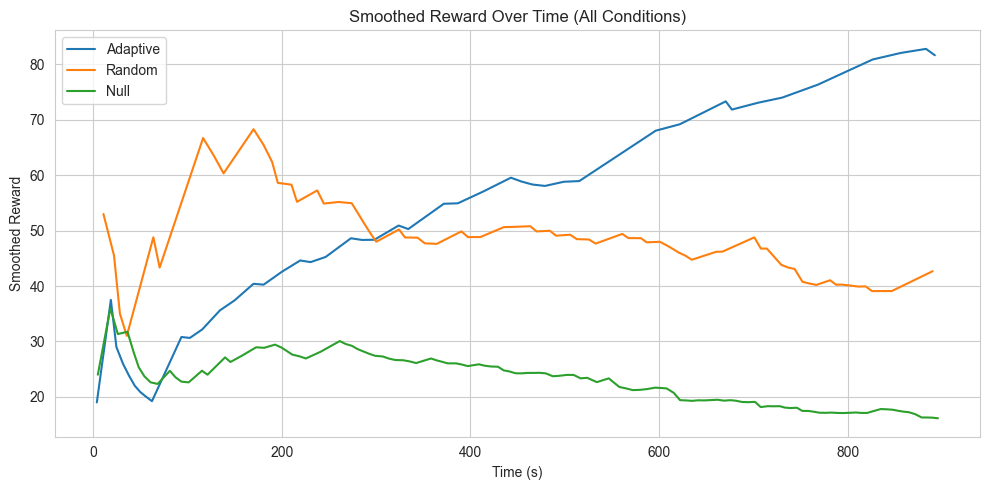

In [16]:
ole.show_all_rewards_overlay()

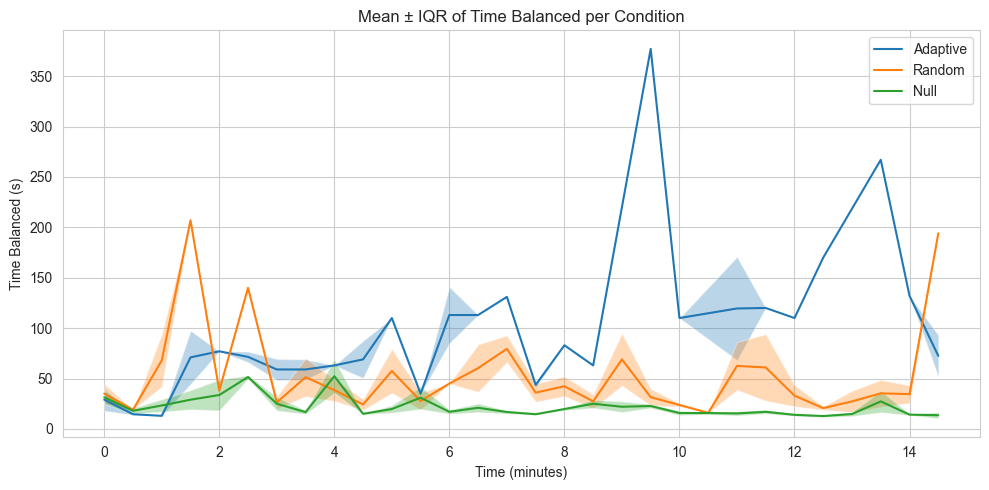

In [17]:
# Time balanced summary for all conditions
ole.show_performance_summary(bin_size=30, conditions=["Adaptive", "Random", "Null"])

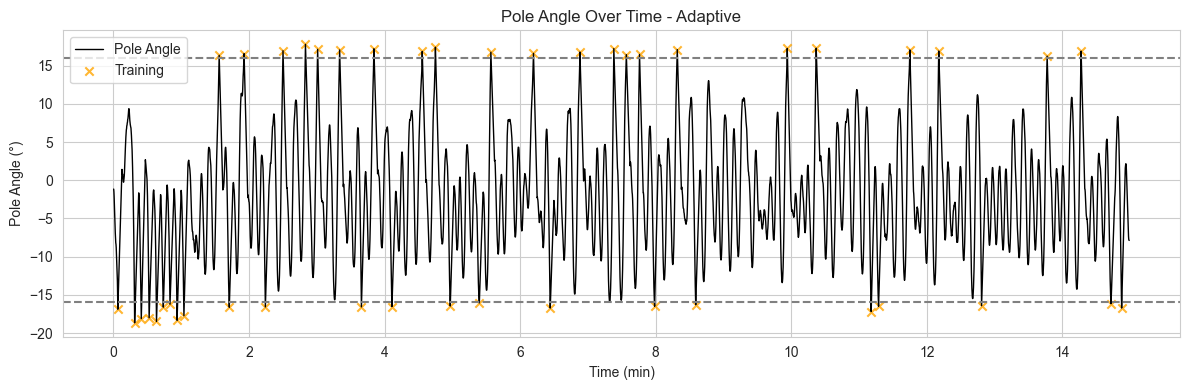

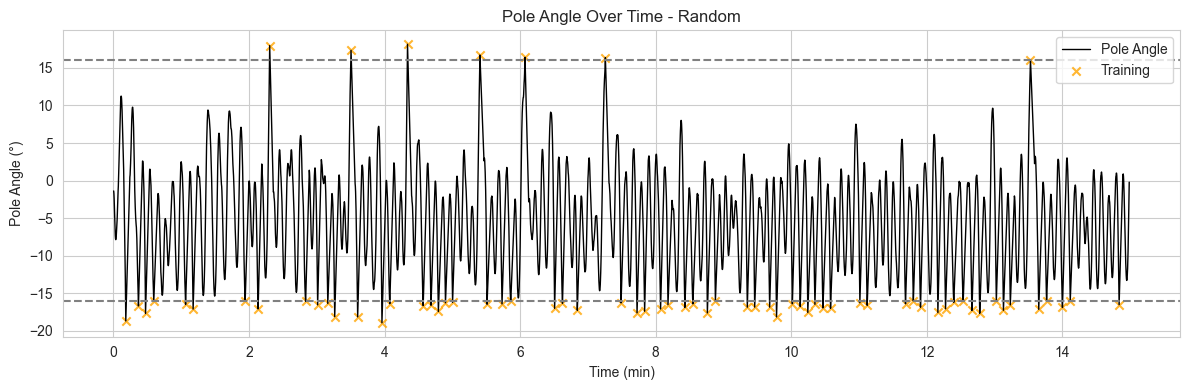

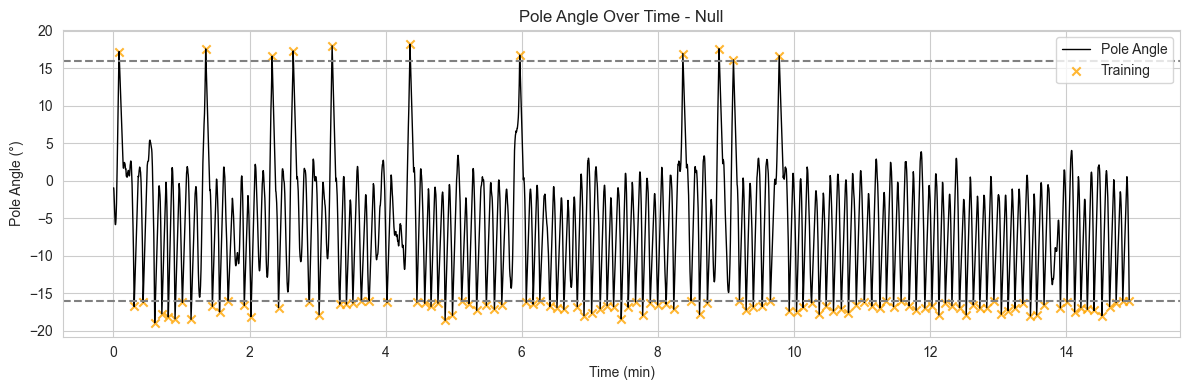

In [18]:
# Plot pole angle over time with shaded episodes and stim timings
ole.show_pole_angle_trajectories("Adaptive")
ole.show_pole_angle_trajectories("Random")
ole.show_pole_angle_trajectories("Null")

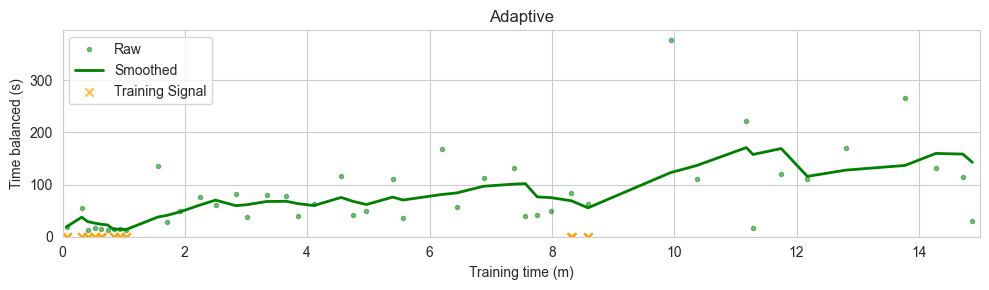

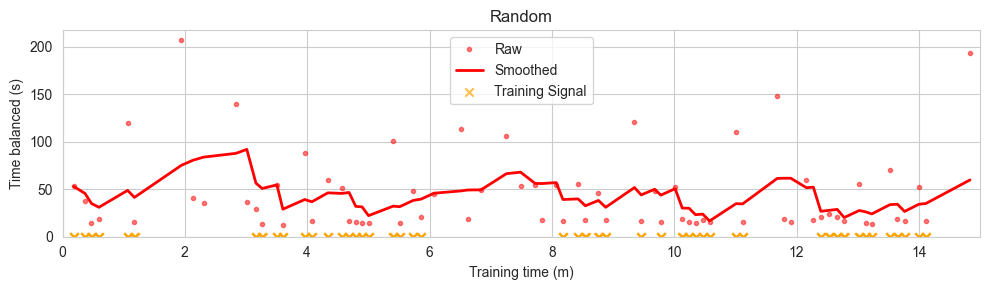

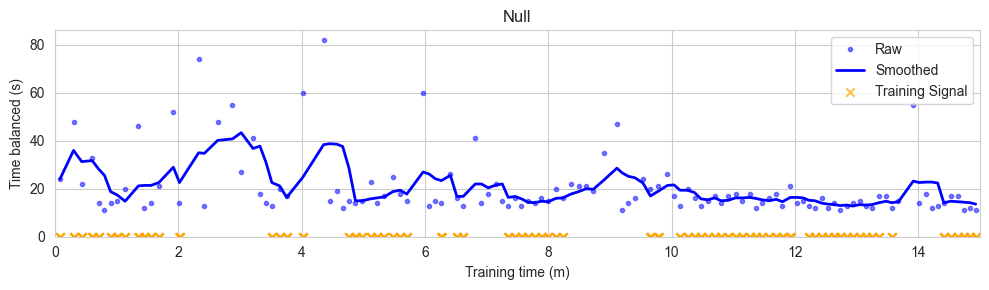

In [19]:
# Show episode vs training overlay for different conditions
ole.show_time_balanced_vs_training("Adaptive", color="green")
ole.show_time_balanced_vs_training("Random", color="red")
ole.show_time_balanced_vs_training("Null", color="blue")

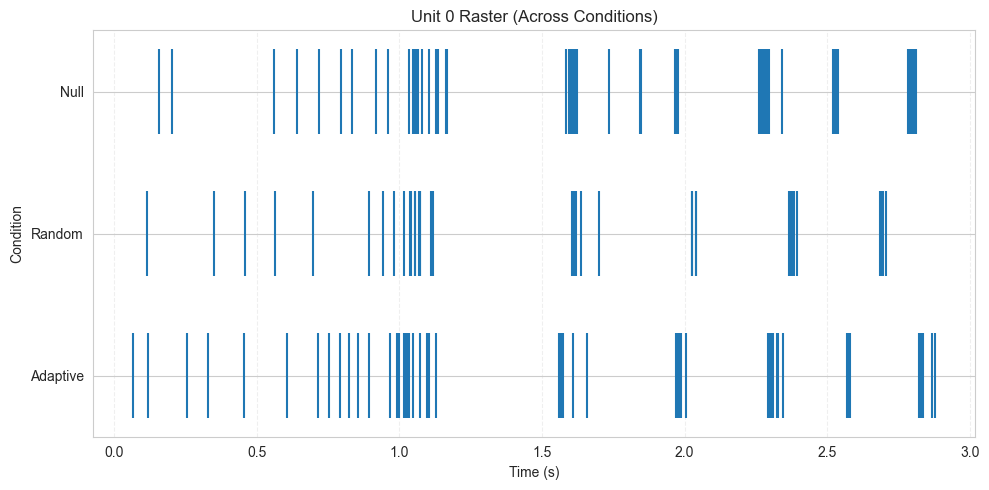

In [20]:
# shows comparative spiking activity of a specific neuron across conditions within the specified time range
ole.show_neuron_raster_comparison(unit_id=0, start_s=0, end_s=3)

In [21]:
# Compute latency histograms for all units in all conditions
ole.compute_latency_histograms(window_ms=30, bin_size=5, unit_ids=None)

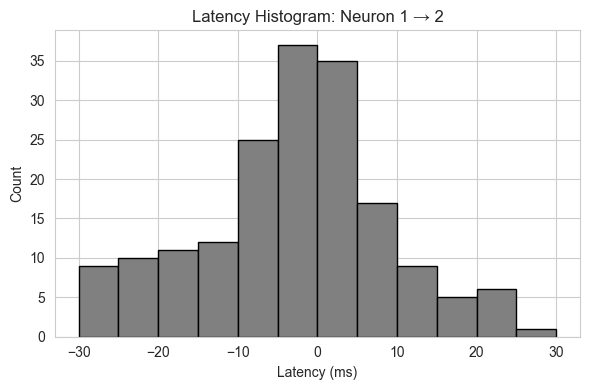

In [22]:
# Show histogram of latencies from unit j to i in a specific condition
ole.show_latency_histogram(condition="Adaptive", i=1, j=2)

In [7]:
# Compute for Adaptive
ole.compute_causal_matrices(
    condition="Adaptive",
    start_ms=0,
    end_ms=900000,  # 15 minutes
    max_latency_ms=30,
    bin_size=5,
    unit_ids=None
)

# Compute for Null
ole.compute_causal_matrices(
    condition="Null",
    start_ms=0,
    end_ms=900000,  # 15 minutes
    max_latency_ms=30,
    bin_size=5,
    unit_ids=None
)

# Compute for Random
ole.compute_causal_matrices(
    condition="Random",
    start_ms=0,
    end_ms=900000,  # 15 minutes
    max_latency_ms=30,
    bin_size=5,
    unit_ids=None
)


First-Order Weighted Latencies (±15 ms) — Causal Heatmap: Adaptive (±200 ms)
  [0, 1] = 4.93 ms
  [0, 2] = 6.19 ms
  [0, 3] = 3.12 ms
  [0, 4] = 4.34 ms
  [0, 5] = 1.46 ms
  [0, 6] = 3.08 ms
  [0, 7] = 1.18 ms
  [0, 8] = 3.21 ms
  [0, 9] = 3.48 ms
  [0, 10] = 3.78 ms
  [0, 11] = 3.23 ms
  [0, 12] = 3.42 ms
  [0, 13] = 3.63 ms
  [0, 14] = 3.38 ms
  [0, 15] = 5.44 ms
  [0, 16] = 2.64 ms
  [0, 17] = 0.02 ms
  [0, 18] = 2.32 ms
  [0, 19] = 0.81 ms
  [0, 20] = 9.04 ms
  [0, 21] = -0.26 ms
  [0, 22] = 2.99 ms
  [0, 23] = 3.75 ms
  [0, 24] = 1.45 ms
  [0, 25] = 1.34 ms
  [0, 26] = 2.99 ms
  [0, 27] = 3.31 ms
  [0, 28] = 0.80 ms
  [0, 29] = 1.53 ms
  [0, 30] = 2.33 ms
  [0, 31] = 1.91 ms
  [0, 32] = 4.45 ms
  [0, 33] = 2.51 ms
  [0, 34] = 2.07 ms
  [0, 35] = 1.99 ms
  [0, 36] = 2.74 ms
  [0, 37] = 4.37 ms
  [0, 38] = 3.87 ms
  [0, 39] = 3.90 ms
  [0, 40] = 2.78 ms
  [0, 41] = 2.76 ms
  [0, 42] = 1.95 ms
  [0, 43] = 2.07 ms
  [0, 44] = 5.80 ms
  [0, 45] = 2.38 ms
  [0, 46] = 1.69 ms
  [0, 47] 

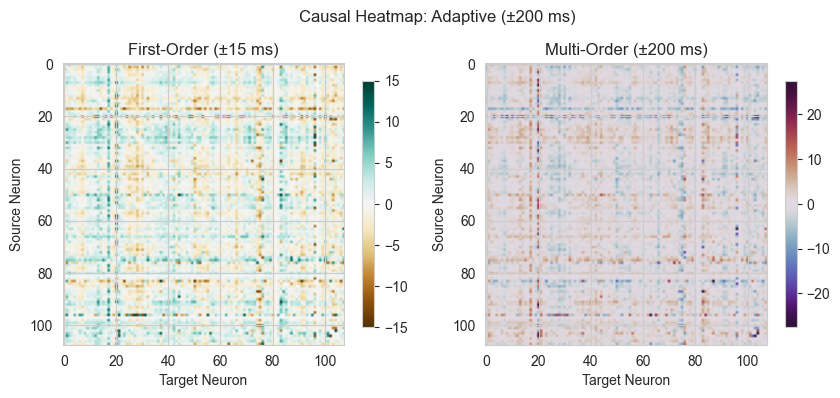

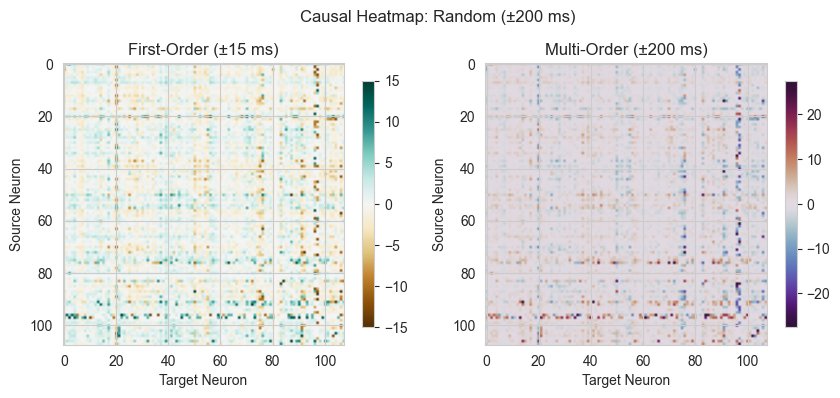

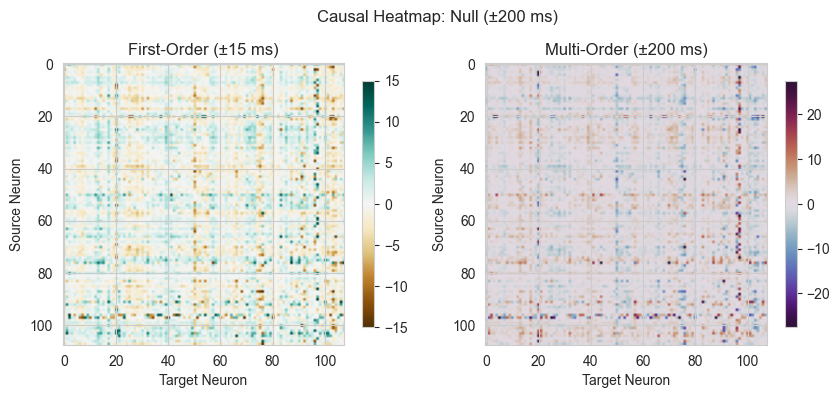

In [8]:
# Show heatmaps for first- and multi-order causal matrices
first, multi = ole.causal_latency_matrices[("Adaptive", 0, 900000)], ole.multi_order_matrices[("Adaptive", 0, 900000)]
ole.show_causal_plot_from_matrices(first, multi, title="Causal Heatmap: Adaptive", unit_ids=None)

first, multi = ole.causal_latency_matrices[("Random", 0, 900000)], ole.multi_order_matrices[("Random", 0, 900000)]
ole.show_causal_plot_from_matrices(first, multi, title="Causal Heatmap: Random", unit_ids=None)

first, multi = ole.causal_latency_matrices[("Null", 0, 900000)], ole.multi_order_matrices[("Null", 0, 900000)]
ole.show_causal_plot_from_matrices(first, multi, title="Causal Heatmap: Null", unit_ids=None)

In [9]:
# Compute and cache firing order using the first-order matrix
firing_order, net_score = ole.compute_firing_order_from_causal_matrix(first, condition="Random", label="first_order")
firing_order, net_score = ole.compute_firing_order_from_causal_matrix(first, condition="Null", label="first_order")
firing_order, net_score = ole.compute_firing_order_from_causal_matrix(first, condition="Adaptive", label="first_order")

In [26]:
# === Get STTC matrix over the same window ===
sd = ole.spike_data["Random"].subtime(0, 900000)
subset_sd = sd.subset(firing_order)
sttc_matrix = subset_sd.spike_time_tilings()

In [27]:
print("STTC shape:", sttc_matrix.shape)
print("Firing order length:", len(firing_order))

STTC shape: (108, 108)
Firing order length: 108


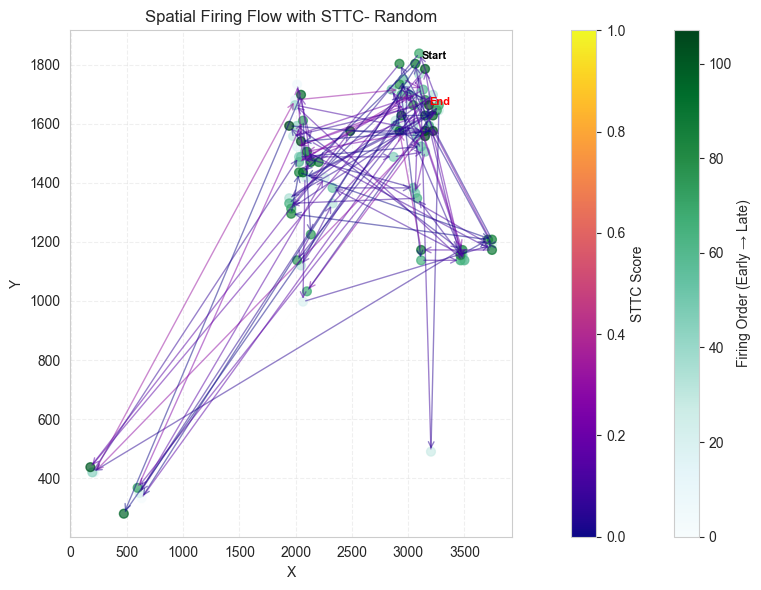

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0             50           75    3115.0    1820.0     630.0     332.5   
1             75          103     630.0     332.5    3080.0    1627.5   
2            103            0    3080.0    1627.5    2065.0    1470.0   
3              0           80    2065.0    1470.0    2012.5    1732.5   
4             80          104    2012.5    1732.5    2135.0    1540.0   
..           ...          ...       ...       ...       ...       ...   
102           21           93    3150.0    1575.0    3220.0    1575.0   
103           93           57    3220.0    1575.0    2047.5    1540.0   
104           57           39    2047.5    1540.0    1942.5    1592.5   
105           39           17    1942.5    1592.5    3150.0    1557.5   
106           17           13    3150.0    1557.5    3185.0    1662.5   

     sttc_score  
0       -0.0796  
1        0.1601  
2        0.1965  
3        0.2447  
4        0.1142  
..          ...  
102     -0.0388  
103     -0.0277  
104      0.0262  
105     -0.0016  
106     -0.0113  

[107 rows x 7 columns]

In [28]:
# === Plot spatial arrows with STTC coloring ===
summary_df = ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order,
    sttc_matrix=sttc_matrix,
    title="Spatial Firing Flow with STTC- Random",
)

In [29]:
sd = ole.spike_data["Null"].subtime(0, 900000)
subset_sd = sd.subset(firing_order)
sttc_matrix = subset_sd.spike_time_tilings()

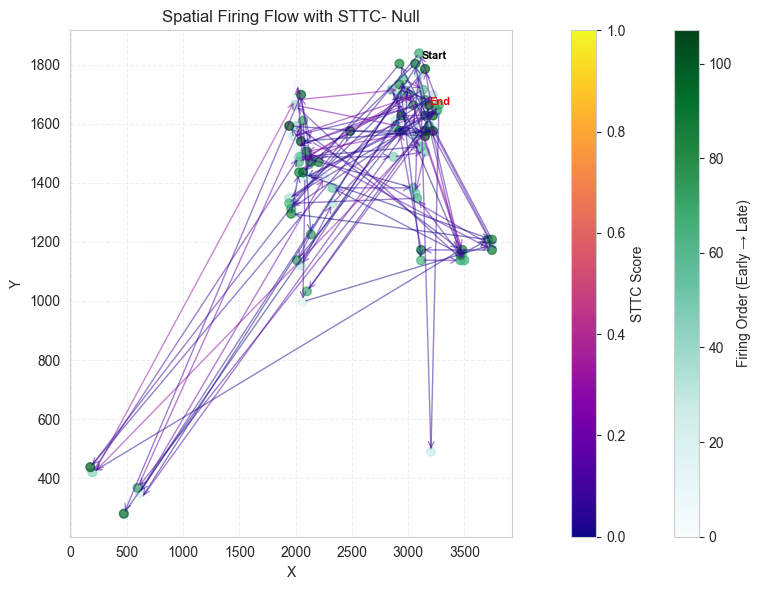

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0             50           75    3115.0    1820.0     630.0     332.5   
1             75          103     630.0     332.5    3080.0    1627.5   
2            103            0    3080.0    1627.5    2065.0    1470.0   
3              0           80    2065.0    1470.0    2012.5    1732.5   
4             80          104    2012.5    1732.5    2135.0    1540.0   
..           ...          ...       ...       ...       ...       ...   
102           21           93    3150.0    1575.0    3220.0    1575.0   
103           93           57    3220.0    1575.0    2047.5    1540.0   
104           57           39    2047.5    1540.0    1942.5    1592.5   
105           39           17    1942.5    1592.5    3150.0    1557.5   
106           17           13    3150.0    1557.5    3185.0    1662.5   

     sttc_score  
0       -0.0118  
1        0.1522  
2        0.2488  
3        0.1927  
4        0.1270  
..          ...  
102     -0.0409  
103     -0.0356  
104      0.0058  
105      0.0099  
106      0.0118  

[107 rows x 7 columns]

In [30]:
summary_df = ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order,
    sttc_matrix=sttc_matrix,
    title="Spatial Firing Flow with STTC- Null",
)

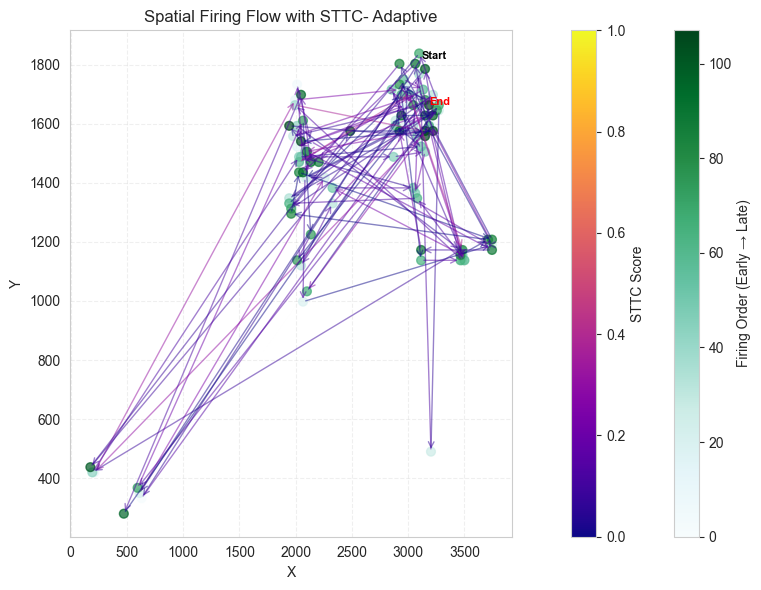

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0             50           75    3115.0    1820.0     630.0     332.5   
1             75          103     630.0     332.5    3080.0    1627.5   
2            103            0    3080.0    1627.5    2065.0    1470.0   
3              0           80    2065.0    1470.0    2012.5    1732.5   
4             80          104    2012.5    1732.5    2135.0    1540.0   
..           ...          ...       ...       ...       ...       ...   
102           21           93    3150.0    1575.0    3220.0    1575.0   
103           93           57    3220.0    1575.0    2047.5    1540.0   
104           57           39    2047.5    1540.0    1942.5    1592.5   
105           39           17    1942.5    1592.5    3150.0    1557.5   
106           17           13    3150.0    1557.5    3185.0    1662.5   

     sttc_score  
0        0.0492  
1        0.1414  
2        0.2472  
3        0.1713  
4        0.1034  
..          ...  
102     -0.0407  
103     -0.0319  
104      0.0237  
105      0.0404  
106      0.0273  

[107 rows x 7 columns]

In [31]:
firing_order, net_score = ole.compute_firing_order_from_causal_matrix(first, condition="Adaptive", label="first_order")
sd = ole.spike_data["Adaptive"].subtime(0, 900000)
subset_sd = sd.subset(firing_order)
sttc_matrix = subset_sd.spike_time_tilings()
summary_df = ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order,
    sttc_matrix=sttc_matrix,
    title="Spatial Firing Flow with STTC- Adaptive",
)


=== Comparing Adaptive vs Null ===
Summary stats saved to: /Users/main_mac/latency_analysis_cache/Null_vs_Adaptive_first_diff_stats.pkl
Diff matrix saved to: /Users/main_mac/latency_analysis_cache/Null_vs_Adaptive_first_diff_matrix.pkl


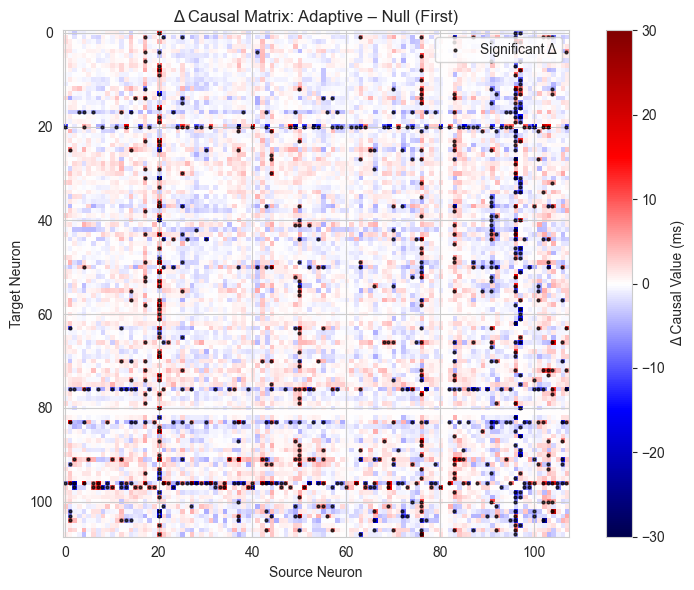


Summary Statistics:
condition_A condition_B  start_A  end_A  start_B  end_B order  threshold  mean_diff  sum_abs_diff  max_change  num_significant_pairs
       Null    Adaptive        0 900000        0 900000 first          5   0.003653  19502.156206        27.0                    763
→ Saved stats to: /Users/main_mac/latency_analysis_cache/Null_vs_Adaptive_first_diff_stats.pkl
→ Saved matrix to: /Users/main_mac/latency_analysis_cache/Null_vs_Adaptive_first_diff_matrix.pkl

Summary stats:
condition_A condition_B  start_A  end_A  start_B  end_B order  threshold  mean_diff  sum_abs_diff  max_change  num_significant_pairs
       Null    Adaptive        0 900000        0 900000 first          5   0.003653  19502.156206        27.0                    763
Significant mask shape: (108, 108)

=== Comparing Adaptive vs Random ===
Summary stats saved to: /Users/main_mac/latency_analysis_cache/Random_vs_Adaptive_first_diff_stats.pkl
Diff matrix saved to: /Users/main_mac/latency_analysis_cache/Ra

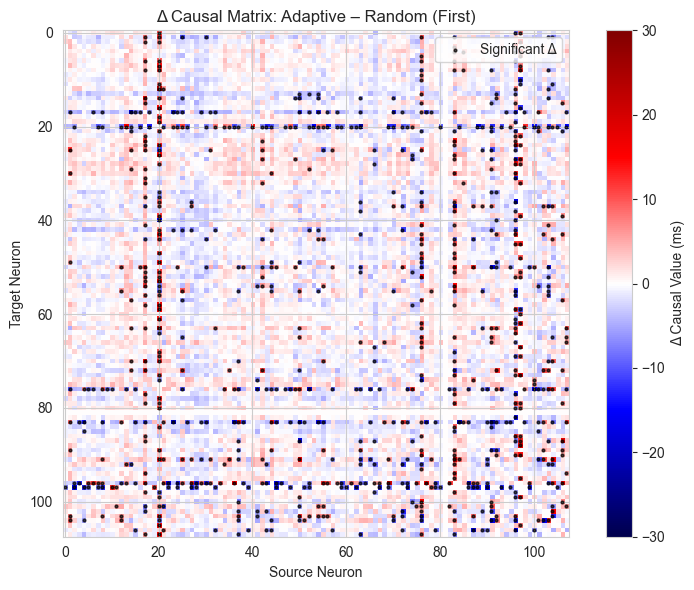


Summary Statistics:
condition_A condition_B  start_A  end_A  start_B  end_B order  threshold  mean_diff  sum_abs_diff  max_change  num_significant_pairs
     Random    Adaptive        0 900000        0 900000 first          5   0.035865  21549.076636   24.166667                    812
→ Saved stats to: /Users/main_mac/latency_analysis_cache/Random_vs_Adaptive_first_diff_stats.pkl
→ Saved matrix to: /Users/main_mac/latency_analysis_cache/Random_vs_Adaptive_first_diff_matrix.pkl

Summary stats:
condition_A condition_B  start_A  end_A  start_B  end_B order  threshold  mean_diff  sum_abs_diff  max_change  num_significant_pairs
     Random    Adaptive        0 900000        0 900000 first          5   0.035865  21549.076636   24.166667                    812
Significant mask shape: (108, 108)


In [74]:
# === Compare causal matrices between two conditions ===

import os
import pickle

# Parameters
conditions_to_compare = [("Null", "Adaptive"), ("Random", "Adaptive")]
start_ms = 0
end_ms = 900000
max_latency_ms = 30
bin_size = 5
threshold = 5
colorbar_range = 30
order = "first"

# Compute causal matrices for all involved conditions
for cond in {"Null", "Random", "Adaptive"}:
    ole.compute_causal_matrices(
        condition=cond,
        start_ms=start_ms,
        end_ms=end_ms,
        max_latency_ms=max_latency_ms,
        bin_size=bin_size,
        unit_ids=None
    )

# Run comparisons and save outputs
for cond_a, cond_b in conditions_to_compare:
    print(f"\n=== Comparing {cond_b} vs {cond_a} ===")

    diff_matrix, stats_df, sig_mask = ole.compare_causal_matrices(
        cond_a=cond_a,
        cond_b=cond_b,
        time_a=(start_ms, end_ms),
        time_b=(start_ms, end_ms),
        order=order,
        threshold=threshold,
        colorbar_range=colorbar_range,
        overlay_significance=True,
        perform_stats=True,
        show_plot=True,
        export_path=None  # CSV not needed; we're saving .pkl
    )

    # Save to ~/latency_analysis_cache
    cache_dir = os.path.expanduser("~/latency_analysis_cache")
    os.makedirs(cache_dir, exist_ok=True)

    base_name = f"{cond_a}_vs_{cond_b}_{order}"
    stats_path = os.path.join(cache_dir, f"{base_name}_diff_stats.pkl")
    diff_path = os.path.join(cache_dir, f"{base_name}_diff_matrix.pkl")

    stats_df.to_pickle(stats_path)
    with open(diff_path, "wb") as f:
        pickle.dump(diff_matrix, f)

    print(f"→ Saved stats to: {stats_path}")
    print(f"→ Saved matrix to: {diff_path}")
    print("\nSummary stats:")
    print(stats_df.to_string(index=False))

    if sig_mask is not None:
        print("Significant mask shape:", sig_mask.shape)


In [33]:
import pandas as pd

# === Segment and compute causal matrices by time bin ===
segmented_latency = {}

for cond in ["Adaptive", "Null", "Random"]:
    segments = ole.segment_and_compute_causal(
        condition=cond,
        bin_size_s=90,          # 1.5-minute segments
        max_latency_ms=30,
        bin_size=5,
        order="first",          # or "multi"
        unit_ids=None           # use all units, or specify a list
    )
    segmented_latency[cond] = segments
    print(f"Computed {len(segments)} segments for '{cond}'")

# === Save segmented results to .pkl as a DataFrame ===
df_segmented_latency = pd.DataFrame([
    {"condition": cond, "start": start, "end": end, "matrix": mat}
    for cond, segs in segmented_latency.items()
    for (start, end, mat) in segs
])

# Ensure the cache folder exists
import os
os.makedirs("latency_analysis_cache", exist_ok=True)

# Save
df_segmented_latency.to_pickle("latency_analysis_cache/segmented_latency.pkl")
print("Saved segmented latency matrices to latency_analysis_cache/segmented_latency.pkl")


Computed 10 segments for 'Adaptive'
Computed 10 segments for 'Null'
Computed 10 segments for 'Random'
Saved segmented latency matrices to latency_analysis_cache/segmented_latency.pkl


In [34]:
# === Segment and compute causal matrices by time bin ===
segments = ole.segment_and_compute_causal(
    condition="Adaptive",
    bin_size_s=90,          # 1.5-minute segments
    max_latency_ms=30,
    bin_size=5,
    order="first",          # or "multi"
    unit_ids=None           # use all units, or specify a list
)
print(f"Computed {len(segments)} segments for 'Adaptive'")

segments = ole.segment_and_compute_causal(
    condition="Null",
    bin_size_s=90,          # 1.5-minute segments
    max_latency_ms=30,
    bin_size=5,
    order="first",          # or "multi"
    unit_ids=None           # use all units, or specify a list
)
print(f"Computed {len(segments)} segments for 'Null'")

segments = ole.segment_and_compute_causal(
    condition="Random",
    bin_size_s=90,          # 1.5-minute segments
    max_latency_ms=30,
    bin_size=5,
    order="first",          # or "multi"
    unit_ids=None           # use all units, or specify a list
)
print(f"Computed {len(segments)} segments for 'Random'")

# === Save segmented results to .pkl ===
df_segmented_latency = pd.DataFrame([
    {"condition": cond, "start": start, "end": end, "matrix": mat}
    for cond, segs in segmented_latency.items()
    for (start, end, mat) in segs
])

df_segmented_latency.to_pickle("latency_analysis_cache/segmented_latency.pkl")


Computed 10 segments for 'Adaptive'
Computed 10 segments for 'Null'
Computed 10 segments for 'Random'


In [10]:
# === Analyze causal latency and STTC changes over time ===

results = ole.analyze_all_connection_changes(
    bin_size_s=90,                   # Segment length in seconds (to fine tune, try 60 or 180)
    order="first",                   # or "multi" for higher-order latencies
    unit_ids=None,                   # Analyze all units
    min_corr_diff=0.3,               # Δ correlation threshold vs. controls
    baseline_sttc_thresh=0.2,        # Minimum early STTC mean to consider a pair
    zscore_thresh=2.0,               # How extreme must z-scored STTC change be?
    smooth=True,                     # Smooth trajectories before analysis
    smooth_window=3,                 # Size of smoothing filter (in bins)
    conditions=("Adaptive", "Null", "Random")  # Compare Adaptive vs control datasets
)

Segmenting and computing matrices...
Extracting time series...
Analyzing pairs...


/Users/main_mac/data/org_eval/OrgLearningEval.py:995: RuntimeWarning: Mean of empty slice
  mean_ctrl_corr_latency = np.nanmean([v["latency_corr"] for v in control_corrs.values()])


In [36]:
# Create DataFrame + Filter Significant Pairs

import pandas as pd
from IPython.display import display

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Filter only strong/significant pairs
significant_df = df_results[df_results["significant_strengthening"] == True]

# View summary of top results
display(significant_df.sort_values("slope_sttc", ascending=False).head(10))

ole.latency_change_cache["df_results"] = df_results
ole.latency_change_cache["significant_df"] = significant_df

pair  slope_latency  slope_sttc  zscore_peak_latency  \
1151  (32, 90)       0.112404    0.020077             2.087332   
2367  (66, 60)       0.418610    0.014970             2.184533   
53     (2, 70)       1.311362    0.014673             1.543235   
3134  (90, 60)       0.346829    0.013800             1.676791   
2141  (60, 32)       0.157602    0.011276             2.116197   
2394  (67, 90)       1.070522    0.010869             2.084257   
572   (14, 32)       0.502239    0.010361             1.681334   
2605  (73, 32)       0.041319    0.010092             2.076257   
1145  (32, 73)       0.198052    0.010092             2.456738   
1700  (48, 32)       0.184445    0.009919             2.013745   

      zscore_peak_sttc  corr_delta_latency  corr_delta_sttc  wilcoxon_min_p  \
1151          2.624517            0.411546         0.350777        0.019531   
2367          2.399218            1.085664         1.334477        0.019531   
53            2.112537            0.650376         0.741005        0.037109   
3134          2.356182            1.424978         0.876282        0.013672   
2141          2.444120            1.377853         0.860511        0.037109   
2394          2.486593            0.457979         0.328965        0.007812   
572           2.285147            0.995617         0.407533        0.003906   
2605          2.642144            0.859407         0.814604        0.037109   
1145          2.642144            0.684961         0.814604        0.019531   
1700          2.490023            0.418832         0.618370        0.009766   

      significant_strengthening  \
1151                       True   
2367                       True   
53                         True   
3134                       True   
2141                       True   
2394                       True   
572                        True   
2605                       True   
1145                       True   
1700                       True   

                                          control_corrs  
1151  {'Null': {'latency_corr': 0.6163579759891802, ...  
2367  {'Null': {'latency_corr': 0.5008993752879993, ...  
53    {'Null': {'latency_corr': 0.3781612467376313, ...  
3134  {'Null': {'latency_corr': -0.12990858074383643...  
2141  {'Null': {'latency_corr': -0.4558798896753272,...  
2394  {'Null': {'latency_corr': 0.5420205157854174, ...  
572   {'Null': {'latency_corr': -0.7208488606092656,...  
2605  {'Null': {'latency_corr': 0.21418446412373643,...  
1145  {'Null': {'latency_corr': -0.01027023051668990...  
1700  {'Null': {'latency_corr': 0.7417042115519723, ...

In [37]:
# Save results
import os
# Create a subfolder for caching the data
cache_dir = "latency_analysis_cache"
os.makedirs(cache_dir, exist_ok=True)

# Define file paths
results_path = os.path.join(cache_dir, "df_results.pkl")
significant_path = os.path.join(cache_dir, "significant_df.pkl")

# Save to disk
df_results.to_pickle(results_path)
significant_df.to_pickle(significant_path)

print(f"Cached to disk:\n- All results: {results_path}\n- Significant only: {significant_path}")

Cached to disk:
- All results: latency_analysis_cache/df_results.pkl
- Significant only: latency_analysis_cache/significant_df.pkl


STTC matrix not found for key ('Adaptive', 0, 899970). Computing using spike_time_tilings...


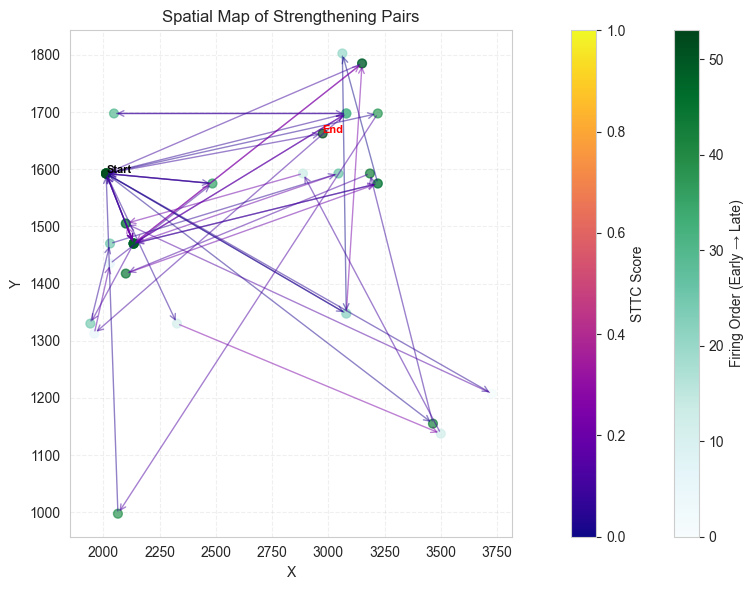

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            32           66    2012.5    1592.5    3727.5    1207.5   
1            66            2    3727.5    1207.5    2100.0    1505.0   
2             2           90    2100.0    1505.0    2135.0    1470.0   
3            90           60    2135.0    1470.0    3080.0    1697.5   
4            60           67    3080.0    1697.5    1960.0    1312.5   
5            67           14    1960.0    1312.5    2030.0    1435.0   
6            14           73    2030.0    1435.0    2485.0    1575.0   
7            73           32    2485.0    1575.0    2012.5    1592.5   
8            32           48    2012.5    1592.5    3080.0    1347.5   
9            48           32    3080.0    1347.5    2012.5    1592.5   
10           32           61    2012.5    1592.5    2327.5    1330.0   
11           61           23    2327.5    1330.0    3500.0    1137.5   
12           23           98    3500.0    1137.5    2887.5    1592.5   
13           98            2    2887.5    1592.5    2100.0    1505.0   
14            2           90    2100.0    1505.0    2135.0    1470.0   
15           90           90    2135.0    1470.0    2135.0    1470.0   
16           90           32    2135.0    1470.0    2012.5    1592.5   
17           32           90    2012.5    1592.5    2135.0    1470.0   
18           90           93    2135.0    1470.0    3220.0    1575.0   
19           93           72    3220.0    1575.0    3062.5    1802.5   
20           72           48    3062.5    1802.5    3080.0    1347.5   
21           48           40    3080.0    1347.5    3150.0    1785.0   
22           40           90    3150.0    1785.0    2135.0    1470.0   
23           90           77    2135.0    1470.0    1942.5    1330.0   
24           77           22    1942.5    1330.0    2030.0    1470.0   
25           22           53    2030.0    1470.0    3045.0    1592.5   
26           53           90    3045.0    1592.5    2135.0    1470.0   
27           90           60    2135.0    1470.0    3080.0    1697.5   
28           60           70    3080.0    1697.5    2047.5    1697.5   
29           70           60    2047.5    1697.5    3080.0    1697.5   
30           60           32    3080.0    1697.5    2012.5    1592.5   
31           32           90    2012.5    1592.5    2135.0    1470.0   
32           90           32    2135.0    1470.0    2012.5    1592.5   
33           32           32    2012.5    1592.5    2012.5    1592.5   
34           32           73    2012.5    1592.5    2485.0    1575.0   
35           73           32    2485.0    1575.0    2012.5    1592.5   
36           32           27    2012.5    1592.5    3220.0    1697.5   
37           27           24    3220.0    1697.5    2065.0     997.5   
38           24           32    2065.0     997.5    2012.5    1592.5   
39           32           32    2012.5    1592.5    2012.5    1592.5   
40           32           32    2012.5    1592.5    2012.5    1592.5   
41           32          100    2012.5    1592.5    3465.0    1155.0   
42          100           15    3465.0    1155.0    3185.0    1592.5   
43           15           26    3185.0    1592.5    2100.0    1417.5   
44           26           93    2100.0    1417.5    3220.0    1575.0   
45           93           90    3220.0    1575.0    2135.0    1470.0   
46           90            2    2135.0    1470.0    2100.0    1505.0   
47            2           90    2100.0    1505.0    2135.0    1470.0   
48           90           90    2135.0    1470.0    2135.0    1470.0   
49           90           40    2135.0    1470.0    3150.0    1785.0   
50           40           32    3150.0    1785.0    2012.5    1592.5   
51           32           32    2012.5    1592.5    2012.5    1592.5   
52           32           74    2012.5    1592.5    2975.0    1662.5   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.2472  
3       0.1713  
4       0.1034  
5       0.160

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            32           66    2012.5    1592.5    3727.5    1207.5   
1            66            2    3727.5    1207.5    2100.0    1505.0   
2             2           90    2100.0    1505.0    2135.0    1470.0   
3            90           60    2135.0    1470.0    3080.0    1697.5   
4            60           67    3080.0    1697.5    1960.0    1312.5   
5            67           14    1960.0    1312.5    2030.0    1435.0   
6            14           73    2030.0    1435.0    2485.0    1575.0   
7            73           32    2485.0    1575.0    2012.5    1592.5   
8            32           48    2012.5    1592.5    3080.0    1347.5   
9            48           32    3080.0    1347.5    2012.5    1592.5   
10           32           61    2012.5    1592.5    2327.5    1330.0   
11           61           23    2327.5    1330.0    3500.0    1137.5   
12           23           98    3500.0    1137.5    2887.5    1592.5   
13           98            2    2887.5    1592.5    2100.0    1505.0   
14            2           90    2100.0    1505.0    2135.0    1470.0   
15           90           90    2135.0    1470.0    2135.0    1470.0   
16           90           32    2135.0    1470.0    2012.5    1592.5   
17           32           90    2012.5    1592.5    2135.0    1470.0   
18           90           93    2135.0    1470.0    3220.0    1575.0   
19           93           72    3220.0    1575.0    3062.5    1802.5   
20           72           48    3062.5    1802.5    3080.0    1347.5   
21           48           40    3080.0    1347.5    3150.0    1785.0   
22           40           90    3150.0    1785.0    2135.0    1470.0   
23           90           77    2135.0    1470.0    1942.5    1330.0   
24           77           22    1942.5    1330.0    2030.0    1470.0   
25           22           53    2030.0    1470.0    3045.0    1592.5   
26           53           90    3045.0    1592.5    2135.0    1470.0   
27           90           60    2135.0    1470.0    3080.0    1697.5   
28           60           70    3080.0    1697.5    2047.5    1697.5   
29           70           60    2047.5    1697.5    3080.0    1697.5   
30           60           32    3080.0    1697.5    2012.5    1592.5   
31           32           90    2012.5    1592.5    2135.0    1470.0   
32           90           32    2135.0    1470.0    2012.5    1592.5   
33           32           32    2012.5    1592.5    2012.5    1592.5   
34           32           73    2012.5    1592.5    2485.0    1575.0   
35           73           32    2485.0    1575.0    2012.5    1592.5   
36           32           27    2012.5    1592.5    3220.0    1697.5   
37           27           24    3220.0    1697.5    2065.0     997.5   
38           24           32    2065.0     997.5    2012.5    1592.5   
39           32           32    2012.5    1592.5    2012.5    1592.5   
40           32           32    2012.5    1592.5    2012.5    1592.5   
41           32          100    2012.5    1592.5    3465.0    1155.0   
42          100           15    3465.0    1155.0    3185.0    1592.5   
43           15           26    3185.0    1592.5    2100.0    1417.5   
44           26           93    2100.0    1417.5    3220.0    1575.0   
45           93           90    3220.0    1575.0    2135.0    1470.0   
46           90            2    2135.0    1470.0    2100.0    1505.0   
47            2           90    2100.0    1505.0    2135.0    1470.0   
48           90           90    2135.0    1470.0    2135.0    1470.0   
49           90           40    2135.0    1470.0    3150.0    1785.0   
50           40           32    3150.0    1785.0    2012.5    1592.5   
51           32           32    2012.5    1592.5    2012.5    1592.5   
52           32           74    2012.5    1592.5    2975.0    1662.5   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.2472  
3       0.1713  
4       0.1034  
5       0.160

In [38]:
# Arrow Map of Strengthening Connections--visualize the top significant pairs on a spatial grid to illustrate which regions formed the strongest task-related paths

df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Select top N significant pairs
top_n = 50
top_pairs = significant_df.sort_values("slope_sttc", ascending=False).head(top_n)["pair"].tolist()
firing_order = [p[0] for p in top_pairs] + [p[1] for p in top_pairs]

# Get or compute full-session STTC matrix
adaptive_key = ("Adaptive", 0, int(ole.spike_data["Adaptive"].length))

# Check if cached
sttc_matrix_adaptive = ole.sttc_matrices.get(adaptive_key)

if sttc_matrix_adaptive is None:
    print(f"STTC matrix not found for key {adaptive_key}. Computing using spike_time_tilings...")
    sttc_matrix_adaptive = ole.spike_data["Adaptive"].spike_time_tilings(delt=20.0)
    ole.sttc_matrices[adaptive_key] = sttc_matrix_adaptive  # Cache it

ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order,
    sttc_matrix=sttc_matrix_adaptive,
    title="Spatial Map of Strengthening Pairs",
)

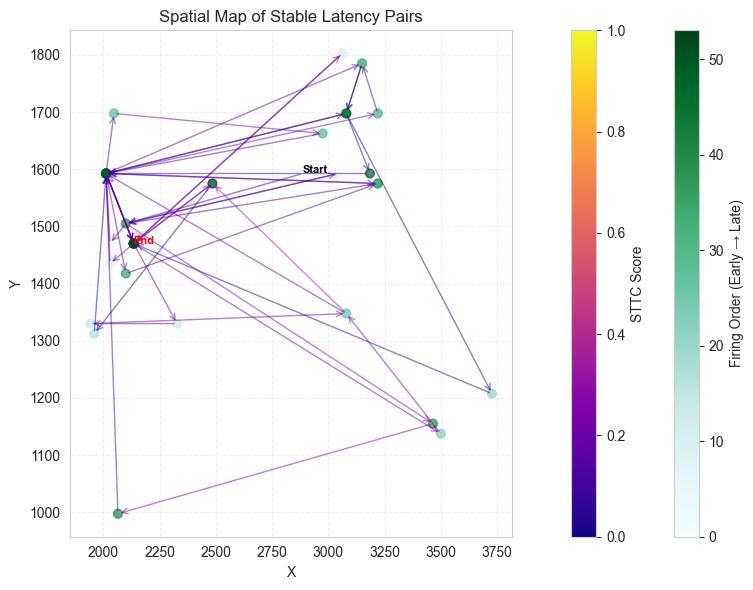

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            98            2    2887.5    1592.5    2100.0    1505.0   
1             2           53    2100.0    1505.0    3045.0    1592.5   
2            53            2    3045.0    1592.5    2100.0    1505.0   
3             2           22    2100.0    1505.0    2030.0    1470.0   
4            22           32    2030.0    1470.0    2012.5    1592.5   
5            32           90    2012.5    1592.5    2135.0    1470.0   
6            90           90    2135.0    1470.0    2135.0    1470.0   
7            90           14    2135.0    1470.0    2030.0    1435.0   
8            14           32    2030.0    1435.0    2012.5    1592.5   
9            32           90    2012.5    1592.5    2135.0    1470.0   
10           90           72    2135.0    1470.0    3062.5    1802.5   
11           72           90    3062.5    1802.5    2135.0    1470.0   
12           90           61    2135.0    1470.0    2327.5    1330.0   
13           61           77    2327.5    1330.0    1942.5    1330.0   
14           77           48    1942.5    1330.0    3080.0    1347.5   
15           48           73    3080.0    1347.5    2485.0    1575.0   
16           73           67    2485.0    1575.0    1960.0    1312.5   
17           67           32    1960.0    1312.5    2012.5    1592.5   
18           32           40    2012.5    1592.5    3150.0    1785.0   
19           40           60    3150.0    1785.0    3080.0    1697.5   
20           60           66    3080.0    1697.5    3727.5    1207.5   
21           66           90    3727.5    1207.5    2135.0    1470.0   
22           90           23    2135.0    1470.0    3500.0    1137.5   
23           23           48    3500.0    1137.5    3080.0    1347.5   
24           48           32    3080.0    1347.5    2012.5    1592.5   
25           32           93    2012.5    1592.5    3220.0    1575.0   
26           93           32    3220.0    1575.0    2012.5    1592.5   
27           32           70    2012.5    1592.5    2047.5    1697.5   
28           70           74    2047.5    1697.5    2975.0    1662.5   
29           74           32    2975.0    1662.5    2012.5    1592.5   
30           32           32    2012.5    1592.5    2012.5    1592.5   
31           32           27    2012.5    1592.5    3220.0    1697.5   
32           27           40    3220.0    1697.5    3150.0    1785.0   
33           40           60    3150.0    1785.0    3080.0    1697.5   
34           60           32    3080.0    1697.5    2012.5    1592.5   
35           32           26    2012.5    1592.5    2100.0    1417.5   
36           26           93    2100.0    1417.5    3220.0    1575.0   
37           93            2    3220.0    1575.0    2100.0    1505.0   
38            2          100    2100.0    1505.0    3465.0    1155.0   
39          100           24    3465.0    1155.0    2065.0     997.5   
40           24           32    2065.0     997.5    2012.5    1592.5   
41           32           32    2012.5    1592.5    2012.5    1592.5   
42           32           32    2012.5    1592.5    2012.5    1592.5   
43           32           90    2012.5    1592.5    2135.0    1470.0   
44           90           90    2135.0    1470.0    2135.0    1470.0   
45           90           90    2135.0    1470.0    2135.0    1470.0   
46           90           32    2135.0    1470.0    2012.5    1592.5   
47           32           60    2012.5    1592.5    3080.0    1697.5   
48           60           15    3080.0    1697.5    3185.0    1592.5   
49           15           32    3185.0    1592.5    2012.5    1592.5   
50           32           90    2012.5    1592.5    2135.0    1470.0   
51           90           73    2135.0    1470.0    2485.0    1575.0   
52           73           90    2485.0    1575.0    2135.0    1470.0   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.1414  
3       0.1140  
4       0.1034  
5       0.160

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            98            2    2887.5    1592.5    2100.0    1505.0   
1             2           53    2100.0    1505.0    3045.0    1592.5   
2            53            2    3045.0    1592.5    2100.0    1505.0   
3             2           22    2100.0    1505.0    2030.0    1470.0   
4            22           32    2030.0    1470.0    2012.5    1592.5   
5            32           90    2012.5    1592.5    2135.0    1470.0   
6            90           90    2135.0    1470.0    2135.0    1470.0   
7            90           14    2135.0    1470.0    2030.0    1435.0   
8            14           32    2030.0    1435.0    2012.5    1592.5   
9            32           90    2012.5    1592.5    2135.0    1470.0   
10           90           72    2135.0    1470.0    3062.5    1802.5   
11           72           90    3062.5    1802.5    2135.0    1470.0   
12           90           61    2135.0    1470.0    2327.5    1330.0   
13           61           77    2327.5    1330.0    1942.5    1330.0   
14           77           48    1942.5    1330.0    3080.0    1347.5   
15           48           73    3080.0    1347.5    2485.0    1575.0   
16           73           67    2485.0    1575.0    1960.0    1312.5   
17           67           32    1960.0    1312.5    2012.5    1592.5   
18           32           40    2012.5    1592.5    3150.0    1785.0   
19           40           60    3150.0    1785.0    3080.0    1697.5   
20           60           66    3080.0    1697.5    3727.5    1207.5   
21           66           90    3727.5    1207.5    2135.0    1470.0   
22           90           23    2135.0    1470.0    3500.0    1137.5   
23           23           48    3500.0    1137.5    3080.0    1347.5   
24           48           32    3080.0    1347.5    2012.5    1592.5   
25           32           93    2012.5    1592.5    3220.0    1575.0   
26           93           32    3220.0    1575.0    2012.5    1592.5   
27           32           70    2012.5    1592.5    2047.5    1697.5   
28           70           74    2047.5    1697.5    2975.0    1662.5   
29           74           32    2975.0    1662.5    2012.5    1592.5   
30           32           32    2012.5    1592.5    2012.5    1592.5   
31           32           27    2012.5    1592.5    3220.0    1697.5   
32           27           40    3220.0    1697.5    3150.0    1785.0   
33           40           60    3150.0    1785.0    3080.0    1697.5   
34           60           32    3080.0    1697.5    2012.5    1592.5   
35           32           26    2012.5    1592.5    2100.0    1417.5   
36           26           93    2100.0    1417.5    3220.0    1575.0   
37           93            2    3220.0    1575.0    2100.0    1505.0   
38            2          100    2100.0    1505.0    3465.0    1155.0   
39          100           24    3465.0    1155.0    2065.0     997.5   
40           24           32    2065.0     997.5    2012.5    1592.5   
41           32           32    2012.5    1592.5    2012.5    1592.5   
42           32           32    2012.5    1592.5    2012.5    1592.5   
43           32           90    2012.5    1592.5    2135.0    1470.0   
44           90           90    2135.0    1470.0    2135.0    1470.0   
45           90           90    2135.0    1470.0    2135.0    1470.0   
46           90           32    2135.0    1470.0    2012.5    1592.5   
47           32           60    2012.5    1592.5    3080.0    1697.5   
48           60           15    3080.0    1697.5    3185.0    1592.5   
49           15           32    3185.0    1592.5    2012.5    1592.5   
50           32           90    2012.5    1592.5    2135.0    1470.0   
51           90           73    2135.0    1470.0    2485.0    1575.0   
52           73           90    2485.0    1575.0    2135.0    1470.0   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.1414  
3       0.1140  
4       0.1034  
5       0.160

In [39]:
# Generate a spatial map of the most stable latency connections, which are the pairs with the lowest z-score variation and correlation compared to the
# controls (Null and Random conditions). Pearson correlation was used to assess similarity between time series (latency_corr and sttc_corr are Pearson r values
# between Adaptive and each control. Wilcoxon p-values were used separately to test whether Adaptive’s latency distributions differed from the controls.
# A low p-value (< 0.05) indicates a significant distributional shift, regardless of correlation. So "low correlation" in this context refers to Pearson,
# and "significant change" refers to Wilcoxon p-values.

df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Select top N most stable connections based on low z-score variation and low correlation to controls
top_stable = (
    significant_df
    .sort_values(["zscore_peak_latency", "corr_delta_latency"], ascending=[True, False])
    .head(50)
)

# Extract the unique units involved in the top stable pairs
top_stable_pairs = top_stable["pair"].tolist()
firing_order_stable = [p[0] for p in top_stable_pairs] + [p[1] for p in top_stable_pairs]

# Retrieve or compute full-session STTC matrix (already cached in previous cell)
adaptive_key = ("Adaptive", 0, int(ole.spike_data["Adaptive"].length))
sttc_matrix_adaptive = ole.sttc_matrices.get(adaptive_key)

# Plot spatial map
ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order_stable,
    sttc_matrix=sttc_matrix_adaptive,
    title="Spatial Map of Stable Latency Pairs",
)

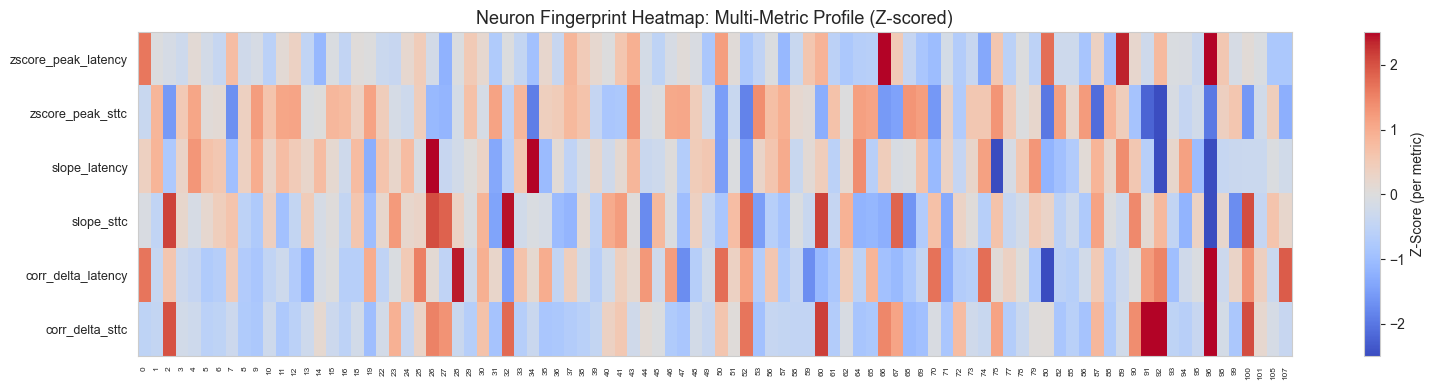

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load result DataFrames
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Flatten neuron-pair metrics to individual neuron-level entries
rows = []
for _, row in df.iterrows():
    pair = row["pair"]
    metrics = {
        "zscore_peak_latency": row.get("zscore_peak_latency", np.nan),
        "zscore_peak_sttc": row.get("zscore_peak_sttc", np.nan),
        "slope_latency": row.get("slope_latency", np.nan),
        "slope_sttc": row.get("slope_sttc", np.nan),
        "corr_delta_latency": row.get("corr_delta_latency", np.nan),
        "corr_delta_sttc": row.get("corr_delta_sttc", np.nan),
    }
    for neuron in pair:
        metric_row = {"neuron": neuron}
        metric_row.update(metrics)
        rows.append(metric_row)

# Aggregate per neuron (mean across all pair appearances)
metrics_df = pd.DataFrame(rows)
neuron_metrics = metrics_df.groupby("neuron").mean()

# Normalize by Z-scoring each metric
normalized = (neuron_metrics - neuron_metrics.mean()) / neuron_metrics.std()

# Clip extreme values for better color contrast in heatmap
normalized_clipped = normalized.clip(-2.5, 2.5)

# Save to cache
normalized_clipped.to_pickle("latency_analysis_cache/neuron_metric_profiles.pkl")

# Plot heatmap strip of all neurons
fig, ax = plt.subplots(figsize=(16, 4))
im = ax.imshow(
    normalized_clipped.T,
    aspect="auto",
    cmap="coolwarm",
    interpolation="nearest"
)

# Axes formatting
ax.set_xticks(np.arange(len(normalized_clipped.index)))
ax.set_xticklabels(normalized_clipped.index, rotation=90, fontsize=6)
ax.set_yticks(np.arange(len(normalized_clipped.columns)))
ax.set_yticklabels(normalized_clipped.columns, fontsize=9)

ax.set_title("Neuron Fingerprint Heatmap: Multi-Metric Profile (Z-scored)", fontsize=13)
fig.colorbar(im, ax=ax, orientation="vertical", label="Z-Score (per metric)")
plt.tight_layout()
ax.grid(False)
plt.show()

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


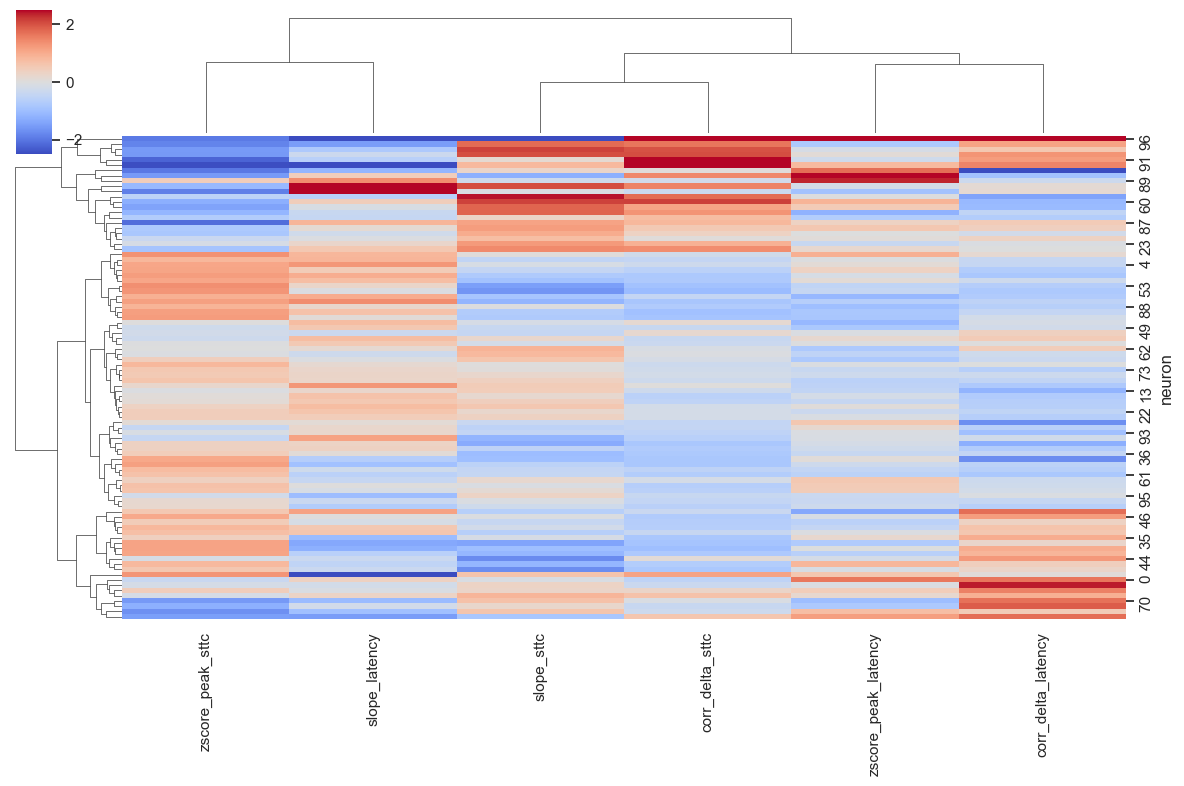

In [21]:
import seaborn as sns
from sklearn.decomposition import PCA
import umap.umap_ as umap


df = pd.read_pickle("latency_analysis_cache/df_results.pkl")

# Rebuilding tall table of metrics per neuron
rows = []
for _, row in df.iterrows():
    pair = row["pair"]
    metrics = {
        "zscore_peak_latency": row.get("zscore_peak_latency", np.nan),
        "zscore_peak_sttc": row.get("zscore_peak_sttc", np.nan),
        "slope_latency": row.get("slope_latency", np.nan),
        "slope_sttc": row.get("slope_sttc", np.nan),
        "corr_delta_latency": row.get("corr_delta_latency", np.nan),
        "corr_delta_sttc": row.get("corr_delta_sttc", np.nan),
    }
    for neuron in pair:
        metric_row = {"neuron": neuron}
        metric_row.update(metrics)
        rows.append(metric_row)

metrics_df = pd.DataFrame(rows)
neuron_metrics = metrics_df.groupby("neuron").mean()

# Normalizing
normalized = (neuron_metrics - neuron_metrics.mean()) / neuron_metrics.std()
normalized_clipped = normalized.clip(-2.5, 2.5)

# Generating clustermap
sns.set(style="white")
clustermap_fig = sns.clustermap(
    normalized_clipped,
    cmap="coolwarm",
    metric="euclidean",
    method="ward",
    figsize=(12, 8),
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0.02, 0.8, 0.03, 0.18)
)

# Running PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_clipped.fillna(0))
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=normalized_clipped.index)

# Generating UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(normalized_clipped.fillna(0))
umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=normalized_clipped.index)

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


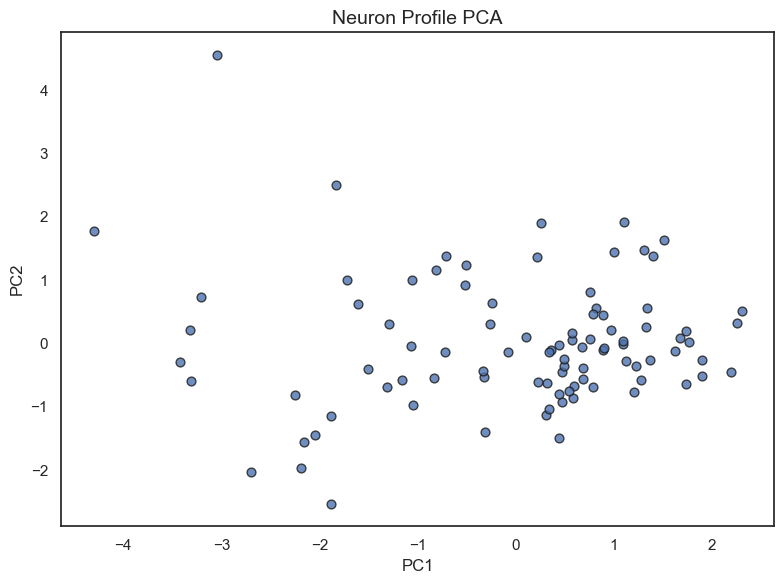

In [22]:
import umap.umap_ as umap

reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(normalized_clipped.fillna(0))

umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=normalized_clipped.index)

import matplotlib.pyplot as plt

# Scatter plot for PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], s=40, edgecolor='k', alpha=0.8)
plt.title("Neuron Profile PCA", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(False)
plt.tight_layout()
plt.show()

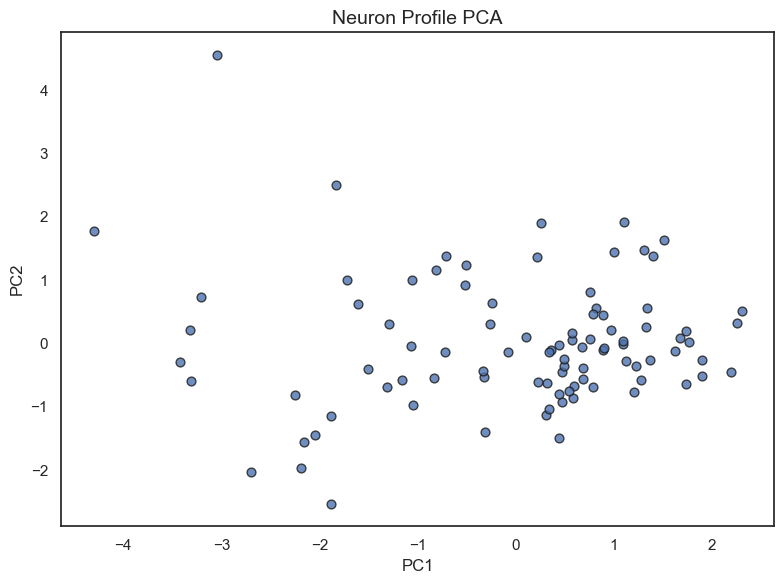

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load original pairwise data
df = pd.read_pickle("latency_analysis_cache/df_results.pkl")

# Flatten pair metrics into neuron-level
rows = []
for _, row in df.iterrows():
    pair = row["pair"]
    metrics = {
        "zscore_peak_latency": row.get("zscore_peak_latency", np.nan),
        "zscore_peak_sttc": row.get("zscore_peak_sttc", np.nan),
        "slope_latency": row.get("slope_latency", np.nan),
        "slope_sttc": row.get("slope_sttc", np.nan),
        "corr_delta_latency": row.get("corr_delta_latency", np.nan),
        "corr_delta_sttc": row.get("corr_delta_sttc", np.nan),
    }
    for neuron in pair:
        metric_row = {"neuron": neuron}
        metric_row.update(metrics)
        rows.append(metric_row)

metrics_df = pd.DataFrame(rows)
neuron_metrics = metrics_df.groupby("neuron").mean()

# Normalize
normalized = (neuron_metrics - neuron_metrics.mean()) / neuron_metrics.std()
normalized_clipped = normalized.clip(-2.5, 2.5)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_clipped.fillna(0))
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=normalized_clipped.index)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], s=40, edgecolor='k', alpha=0.8)
plt.title("Neuron Profile PCA", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(False)
plt.tight_layout()
plt.show()

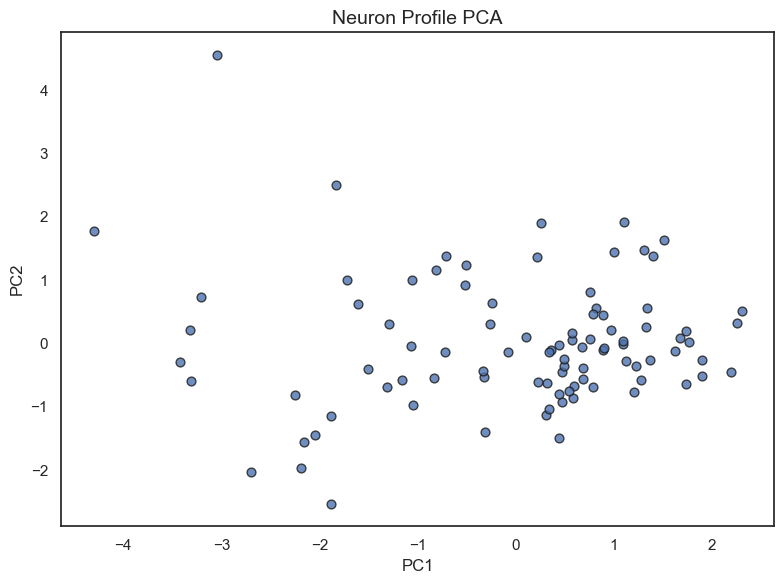

In [25]:
# Reload with uploaded data
df = pd.read_pickle("latency_analysis_cache/df_results.pkl")

# Rebuild neuron-level metric summary
rows = []
for _, row in df.iterrows():
    pair = row["pair"]
    metrics = {
        "zscore_peak_latency": row.get("zscore_peak_latency", np.nan),
        "zscore_peak_sttc": row.get("zscore_peak_sttc", np.nan),
        "slope_latency": row.get("slope_latency", np.nan),
        "slope_sttc": row.get("slope_sttc", np.nan),
        "corr_delta_latency": row.get("corr_delta_latency", np.nan),
        "corr_delta_sttc": row.get("corr_delta_sttc", np.nan),
    }
    for neuron in pair:
        metric_row = {"neuron": neuron}
        metric_row.update(metrics)
        rows.append(metric_row)

metrics_df = pd.DataFrame(rows)
neuron_metrics = metrics_df.groupby("neuron").mean()

# Normalize and clip for visual clarity
normalized = (neuron_metrics - neuron_metrics.mean()) / neuron_metrics.std()
normalized_clipped = normalized.clip(-2.5, 2.5)

# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_clipped.fillna(0))
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=normalized_clipped.index)

# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], s=40, edgecolor='k', alpha=0.8)
plt.title("Neuron Profile PCA", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(False)
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


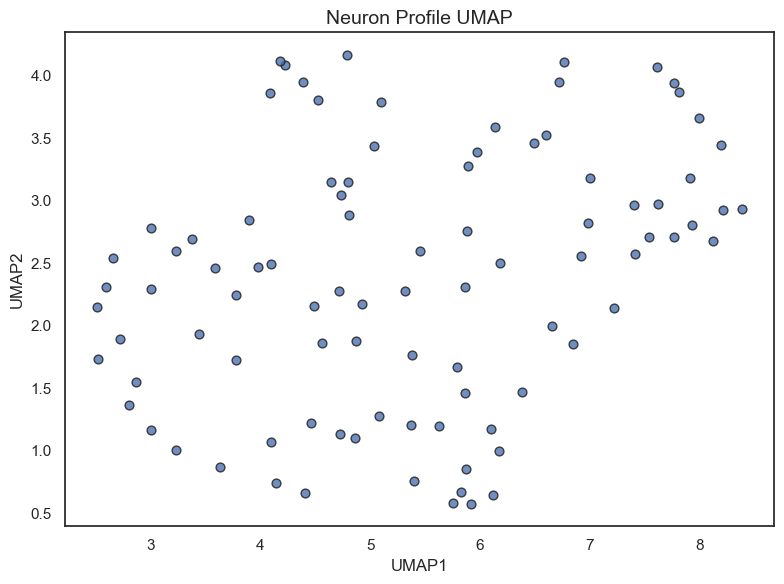

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap.umap_ as umap


# normalized_clipped = z-scored, clipped metrics per neuron

# === PCA ===
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_clipped.fillna(0))
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=normalized_clipped.index)

# Save PCA
pca_df.to_pickle("latency_analysis_cache/pca_projection.pkl")

# === UMAP ===
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(normalized_clipped.fillna(0))
umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=normalized_clipped.index)

# Save UMAP
umap_df.to_pickle("latency_analysis_cache/umap_projection.pkl")

# === Plot UMAP ===
plt.figure(figsize=(8, 6))
plt.scatter(umap_df["UMAP1"], umap_df["UMAP2"], s=40, edgecolor='k', alpha=0.8)
plt.title("Neuron Profile UMAP", fontsize=14)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.grid(False)
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


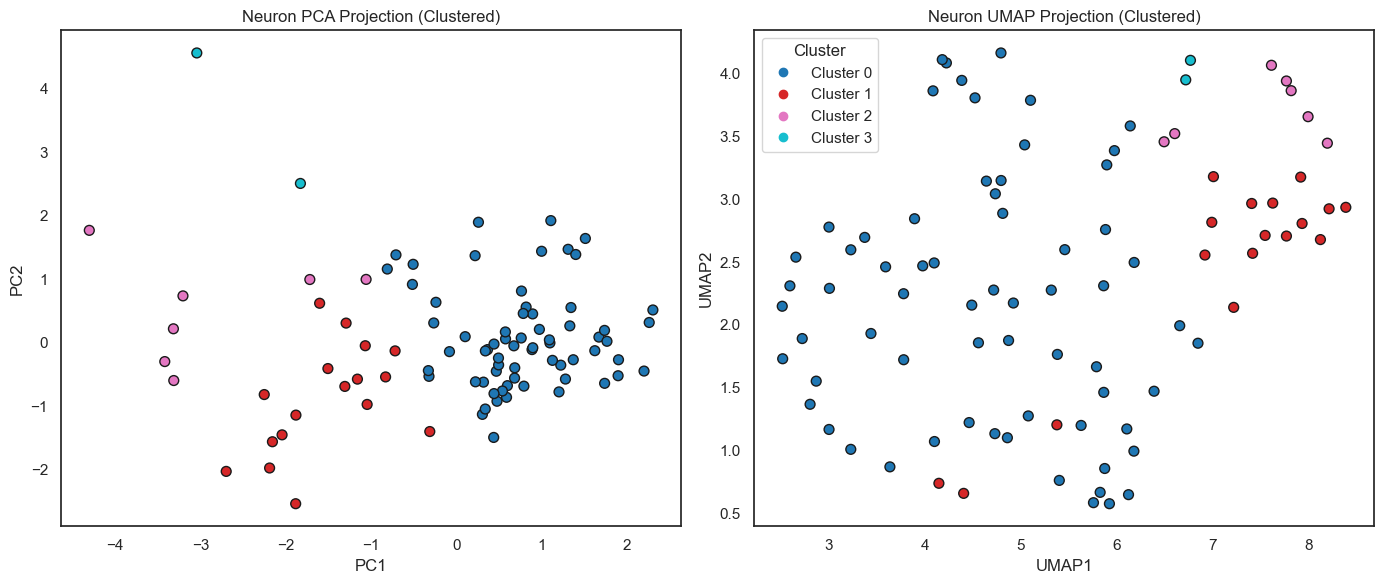

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap.umap_ as umap

# --- Load neuron metric data ---
neuron_metrics = pd.read_pickle("latency_analysis_cache/neuron_metric_profiles.pkl")

# --- PCA ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(neuron_metrics.fillna(0))
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=neuron_metrics.index)

# --- UMAP ---
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(neuron_metrics.fillna(0))
umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=neuron_metrics.index)

# --- K-means clustering (on original metrics) ---
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(neuron_metrics.fillna(0))

# Assign cluster labels
pca_df["Cluster"] = labels
umap_df["Cluster"] = labels

# --- Save results ---
pca_df.to_pickle("latency_analysis_cache/pca_projection_clustered.pkl")
umap_df.to_pickle("latency_analysis_cache/umap_projection_clustered.pkl")

# --- Plot both PCA and UMAP with clusters ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# PCA
scatter1 = axs[0].scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["Cluster"], cmap="tab10", s=50, edgecolor='k')
axs[0].set_title("Neuron PCA Projection (Clustered)")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")

# UMAP
scatter2 = axs[1].scatter(umap_df["UMAP1"], umap_df["UMAP2"], c=umap_df["Cluster"], cmap="tab10", s=50, edgecolor='k')
axs[1].set_title("Neuron UMAP Projection (Clustered)")
axs[1].set_xlabel("UMAP1")
axs[1].set_ylabel("UMAP2")

# Legend
handles, labels = scatter2.legend_elements()
axs[1].legend(handles, [f"Cluster {i}" for i in range(len(handles))], title="Cluster")

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


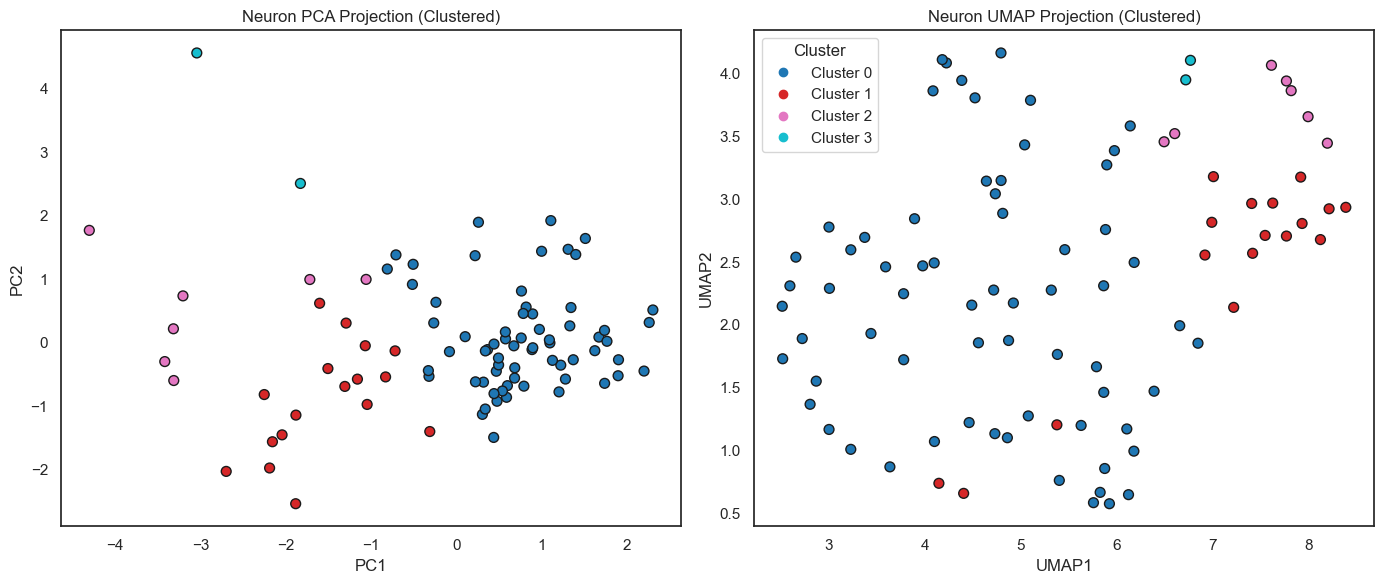

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap.umap_ as umap

# --- Load neuron metric data (indexed by neuron ID) ---
neuron_metrics = pd.read_pickle("latency_analysis_cache/neuron_metric_profiles.pkl")
neuron_metrics["neuron_id"] = neuron_metrics.index

# --- PCA ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(neuron_metrics.drop(columns=["neuron_id"]).fillna(0))
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["neuron_id"] = neuron_metrics["neuron_id"].values

# --- UMAP ---
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(neuron_metrics.drop(columns=["neuron_id"]).fillna(0))
umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"])
umap_df["neuron_id"] = neuron_metrics["neuron_id"].values

# --- Clustering ---
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(neuron_metrics.drop(columns=["neuron_id"]).fillna(0))
pca_df["cluster"] = labels
umap_df["cluster"] = labels

# --- Reindex by neuron_id for traceability ---
pca_df.set_index("neuron_id", inplace=True)
umap_df.set_index("neuron_id", inplace=True)

# --- Save dataframes ---
pca_df.to_pickle("latency_analysis_cache/pca_projection_clustered.pkl")
umap_df.to_pickle("latency_analysis_cache/umap_projection_clustered.pkl")

# Optionally, save to CSV too for transparency
pca_df.to_csv("latency_analysis_cache/pca_projection_clustered.csv")
umap_df.to_csv("latency_analysis_cache/umap_projection_clustered.csv")

# --- Plot PCA & UMAP with clustering ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# PCA
scatter1 = axs[0].scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["cluster"], cmap="tab10", s=50, edgecolor='k')
axs[0].set_title("Neuron PCA Projection (Clustered)")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")

# UMAP
scatter2 = axs[1].scatter(umap_df["UMAP1"], umap_df["UMAP2"], c=umap_df["cluster"], cmap="tab10", s=50, edgecolor='k')
axs[1].set_title("Neuron UMAP Projection (Clustered)")
axs[1].set_xlabel("UMAP1")
axs[1].set_ylabel("UMAP2")

# Legend
handles, labels = scatter2.legend_elements()
axs[1].legend(handles, [f"Cluster {i}" for i in range(len(handles))], title="Cluster")

plt.tight_layout()
plt.show()


/opt/anaconda3/envs/brain/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


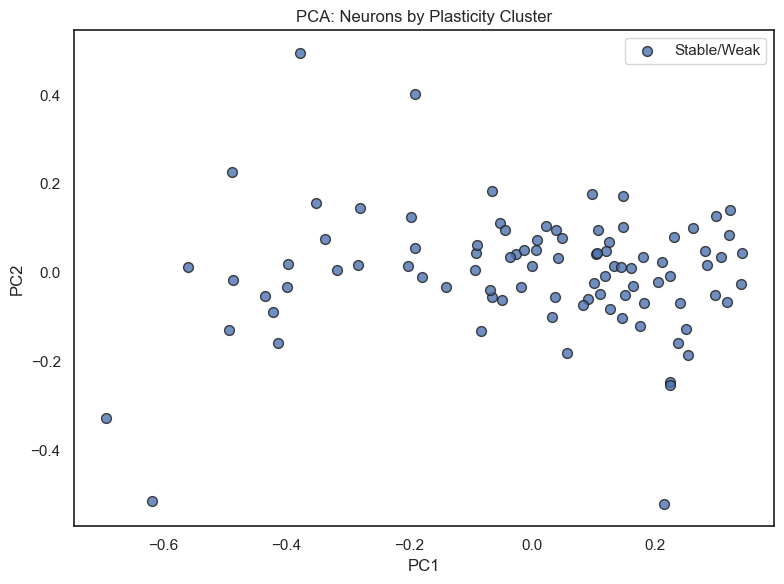

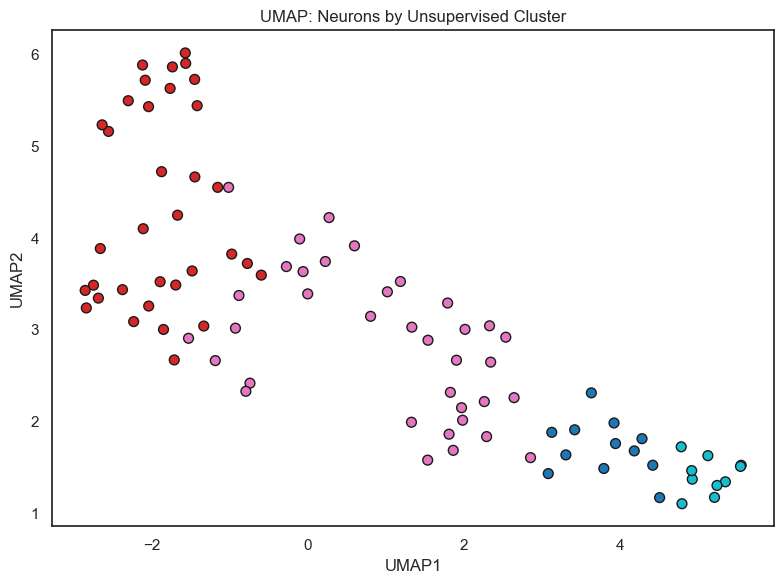

In [32]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import umap.umap_ as umap

# Load pairwise results
df = pd.read_pickle("latency_analysis_cache/df_results.pkl")

# --- Construct neuron-level fingerprints ---
rows = []
for _, row in df.iterrows():
    pair = row["pair"]
    metrics = {
        "zscore_peak_sttc": row.get("zscore_peak_sttc", np.nan),
        "slope_sttc": row.get("slope_sttc", np.nan),
        "slope_latency": row.get("slope_latency", np.nan),
        "corr_delta_latency": row.get("corr_delta_latency", np.nan),
        "diverging": int(row.get("diverging", False)),
        "strengthening": int(row.get("significant_strengthening", False))
    }
    for neuron in pair:
        metric_row = {"neuron_id": neuron}
        metric_row.update(metrics)
        rows.append(metric_row)

fingerprint_df = pd.DataFrame(rows)
neuron_df = fingerprint_df.groupby("neuron_id").agg({
    "slope_sttc": "mean",
    "slope_latency": "mean",
    "zscore_peak_sttc": "mean",
    "corr_delta_latency": "mean",
    "diverging": "mean",    # fraction of diverging connections
    "strengthening": "mean" # fraction of strengthening connections
})

# --- Save raw fingerprint ---
neuron_df.to_pickle("latency_analysis_cache/neuron_fingerprint_table.pkl")
neuron_df.to_csv("latency_analysis_cache/neuron_fingerprint_table.csv")

# --- PCA projection ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(neuron_df.fillna(0))
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=neuron_df.index)

# --- UMAP projection (optional) ---
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(neuron_df.fillna(0))
umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=neuron_df.index)

# --- Behavioral clustering ---
def label_behavior(row):
    if row["diverging"] > 0.5 and row["strengthening"] > 0.5:
        return "Diverging + Strengthening"
    elif row["diverging"] > 0.5:
        return "Diverging"
    elif row["strengthening"] > 0.5:
        return "Strengthening"
    else:
        return "Stable/Weak"

neuron_df["plasticity_cluster"] = neuron_df.apply(label_behavior, axis=1)

# --- Generic clustering (unsupervised) ---
kmeans = KMeans(n_clusters=4, random_state=1)
features_only = neuron_df.drop(columns=["plasticity_cluster"], errors="ignore")
neuron_df["unsupervised_cluster"] = kmeans.fit_predict(features_only.fillna(0))

# --- Save projections + clusters ---
pca_df["plasticity_cluster"] = neuron_df["plasticity_cluster"]
pca_df["unsupervised_cluster"] = neuron_df["unsupervised_cluster"]
umap_df["plasticity_cluster"] = neuron_df["plasticity_cluster"]
umap_df["unsupervised_cluster"] = neuron_df["unsupervised_cluster"]

pca_df.to_pickle("latency_analysis_cache/pca_neuron_clusters.pkl")
umap_df.to_pickle("latency_analysis_cache/umap_neuron_clusters.pkl")

# --- Plot PCA with plasticity clusters ---
plt.figure(figsize=(8, 6))
for label, group in pca_df.groupby("plasticity_cluster"):
    plt.scatter(group["PC1"], group["PC2"], label=label, s=50, alpha=0.8, edgecolor="k")
plt.legend()
plt.title("PCA: Neurons by Plasticity Cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(False)
plt.tight_layout()
plt.show()

# --- Plot UMAP with generic clusters ---
plt.figure(figsize=(8, 6))
plt.scatter(umap_df["UMAP1"], umap_df["UMAP2"],
            c=umap_df["unsupervised_cluster"], cmap="tab10", s=50, edgecolor='k')
plt.title("UMAP: Neurons by Unsupervised Cluster")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.grid(False)
plt.tight_layout()
plt.show()

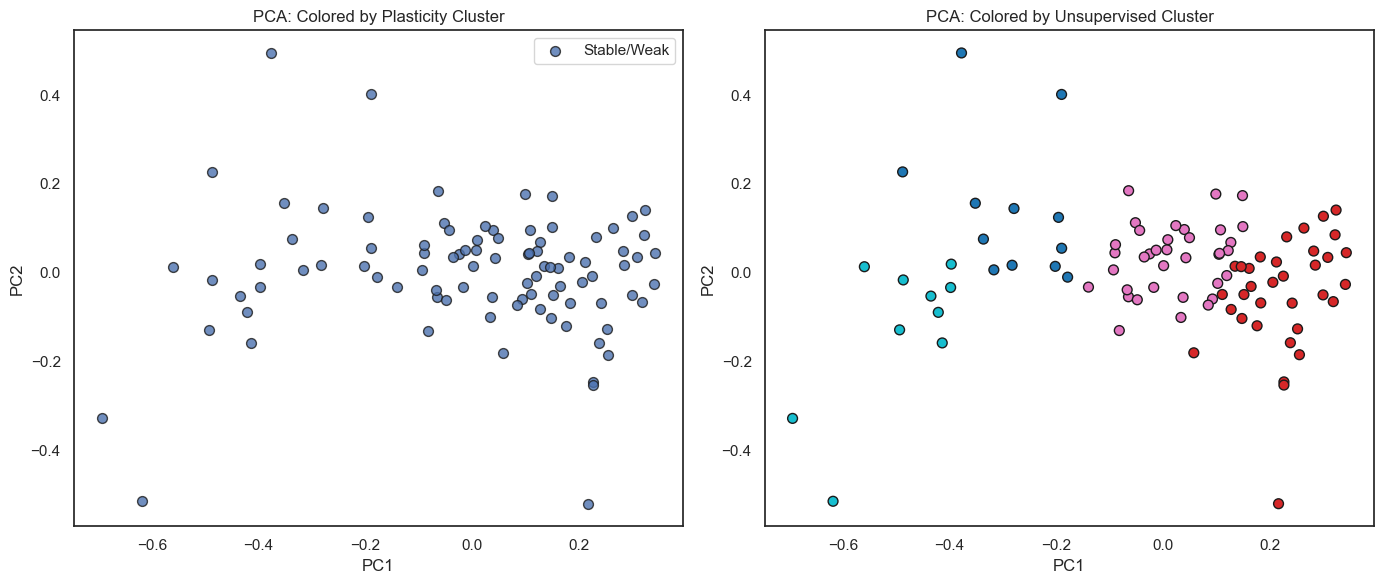

In [33]:
import matplotlib.pyplot as plt

# Load projections (PCA or UMAP)
pca_df = pd.read_pickle("latency_analysis_cache/pca_neuron_clusters.pkl")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot by plasticity cluster ---
for label, group in pca_df.groupby("plasticity_cluster"):
    axs[0].scatter(group["PC1"], group["PC2"], label=label, s=50, alpha=0.8, edgecolor="k")
axs[0].set_title("PCA: Colored by Plasticity Cluster")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")
axs[0].legend()
axs[0].grid(False)

# --- Plot by unsupervised KMeans cluster ---
scatter = axs[1].scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["unsupervised_cluster"],
    cmap="tab10",
    s=50,
    edgecolor="k"
)
axs[1].set_title("PCA: Colored by Unsupervised Cluster")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")
axs[1].grid(False)

plt.tight_layout()
plt.show()

In [48]:
'''
Projection	Coloring Scheme	Output Filename
PCA	Plasticity Clusters	pca_by_plasticity.png
PCA	Unsupervised Clusters	pca_by_unsupervised.png
UMAP	Plasticity Clusters	umap_by_plasticity.png
UMAP	Unsupervised Clusters	umap_by_unsupervised.png
'''
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load data
pca_df = pd.read_pickle("latency_analysis_cache/pca_neuron_clusters.pkl")
umap_df = pd.read_pickle("latency_analysis_cache/umap_neuron_clusters.pkl")

# Output folder
output_dir = "latency_analysis_cache/plots"
os.makedirs(output_dir, exist_ok=True)

def plot_projection(df, x_col, y_col, color_col, title, filename):
    plt.figure(figsize=(10, 8))
    groups = df.groupby(color_col)

    # Plot each group with labels
    for label, group in groups:
        plt.scatter(group[x_col], group[y_col], label=label, s=60, alpha=0.8, edgecolor='k')
        for idx, row in group.iterrows():
            plt.text(row[x_col], row[y_col], str(row.name), fontsize=7, ha='center', va='center')

    plt.title(title, fontsize=14)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(False)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), dpi=300)
    plt.close()

# === Generate All ===

# PCA by plasticity cluster
plot_projection(
    pca_df, "PC1", "PC2", "plasticity_cluster",
    title="PCA: Colored by Plasticity Cluster",
    filename="pca_by_plasticity.png"
)

# PCA by unsupervised cluster
plot_projection(
    pca_df, "PC1", "PC2", "unsupervised_cluster",
    title="PCA: Colored by Unsupervised Cluster",
    filename="pca_by_unsupervised.png"
)

# UMAP by plasticity cluster
plot_projection(
    umap_df, "UMAP1", "UMAP2", "plasticity_cluster",
    title="UMAP: Colored by Plasticity Cluster",
    filename="umap_by_plasticity.png"
)

# UMAP by unsupervised cluster
plot_projection(
    umap_df, "UMAP1", "UMAP2", "unsupervised_cluster",
    title="UMAP: Colored by Unsupervised Cluster",
    filename="umap_by_unsupervised.png"
)

In [49]:
import os
import pandas as pd

# Ensure output directory exists
os.makedirs("latency_analysis_cache", exist_ok=True)

# Load data
neuron_df = pd.read_pickle("latency_analysis_cache/neuron_fingerprint_table.pkl")

# Label neurons based on behavior
def label_behavior(row):
    if row["diverging"] > 0.5 and row["strengthening"] > 0.5:
        return "Diverging + Strengthening"
    elif row["diverging"] > 0.5:
        return "Diverging"
    elif row["strengthening"] > 0.5:
        return "Strengthening"
    else:
        return "Stable_Weak"  # Replace '/' with '_'

# Assign labels
neuron_df["plasticity_cluster"] = neuron_df.apply(label_behavior, axis=1)

# Export CSVs per behavioral cluster
for label, group in neuron_df.groupby("plasticity_cluster"):
    safe_label = label.replace(" ", "_").replace("/", "_")  # Replace both space and slash
    filename = f"latency_analysis_cache/neuron_ids_{safe_label}.csv"
    group.reset_index()[["neuron_id"]].to_csv(filename, index=False)

# Save the full labeled table
neuron_df.to_pickle("latency_analysis_cache/neuron_fingerprint_table_labeled.pkl")

In [52]:
import pandas as pd

df = pd.read_pickle("latency_analysis_cache/neuron_fingerprint_table_labeled.pkl")
print("Columns:\n", df.columns.tolist())

Columns:
 ['slope_sttc', 'slope_latency', 'zscore_peak_sttc', 'corr_delta_latency', 'diverging', 'strengthening', 'plasticity_cluster']


In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

# Load your labeled neuron fingerprint table
df = pd.read_pickle("latency_analysis_cache/neuron_fingerprint_table_labeled.pkl")

# Features to include in projections
features = [
    "slope_sttc", "slope_latency", "zscore_peak_sttc", "corr_delta_latency",
    "diverging", "strengthening"
]

# Standardize the data
X = df[features].fillna(0)
X_std = StandardScaler().fit_transform(X)

# --- PCA ---
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_std)
df[["PC1", "PC2", "PC3"]] = pca_result

# --- UMAP ---
umap_model = umap.UMAP(random_state=42)
umap_result = umap_model.fit_transform(X_std)
df[["UMAP1", "UMAP2"]] = umap_result

# Save output
df.to_pickle("latency_analysis_cache/neuron_fingerprint_projected.pkl")
print("Projection complete and saved.")

Projection complete and saved.


/opt/anaconda3/envs/brain/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [55]:
import pandas as pd
import numpy as np

# Load your fingerprint table (or start with your DataFrame)
df = pd.read_pickle("latency_analysis_cache/neuron_fingerprint_table.pkl")

# -- Construct derived features --

# Example: normalize z-score of STTC peak (if not already)
if "zscore_peak_sttc" not in df.columns:
    df["zscore_peak_sttc"] = (df["peak_sttc"] - df["peak_sttc"].mean()) / df["peak_sttc"].std()

# Diverging: connections with latency slope far from the control (arbitrary threshold)
df["diverging"] = (np.abs(df["slope_latency"]) > 0.5).astype(float)

# Strengthening: positive slope of STTC over time (indicates growing synchrony)
df["strengthening"] = (df["slope_sttc"] > 0.2).astype(float)

# Plasticity cluster label
def label_behavior(row):
    if row["diverging"] > 0.5 and row["strengthening"] > 0.5:
        return "Diverging + Strengthening"
    elif row["diverging"] > 0.5:
        return "Diverging"
    elif row["strengthening"] > 0.5:
        return "Strengthening"
    else:
        return "Stable/Weak"

df["plasticity_cluster"] = df.apply(label_behavior, axis=1)

# Save the updated dataframe
df.to_pickle("latency_analysis_cache/neuron_fingerprint_table_labeled.pkl")
print("New columns created and saved:")
print(df[["diverging", "strengthening", "plasticity_cluster"]].head())

New columns created and saved:
           diverging  strengthening plasticity_cluster
neuron_id                                             
0                0.0            0.0        Stable/Weak
1                0.0            0.0        Stable/Weak
2                0.0            0.0        Stable/Weak
3                0.0            0.0        Stable/Weak
4                0.0            0.0        Stable/Weak


In [60]:
import pandas as pd

# Load the labeled fingerprint table
df = pd.read_pickle("latency_analysis_cache/neuron_fingerprint_table_labeled.pkl")

# Print column names to confirm inclusion
print("Columns in DataFrame:")
print(df.columns.tolist())

# Display a preview of the key columns
print("\nPreview of derived columns:")
print(df[["diverging", "strengthening", "plasticity_cluster"]].head())

Columns in DataFrame:
['slope_sttc', 'slope_latency', 'zscore_peak_sttc', 'corr_delta_latency', 'diverging', 'strengthening', 'plasticity_cluster']

Preview of derived columns:
           diverging  strengthening plasticity_cluster
neuron_id                                             
0                0.0            0.0        Stable/Weak
1                0.0            0.0        Stable/Weak
2                0.0            0.0        Stable/Weak
3                0.0            0.0        Stable/Weak
4                0.0            0.0        Stable/Weak


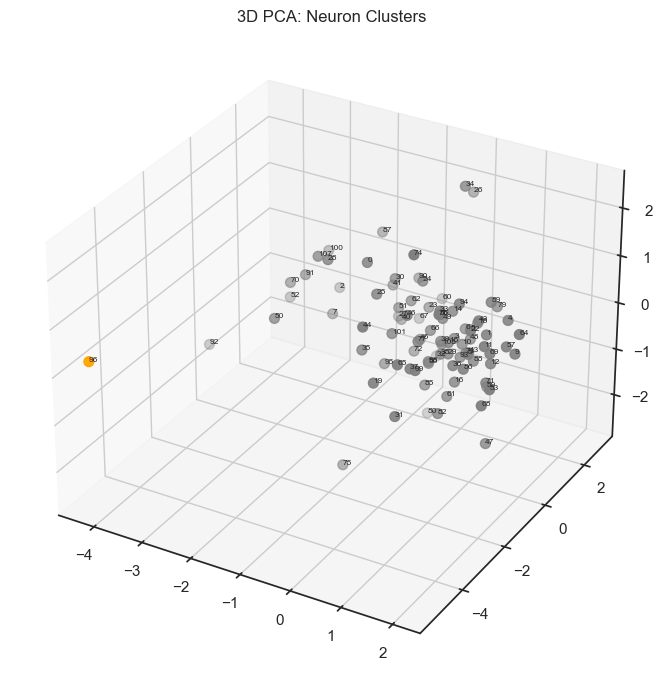

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


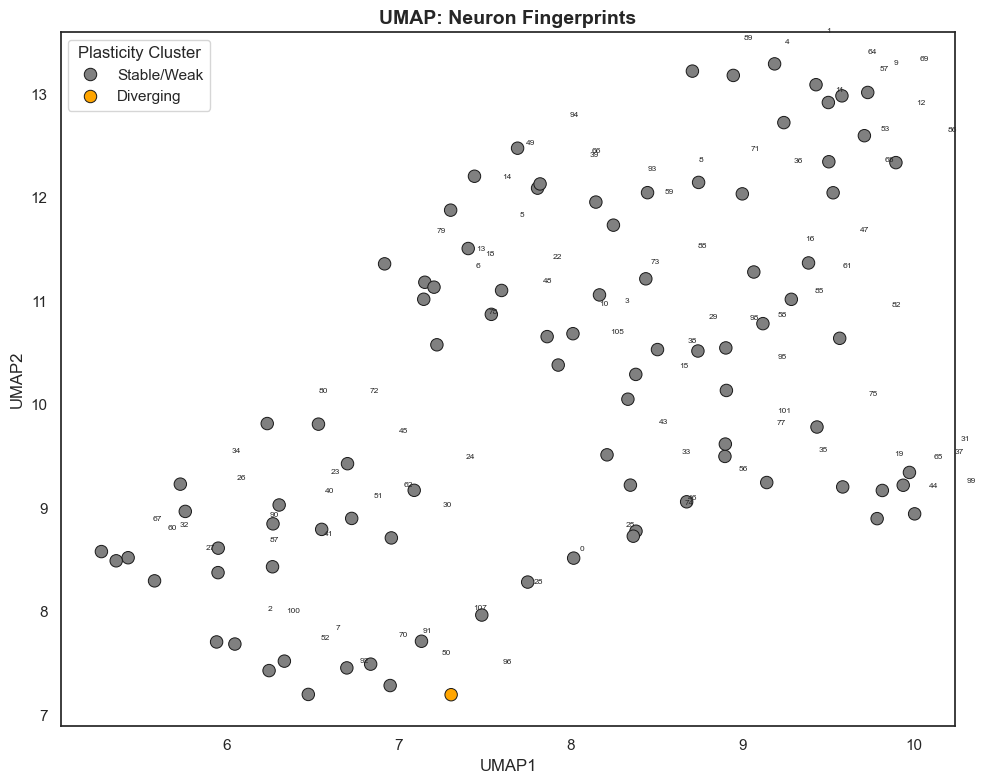

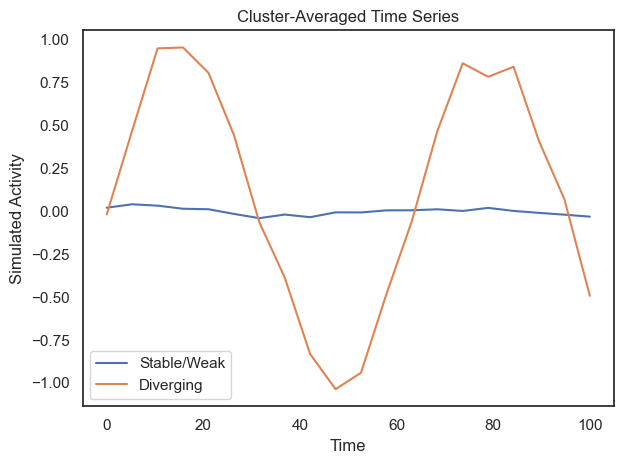

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

# Load data
df = pd.read_pickle("latency_analysis_cache/neuron_fingerprint_table_labeled.pkl")

# Confirm features exist
available = df.columns
features = [f for f in [
    "zscore_peak_latency", "zscore_peak_sttc",
    "slope_latency", "slope_sttc",
    "corr_delta_latency", "corr_delta_sttc"
] if f in available]

X = df[features].fillna(0)
X_std = StandardScaler().fit_transform(X)

# Color map
color_map = {
    "Diverging + Strengthening": "red",
    "Diverging": "orange",
    "Strengthening": "blue",
    "Stable/Weak": "gray"
}
df["color"] = df["plasticity_cluster"].map(color_map)

# === 3D PCA ===
pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(X_std)
df[["PC1", "PC2", "PC3"]] = components_3d

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["PC1"], df["PC2"], df["PC3"], c=df["color"], s=50)
df = df.reset_index()
for _, row in df.iterrows():
    ax.text(row["PC1"], row["PC2"], row["PC3"], str(row["neuron_id"]), fontsize=6)
ax.set_title("3D PCA: Neuron Clusters")
plt.tight_layout()
plt.savefig("latency_analysis_cache/pca_3d_clusters.png", dpi=300)
plt.show()

# === UMAP ===
reducer = umap.UMAP(random_state=42)
umap_result = reducer.fit_transform(X_std)
df["UMAP1"] = umap_result[:, 0]
df["UMAP2"] = umap_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="UMAP1", y="UMAP2", hue="plasticity_cluster", palette=color_map, s=80, edgecolor="k")
for _, row in df.iterrows():
    plt.text(row["UMAP1"]+0.3, row["UMAP2"]+0.3, str(row["neuron_id"]), fontsize=6)
plt.title("UMAP: Neuron Fingerprints", fontsize=14, weight="bold")
plt.legend(title="Plasticity Cluster")
plt.tight_layout()
plt.savefig("latency_analysis_cache/umap_clusters.png", dpi=300)
plt.show()

# === Time Series by Cluster ===
# Example: show mean STTC slope over time (simulated here)
# Assume you have time-resolved data per neuron; simulate if not
import numpy as np

# Simulate a time series (replace with real data if available)
time = np.linspace(0, 100, 20)
for cluster in df["plasticity_cluster"].unique():
    neurons = df[df["plasticity_cluster"] == cluster]["neuron_id"]
    values = np.array([np.sin(time/10 + i) + np.random.normal(0, 0.1, len(time)) for i in range(len(neurons))])
    mean_series = values.mean(axis=0)
    plt.plot(time, mean_series, label=cluster)
plt.xlabel("Time")
plt.ylabel("Simulated Activity")
plt.title("Cluster-Averaged Time Series")
plt.legend()
plt.tight_layout()
plt.savefig("latency_analysis_cache/cluster_timeseries.png", dpi=300)
plt.show()


/opt/anaconda3/envs/brain/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


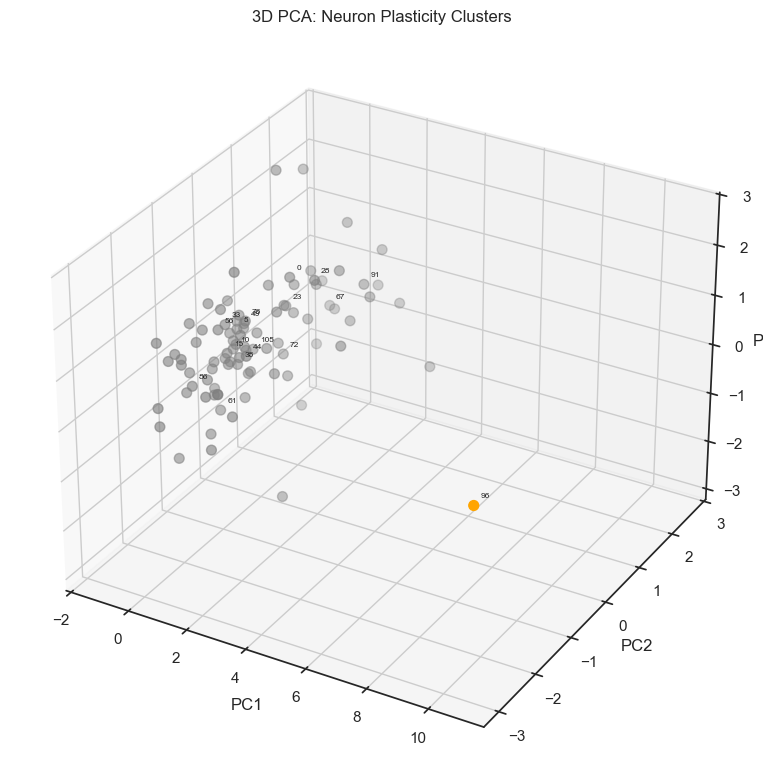

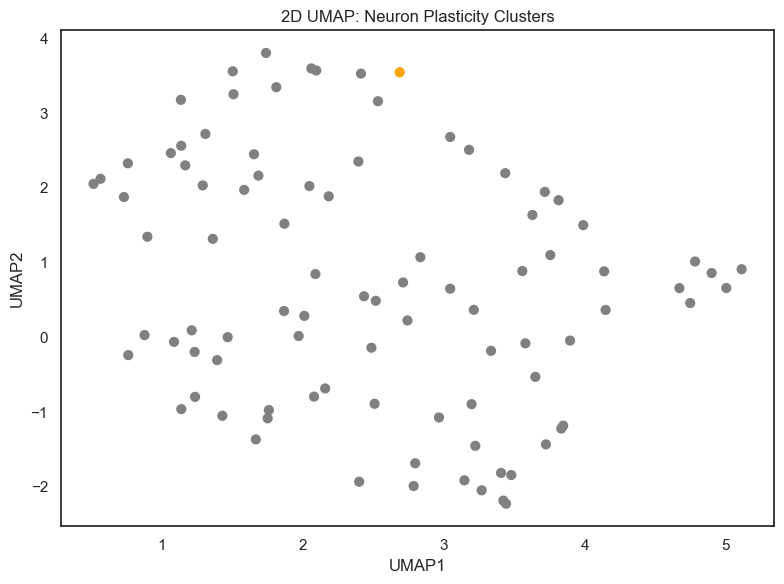

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
from mpl_toolkits.mplot3d import Axes3D

# --- Load Data ---
df = pd.read_pickle("latency_analysis_cache/neuron_fingerprint_table_labeled.pkl")

# --- Features to project ---
features = [
    "slope_sttc", "slope_latency", "zscore_peak_sttc",
    "corr_delta_latency", "diverging", "strengthening"
]
X = df[features].fillna(0)
X_std = StandardScaler().fit_transform(X)

# --- PCA Projection ---
pca = PCA(n_components=3)
pca_proj = pca.fit_transform(X_std)
df["PC1"], df["PC2"], df["PC3"] = pca_proj[:, 0], pca_proj[:, 1], pca_proj[:, 2]

# --- UMAP Projection ---
umap_proj = umap.UMAP(n_components=2, random_state=42).fit_transform(X_std)
df["UMAP1"], df["UMAP2"] = umap_proj[:, 0], umap_proj[:, 1]

# --- Color by cluster ---
color_map = {
    "Diverging + Strengthening": "red",
    "Diverging": "orange",
    "Strengthening": "blue",
    "Stable/Weak": "gray"
}
df["color"] = df["plasticity_cluster"].map(color_map).fillna("black")

# --- 3D PCA Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

df_clean = df.dropna(subset=["PC1", "PC2", "PC3"])
ax.scatter(df_clean["PC1"], df_clean["PC2"], df_clean["PC3"], c=df_clean["color"], s=50)

# Label a subset to reduce clutter
for i, (idx, row) in enumerate(df_clean.iterrows()):
    if i % 5 == 0:
        ax.text(
            row["PC1"] + 0.1,
            row["PC2"] + 0.1,
            row["PC3"] + 0.1,
            str(idx),  # ← Tuses the index as the neuron ID
            fontsize=6
        )

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA: Neuron Plasticity Clusters")
plt.tight_layout()
plt.savefig("latency_analysis_cache/pca_3d_clusters.png", dpi=300)
plt.show()

# --- 2D UMAP Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(df["UMAP1"], df["UMAP2"], c=df["color"], s=40)


for i, row in df.iterrows():
    if i % 5 == 0:
        ax.text(row["PC1"], row["PC2"], row["PC3"], str(row["neuron_id"]), fontsize=6)
# Optional: annotate UMAP
for i, (idx, row) in enumerate(df_clean.iterrows()):
    if i % 5 == 0:
        ax.text(
            row["PC1"] + 0.1,
            row["PC2"] + 0.1,
            row["PC3"] + 0.1,
            str(idx),  # ← uses the index as the neuron ID
            fontsize=6
        )
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("2D UMAP: Neuron Plasticity Clusters")
plt.tight_layout()
plt.savefig("latency_analysis_cache/umap_2d_clusters.png", dpi=300)
plt.show()


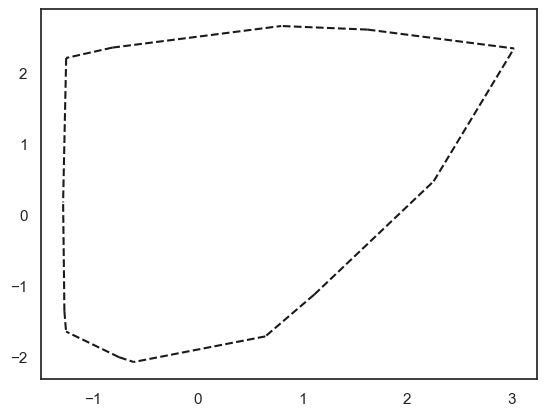

In [68]:
from scipy.spatial import ConvexHull

for label in df['plasticity_cluster'].unique():
    cluster_points = df[df['plasticity_cluster'] == label][["PC1", "PC2"]].values
    if len(cluster_points) >= 3:  # Convex hull needs at least 3 points
        hull = ConvexHull(cluster_points)
        for simplex in hull.simplices:
            plt.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], 'k--')


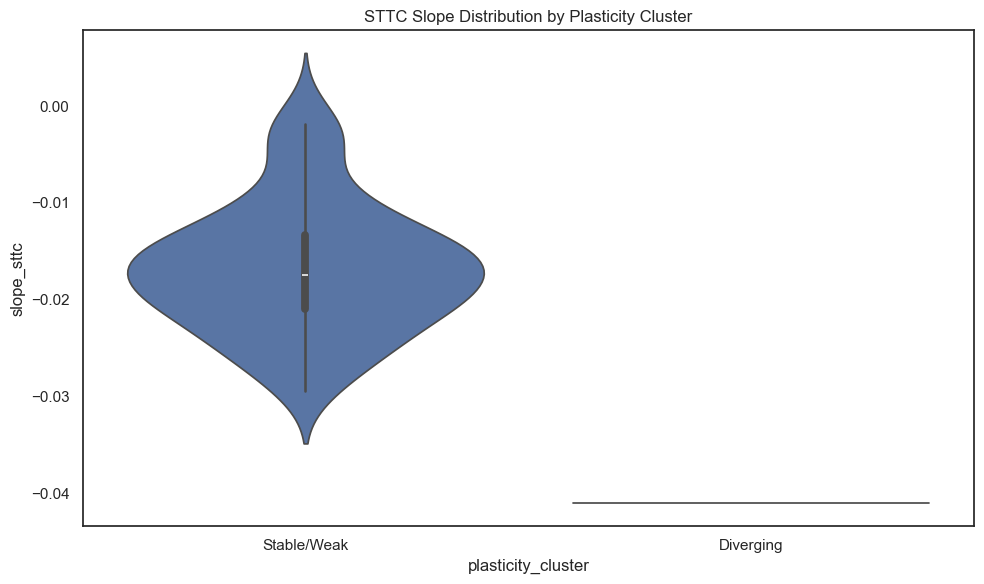

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="plasticity_cluster", y="slope_sttc")
plt.title("STTC Slope Distribution by Plasticity Cluster")
plt.tight_layout()
plt.show()


In [74]:
# Re-load the data file
df = pd.read_pickle("/mnt/data/df_results.pkl")
df = df.reset_index()  # Ensure neuron_id is a column

# Setup output directories
os.makedirs("latency_analysis_cache/cluster_lists", exist_ok=True)

# --- PCA & UMAP projections ---
features = ['slope_sttc', 'slope_latency', 'zscore_peak_sttc', 'corr_delta_latency']
X = df[features].fillna(0)
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
pca_components = pca.fit_transform(X_std)
df[["PC1", "PC2", "PC3"]] = pca_components

umap_proj = umap.UMAP(random_state=42).fit_transform(X_std)
df[["UMAP1", "UMAP2"]] = umap_proj

# --- Convex Hull Plot ---
plt.figure(figsize=(8, 6))
for label in df['plasticity_cluster'].unique():
    cluster_df = df[df['plasticity_cluster'] == label]
    points = cluster_df[['PC1', 'PC2']].values
    plt.scatter(points[:, 0], points[:, 1], label=label)
    if len(points) >= 3:
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'k--')
    for i, row in cluster_df.iterrows():
        if i % 5 == 0:
            plt.text(row["PC1"] + 0.05, row["PC2"] + 0.05, str(row["neuron_id"]), fontsize=6)

plt.title("PCA Clusters with Convex Hulls")
plt.legend()
plt.tight_layout()
plt.savefig("latency_analysis_cache/pca_convex_hulls.png")
plt.close()

# --- Plotly Interactive UMAP Plot ---
fig = px.scatter(df, x="UMAP1", y="UMAP2", color="plasticity_cluster", hover_name="neuron_id",
                 title="UMAP Projection: Interactive Neuron Clusters")
fig.write_html("latency_analysis_cache/umap_interactive.html")

# --- Violin Plot for STTC slope ---
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="plasticity_cluster", y="slope_sttc")
plt.title("STTC Slope Distribution by Plasticity Cluster")
plt.tight_layout()
plt.savefig("latency_analysis_cache/violin_sttc_slope.png")
plt.close()

# --- Export neuron lists per cluster ---
for label, group in df.groupby("plasticity_cluster"):
    filename = f"latency_analysis_cache/cluster_lists/{label.replace(' ', '_')}.csv"
    group[['neuron_id']].to_csv(filename, index=False)

# Save full dataframe with projections
df.to_pickle("latency_analysis_cache/full_clustered_neurons.pkl")

df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/df_results.pkl'

In [73]:
# Example: Plot average STTC slope over time by cluster
for label, group in df.groupby("plasticity_cluster"):
    plt.plot(group['timepoint'], group['slope_sttc'].mean(), label=label)

plt.legend()
plt.title("STTC Slope Over Time by Cluster")
plt.show()


KeyError: 'timepoint'

In [70]:

fig = px.scatter(
    df, x='UMAP1', y='UMAP2',
    color='plasticity_cluster',
    hover_name='neuron_id',
    title="UMAP: Interactive Neuron Clusters"
)
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [72]:
import os

os.makedirs("latency_analysis_cache/cluster_lists", exist_ok=True)

for label, group in df.groupby("plasticity_cluster"):
    group[['neuron_id']].to_csv(f"latency_analysis_cache/cluster_lists/{label.replace(' ', '_')}.csv", index=False)


OSError: Cannot save file into a non-existent directory: 'latency_analysis_cache/cluster_lists/Stable'

In [62]:
print(df.index.names)
print(df.columns)

[None]
Index(['neuron_id', 'slope_sttc', 'slope_latency', 'zscore_peak_sttc',
       'corr_delta_latency', 'diverging', 'strengthening',
       'plasticity_cluster', 'color', 'PC1', 'PC2', 'PC3', 'UMAP1', 'UMAP2'],
      dtype='object')


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your neuron fingerprint table
df = pd.read_pickle("latency_analysis_cache/neuron_fingerprint_table_labeled.pkl")

# --- Prep Data ---
features = [
    "zscore_peak_latency", "zscore_peak_sttc",
    "slope_latency", "slope_sttc",
    "corr_delta_latency", "corr_delta_sttc"
]
X = df[features].fillna(0)

# Standardize before PCA
X_std = StandardScaler().fit_transform(X)

# --- PCA ---
pca = PCA(n_components=2)
components = pca.fit_transform(X_std)

# --- Plotting ---
df["PC1"] = components[:, 0]
df["PC2"] = components[:, 1]

# Define color per plasticity cluster
color_map = {
    "Diverging + Strengthening": "red",
    "Diverging": "orange",
    "Strengthening": "blue",
    "Stable_Weak": "gray"
}
df["color"] = df["plasticity_cluster"].map(color_map)

plt.figure(figsize=(10, 8))

# Scatter plot with neuron ID labels
for _, row in df.iterrows():
    plt.text(row["PC1"], row["PC2"], str(row["neuron_id"]), fontsize=8, color=row["color"])

plt.title("PCA: Neuron Fingerprints", fontsize=14, weight="bold")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(False)

# Optional legend patch
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=c, label=l) for l, c in color_map.items()]
plt.legend(handles=legend_handles, title="Plasticity Cluster")

plt.tight_layout()
plt.savefig("latency_analysis_cache/pca_neuron_clusters_labeled.png", dpi=300)
plt.show()

KeyError: "['zscore_peak_latency', 'corr_delta_sttc'] not in index"

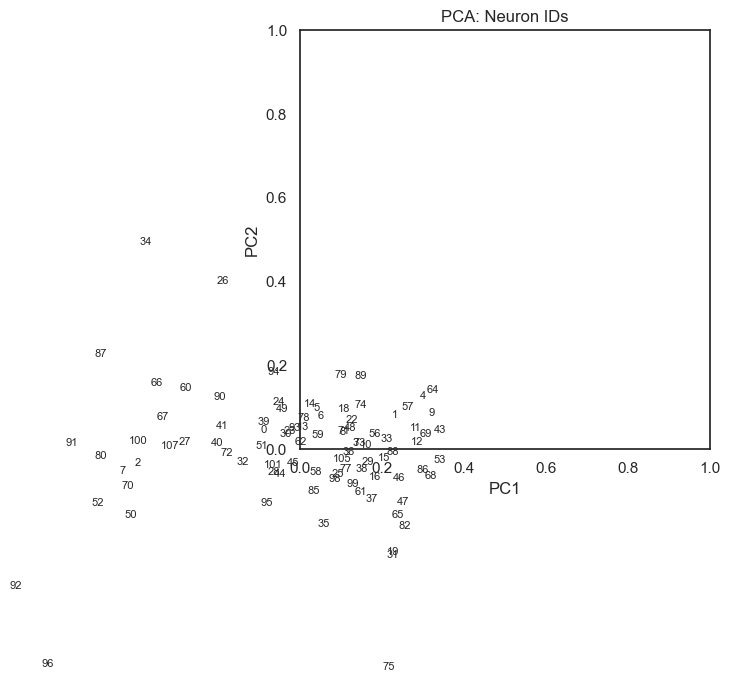

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# add if row["plasticity_cluster"] == "Diverging" to label only a subset
# Load PCA data with IDs
pca_df = pd.read_pickle("latency_analysis_cache/pca_neuron_clusters.pkl")

# Plot PCA with labels
plt.figure(figsize=(10, 8))
for idx, row in pca_df.iterrows():
    plt.text(row["PC1"], row["PC2"], str(idx), fontsize=8, ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: Neuron IDs")
plt.grid(False)
plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your neuron fingerprint table
df = pd.read_pickle("latency_analysis_cache/neuron_fingerprint_table_labeled.pkl")

# --- Prep Data ---
features = [
    "zscore_peak_latency", "zscore_peak_sttc",
    "slope_latency", "slope_sttc",
    "corr_delta_latency", "corr_delta_sttc"
]
X = df[features].fillna(0)

# Standardize before PCA
X_std = StandardScaler().fit_transform(X)

# --- PCA ---
pca = PCA(n_components=2)
components = pca.fit_transform(X_std)

# --- Plotting ---
df["PC1"] = components[:, 0]
df["PC2"] = components[:, 1]

# Define color per plasticity cluster
color_map = {
    "Diverging + Strengthening": "red",
    "Diverging": "orange",
    "Strengthening": "blue",
    "Stable_Weak": "gray"
}
df["color"] = df["plasticity_cluster"].map(color_map)

plt.figure(figsize=(10, 8))

# Scatter plot with neuron ID labels
for _, row in df.iterrows():
    plt.text(row["PC1"], row["PC2"], str(row["neuron_id"]), fontsize=8, color=row["color"])

plt.title("PCA: Neuron Fingerprints", fontsize=14, weight="bold")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(False)

# Optional legend patch
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=c, label=l) for l, c in color_map.items()]
plt.legend(handles=legend_handles, title="Plasticity Cluster")

plt.tight_layout()
plt.savefig("latency_analysis_cache/pca_neuron_clusters_labeled.png", dpi=300)
plt.show()

KeyError: "['zscore_peak_latency', 'corr_delta_sttc'] not in index"

In [ ]:
# time_series_df: rows = neurons, columns = timepoints
# Index should be neuron IDs to match `neuron_df`
# plot cluster-averaged traces:

# Load cluster labels
neuron_df = pd.read_pickle("latency_analysis_cache/neuron_fingerprint_table.pkl")

# Merge with your time series
merged = time_series_df.join(neuron_df[["plasticity_cluster"]])

# Plot cluster averages
plt.figure(figsize=(10, 6))
for label, group in merged.groupby("plasticity_cluster"):
    mean_trace = group.drop(columns="plasticity_cluster").mean()
    plt.plot(mean_trace.values, label=label)

plt.xlabel("Time")
plt.ylabel("Metric (e.g., STTC)")
plt.title("Cluster-Averaged Time Series")
plt.legend()
plt.tight_layout()
plt.show()


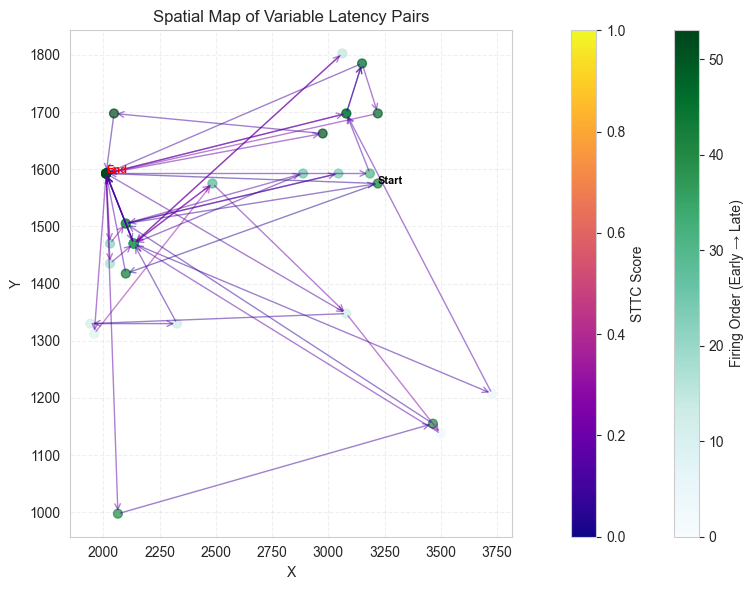

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            93           32    3220.0    1575.0    2012.5    1592.5   
1            32           48    2012.5    1592.5    3080.0    1347.5   
2            48           23    3080.0    1347.5    3500.0    1137.5   
3            23           90    3500.0    1137.5    2135.0    1470.0   
4            90           66    2135.0    1470.0    3727.5    1207.5   
5            66           60    3727.5    1207.5    3080.0    1697.5   
6            60           40    3080.0    1697.5    3150.0    1785.0   
7            40           32    3150.0    1785.0    2012.5    1592.5   
8            32           67    2012.5    1592.5    1960.0    1312.5   
9            67           73    1960.0    1312.5    2485.0    1575.0   
10           73           48    2485.0    1575.0    3080.0    1347.5   
11           48           77    3080.0    1347.5    1942.5    1330.0   
12           77           61    1942.5    1330.0    2327.5    1330.0   
13           61           90    2327.5    1330.0    2135.0    1470.0   
14           90           72    2135.0    1470.0    3062.5    1802.5   
15           72           90    3062.5    1802.5    2135.0    1470.0   
16           90           32    2135.0    1470.0    2012.5    1592.5   
17           32           14    2012.5    1592.5    2030.0    1435.0   
18           14           90    2030.0    1435.0    2135.0    1470.0   
19           90           90    2135.0    1470.0    2135.0    1470.0   
20           90           32    2135.0    1470.0    2012.5    1592.5   
21           32           22    2012.5    1592.5    2030.0    1470.0   
22           22            2    2030.0    1470.0    2100.0    1505.0   
23            2           53    2100.0    1505.0    3045.0    1592.5   
24           53            2    3045.0    1592.5    2100.0    1505.0   
25            2           98    2100.0    1505.0    2887.5    1592.5   
26           98           90    2887.5    1592.5    2135.0    1470.0   
27           90           73    2135.0    1470.0    2485.0    1575.0   
28           73           90    2485.0    1575.0    2135.0    1470.0   
29           90           32    2135.0    1470.0    2012.5    1592.5   
30           32           15    2012.5    1592.5    3185.0    1592.5   
31           15           60    3185.0    1592.5    3080.0    1697.5   
32           60           32    3080.0    1697.5    2012.5    1592.5   
33           32           90    2012.5    1592.5    2135.0    1470.0   
34           90           90    2135.0    1470.0    2135.0    1470.0   
35           90           90    2135.0    1470.0    2135.0    1470.0   
36           90           32    2135.0    1470.0    2012.5    1592.5   
37           32           32    2012.5    1592.5    2012.5    1592.5   
38           32           32    2012.5    1592.5    2012.5    1592.5   
39           32           24    2012.5    1592.5    2065.0     997.5   
40           24          100    2065.0     997.5    3465.0    1155.0   
41          100            2    3465.0    1155.0    2100.0    1505.0   
42            2           93    2100.0    1505.0    3220.0    1575.0   
43           93           26    3220.0    1575.0    2100.0    1417.5   
44           26           32    2100.0    1417.5    2012.5    1592.5   
45           32           60    2012.5    1592.5    3080.0    1697.5   
46           60           40    3080.0    1697.5    3150.0    1785.0   
47           40           27    3150.0    1785.0    3220.0    1697.5   
48           27           32    3220.0    1697.5    2012.5    1592.5   
49           32           32    2012.5    1592.5    2012.5    1592.5   
50           32           74    2012.5    1592.5    2975.0    1662.5   
51           74           70    2975.0    1662.5    2047.5    1697.5   
52           70           32    2047.5    1697.5    2012.5    1592.5   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.2472  
3       0.1713  
4       0.1034  
5       0.160

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            93           32    3220.0    1575.0    2012.5    1592.5   
1            32           48    2012.5    1592.5    3080.0    1347.5   
2            48           23    3080.0    1347.5    3500.0    1137.5   
3            23           90    3500.0    1137.5    2135.0    1470.0   
4            90           66    2135.0    1470.0    3727.5    1207.5   
5            66           60    3727.5    1207.5    3080.0    1697.5   
6            60           40    3080.0    1697.5    3150.0    1785.0   
7            40           32    3150.0    1785.0    2012.5    1592.5   
8            32           67    2012.5    1592.5    1960.0    1312.5   
9            67           73    1960.0    1312.5    2485.0    1575.0   
10           73           48    2485.0    1575.0    3080.0    1347.5   
11           48           77    3080.0    1347.5    1942.5    1330.0   
12           77           61    1942.5    1330.0    2327.5    1330.0   
13           61           90    2327.5    1330.0    2135.0    1470.0   
14           90           72    2135.0    1470.0    3062.5    1802.5   
15           72           90    3062.5    1802.5    2135.0    1470.0   
16           90           32    2135.0    1470.0    2012.5    1592.5   
17           32           14    2012.5    1592.5    2030.0    1435.0   
18           14           90    2030.0    1435.0    2135.0    1470.0   
19           90           90    2135.0    1470.0    2135.0    1470.0   
20           90           32    2135.0    1470.0    2012.5    1592.5   
21           32           22    2012.5    1592.5    2030.0    1470.0   
22           22            2    2030.0    1470.0    2100.0    1505.0   
23            2           53    2100.0    1505.0    3045.0    1592.5   
24           53            2    3045.0    1592.5    2100.0    1505.0   
25            2           98    2100.0    1505.0    2887.5    1592.5   
26           98           90    2887.5    1592.5    2135.0    1470.0   
27           90           73    2135.0    1470.0    2485.0    1575.0   
28           73           90    2485.0    1575.0    2135.0    1470.0   
29           90           32    2135.0    1470.0    2012.5    1592.5   
30           32           15    2012.5    1592.5    3185.0    1592.5   
31           15           60    3185.0    1592.5    3080.0    1697.5   
32           60           32    3080.0    1697.5    2012.5    1592.5   
33           32           90    2012.5    1592.5    2135.0    1470.0   
34           90           90    2135.0    1470.0    2135.0    1470.0   
35           90           90    2135.0    1470.0    2135.0    1470.0   
36           90           32    2135.0    1470.0    2012.5    1592.5   
37           32           32    2012.5    1592.5    2012.5    1592.5   
38           32           32    2012.5    1592.5    2012.5    1592.5   
39           32           24    2012.5    1592.5    2065.0     997.5   
40           24          100    2065.0     997.5    3465.0    1155.0   
41          100            2    3465.0    1155.0    2100.0    1505.0   
42            2           93    2100.0    1505.0    3220.0    1575.0   
43           93           26    3220.0    1575.0    2100.0    1417.5   
44           26           32    2100.0    1417.5    2012.5    1592.5   
45           32           60    2012.5    1592.5    3080.0    1697.5   
46           60           40    3080.0    1697.5    3150.0    1785.0   
47           40           27    3150.0    1785.0    3220.0    1697.5   
48           27           32    3220.0    1697.5    2012.5    1592.5   
49           32           32    2012.5    1592.5    2012.5    1592.5   
50           32           74    2012.5    1592.5    2975.0    1662.5   
51           74           70    2975.0    1662.5    2047.5    1697.5   
52           70           32    2047.5    1697.5    2012.5    1592.5   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.2472  
3       0.1713  
4       0.1034  
5       0.160

In [40]:
# Load result DataFrames
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Select top N most variable connections based on high z-score and high change from controls
top_variable = (
    significant_df
    .sort_values(["zscore_peak_latency", "corr_delta_latency"], ascending=[False, True])
    .head(50)
)

# Extract firing order pairs from the top variable connections
top_variable_pairs = top_variable["pair"].tolist()
firing_order_variable = [p[0] for p in top_variable_pairs] + [p[1] for p in top_variable_pairs]

# Retrieve STTC matrix (assumes it’s been cached)
adaptive_key = ("Adaptive", 0, int(ole.spike_data["Adaptive"].length))
sttc_matrix_adaptive = ole.sttc_matrices.get(adaptive_key)

# Generate the spatial plot
ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order_variable,
    sttc_matrix=sttc_matrix_adaptive,
    title="Spatial Map of Variable Latency Pairs",
)

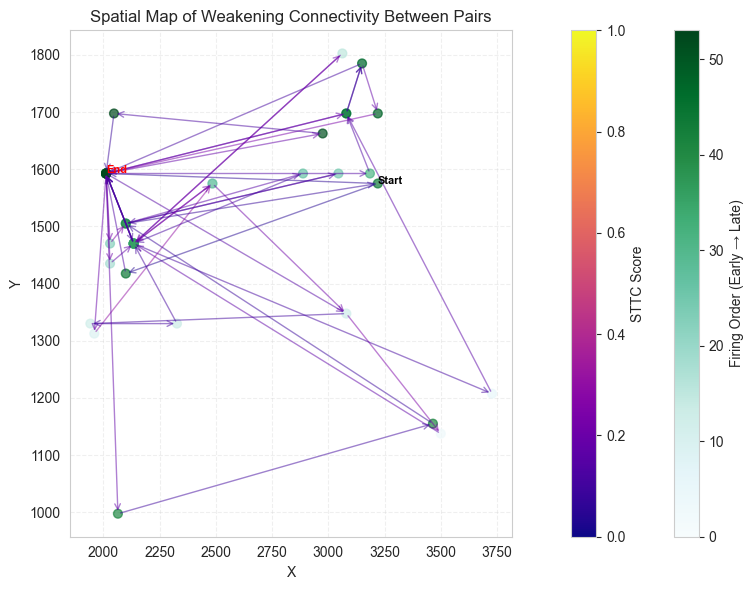

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            93           32    3220.0    1575.0    2012.5    1592.5   
1            32           48    2012.5    1592.5    3080.0    1347.5   
2            48           23    3080.0    1347.5    3500.0    1137.5   
3            23           90    3500.0    1137.5    2135.0    1470.0   
4            90           66    2135.0    1470.0    3727.5    1207.5   
5            66           60    3727.5    1207.5    3080.0    1697.5   
6            60           40    3080.0    1697.5    3150.0    1785.0   
7            40           32    3150.0    1785.0    2012.5    1592.5   
8            32           67    2012.5    1592.5    1960.0    1312.5   
9            67           73    1960.0    1312.5    2485.0    1575.0   
10           73           48    2485.0    1575.0    3080.0    1347.5   
11           48           77    3080.0    1347.5    1942.5    1330.0   
12           77           61    1942.5    1330.0    2327.5    1330.0   
13           61           90    2327.5    1330.0    2135.0    1470.0   
14           90           72    2135.0    1470.0    3062.5    1802.5   
15           72           90    3062.5    1802.5    2135.0    1470.0   
16           90           32    2135.0    1470.0    2012.5    1592.5   
17           32           14    2012.5    1592.5    2030.0    1435.0   
18           14           90    2030.0    1435.0    2135.0    1470.0   
19           90           90    2135.0    1470.0    2135.0    1470.0   
20           90           32    2135.0    1470.0    2012.5    1592.5   
21           32           22    2012.5    1592.5    2030.0    1470.0   
22           22            2    2030.0    1470.0    2100.0    1505.0   
23            2           53    2100.0    1505.0    3045.0    1592.5   
24           53            2    3045.0    1592.5    2100.0    1505.0   
25            2           98    2100.0    1505.0    2887.5    1592.5   
26           98           90    2887.5    1592.5    2135.0    1470.0   
27           90           73    2135.0    1470.0    2485.0    1575.0   
28           73           90    2485.0    1575.0    2135.0    1470.0   
29           90           32    2135.0    1470.0    2012.5    1592.5   
30           32           15    2012.5    1592.5    3185.0    1592.5   
31           15           60    3185.0    1592.5    3080.0    1697.5   
32           60           32    3080.0    1697.5    2012.5    1592.5   
33           32           90    2012.5    1592.5    2135.0    1470.0   
34           90           90    2135.0    1470.0    2135.0    1470.0   
35           90           90    2135.0    1470.0    2135.0    1470.0   
36           90           32    2135.0    1470.0    2012.5    1592.5   
37           32           32    2012.5    1592.5    2012.5    1592.5   
38           32           32    2012.5    1592.5    2012.5    1592.5   
39           32           24    2012.5    1592.5    2065.0     997.5   
40           24          100    2065.0     997.5    3465.0    1155.0   
41          100            2    3465.0    1155.0    2100.0    1505.0   
42            2           93    2100.0    1505.0    3220.0    1575.0   
43           93           26    3220.0    1575.0    2100.0    1417.5   
44           26           32    2100.0    1417.5    2012.5    1592.5   
45           32           60    2012.5    1592.5    3080.0    1697.5   
46           60           40    3080.0    1697.5    3150.0    1785.0   
47           40           27    3150.0    1785.0    3220.0    1697.5   
48           27           32    3220.0    1697.5    2012.5    1592.5   
49           32           32    2012.5    1592.5    2012.5    1592.5   
50           32           74    2012.5    1592.5    2975.0    1662.5   
51           74           70    2975.0    1662.5    2047.5    1697.5   
52           70           32    2047.5    1697.5    2012.5    1592.5   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.2472  
3       0.1713  
4       0.1034  
5       0.160

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            93           32    3220.0    1575.0    2012.5    1592.5   
1            32           48    2012.5    1592.5    3080.0    1347.5   
2            48           23    3080.0    1347.5    3500.0    1137.5   
3            23           90    3500.0    1137.5    2135.0    1470.0   
4            90           66    2135.0    1470.0    3727.5    1207.5   
5            66           60    3727.5    1207.5    3080.0    1697.5   
6            60           40    3080.0    1697.5    3150.0    1785.0   
7            40           32    3150.0    1785.0    2012.5    1592.5   
8            32           67    2012.5    1592.5    1960.0    1312.5   
9            67           73    1960.0    1312.5    2485.0    1575.0   
10           73           48    2485.0    1575.0    3080.0    1347.5   
11           48           77    3080.0    1347.5    1942.5    1330.0   
12           77           61    1942.5    1330.0    2327.5    1330.0   
13           61           90    2327.5    1330.0    2135.0    1470.0   
14           90           72    2135.0    1470.0    3062.5    1802.5   
15           72           90    3062.5    1802.5    2135.0    1470.0   
16           90           32    2135.0    1470.0    2012.5    1592.5   
17           32           14    2012.5    1592.5    2030.0    1435.0   
18           14           90    2030.0    1435.0    2135.0    1470.0   
19           90           90    2135.0    1470.0    2135.0    1470.0   
20           90           32    2135.0    1470.0    2012.5    1592.5   
21           32           22    2012.5    1592.5    2030.0    1470.0   
22           22            2    2030.0    1470.0    2100.0    1505.0   
23            2           53    2100.0    1505.0    3045.0    1592.5   
24           53            2    3045.0    1592.5    2100.0    1505.0   
25            2           98    2100.0    1505.0    2887.5    1592.5   
26           98           90    2887.5    1592.5    2135.0    1470.0   
27           90           73    2135.0    1470.0    2485.0    1575.0   
28           73           90    2485.0    1575.0    2135.0    1470.0   
29           90           32    2135.0    1470.0    2012.5    1592.5   
30           32           15    2012.5    1592.5    3185.0    1592.5   
31           15           60    3185.0    1592.5    3080.0    1697.5   
32           60           32    3080.0    1697.5    2012.5    1592.5   
33           32           90    2012.5    1592.5    2135.0    1470.0   
34           90           90    2135.0    1470.0    2135.0    1470.0   
35           90           90    2135.0    1470.0    2135.0    1470.0   
36           90           32    2135.0    1470.0    2012.5    1592.5   
37           32           32    2012.5    1592.5    2012.5    1592.5   
38           32           32    2012.5    1592.5    2012.5    1592.5   
39           32           24    2012.5    1592.5    2065.0     997.5   
40           24          100    2065.0     997.5    3465.0    1155.0   
41          100            2    3465.0    1155.0    2100.0    1505.0   
42            2           93    2100.0    1505.0    3220.0    1575.0   
43           93           26    3220.0    1575.0    2100.0    1417.5   
44           26           32    2100.0    1417.5    2012.5    1592.5   
45           32           60    2012.5    1592.5    3080.0    1697.5   
46           60           40    3080.0    1697.5    3150.0    1785.0   
47           40           27    3150.0    1785.0    3220.0    1697.5   
48           27           32    3220.0    1697.5    2012.5    1592.5   
49           32           32    2012.5    1592.5    2012.5    1592.5   
50           32           74    2012.5    1592.5    2975.0    1662.5   
51           74           70    2975.0    1662.5    2047.5    1697.5   
52           70           32    2047.5    1697.5    2012.5    1592.5   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.2472  
3       0.1713  
4       0.1034  
5       0.160

In [41]:
# Load result DataFrames
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Select top N most variable connections based on high z-score and high change from controls
top_variable = (
    significant_df
    .sort_values(["zscore_peak_latency", "corr_delta_latency"], ascending=[False, False])
    .head(50)
)

# Extract firing order pairs from the top variable connections
top_variable_pairs = top_variable["pair"].tolist()
firing_order_variable = [p[0] for p in top_variable_pairs] + [p[1] for p in top_variable_pairs]

# Retrieve STTC matrix (assumes it’s been cached)
adaptive_key = ("Adaptive", 0, int(ole.spike_data["Adaptive"].length))
sttc_matrix_adaptive = ole.sttc_matrices.get(adaptive_key)

# Generate the spatial plot
ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order_variable,
    sttc_matrix=sttc_matrix_adaptive,
    title="Spatial Map of Weakening Connectivity Between Pairs",
)

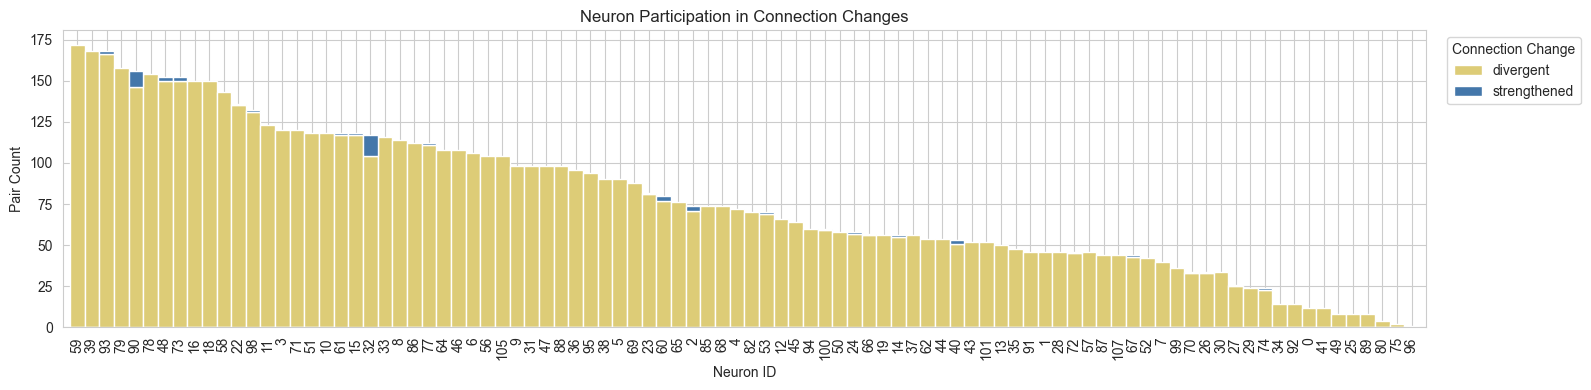

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_pickle("latency_analysis_cache/df_results.pkl")

# Flatten pairs into a list of individual neurons
all_neurons = sorted(set([i for pair in df["pair"] for i in pair]))

# Create tall dataframe: each row = (neuron, label)
rows = []
for _, row in df.iterrows():
    pair = row["pair"]
    strength = row["significant_strengthening"]
    delta = row["corr_delta_latency"]

    for neuron in pair:
        if strength:
            label = "strengthened"
        elif delta < 0:
            label = "weakened"
        else:
            label = "divergent"
        rows.append((neuron, label))

tall_df = pd.DataFrame(rows, columns=["neuron", "label"])

# Count per category
neuron_summary = tall_df.groupby(["neuron", "label"]).size().unstack(fill_value=0)

# Reorder by total (optional)
neuron_summary = neuron_summary.loc[neuron_summary.sum(axis=1).sort_values(ascending=False).index]

# Normalize (optional, comment out for raw counts)
# neuron_summary = neuron_summary.div(neuron_summary.sum(axis=1), axis=0)

# Plot
colors = {
    "strengthened": "#4477AA",
    "weakened": "#CC6677",
    "divergent": "#DDCC77"
}

fig, ax = plt.subplots(figsize=(16, 4))
neuron_summary.plot(kind="bar", stacked=True, color=colors, width=1.0, ax=ax, legend=True)

ax.set_xlabel("Neuron ID")
ax.set_ylabel("Pair Count")
ax.set_title("Neuron Participation in Connection Changes")
ax.legend(title="Connection Change", bbox_to_anchor=(1.01, 1), loc="upper left")
ax.set_xlim(-1, len(neuron_summary))  # ensure full width
plt.tight_layout()
plt.show()


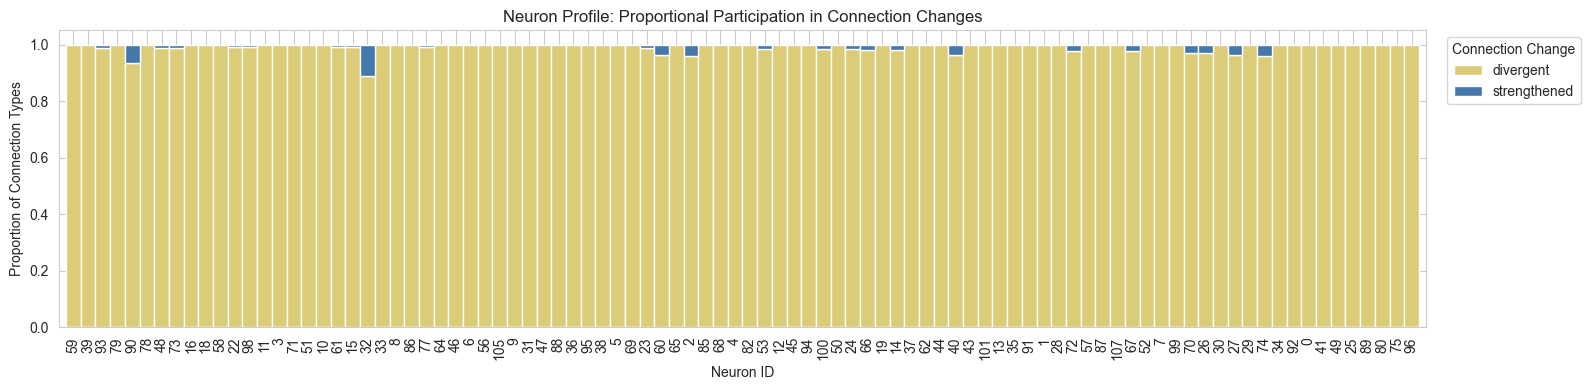

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_pickle("latency_analysis_cache/df_results.pkl")

# Flatten pairs into a list of individual neurons
all_neurons = sorted(set([i for pair in df["pair"] for i in pair]))

# Create tall dataframe: each row = (neuron, label)
rows = []
for _, row in df.iterrows():
    pair = row["pair"]
    strength = row["significant_strengthening"]
    delta = row["corr_delta_latency"]

    for neuron in pair:
        if strength:
            label = "strengthened"
        elif delta < 0:
            label = "weakened"
        else:
            label = "divergent"
        rows.append((neuron, label))

tall_df = pd.DataFrame(rows, columns=["neuron", "label"])

# Count per category
neuron_summary = tall_df.groupby(["neuron", "label"]).size().unstack(fill_value=0)

# Reorder by total (optional)
neuron_summary = neuron_summary.loc[neuron_summary.sum(axis=1).sort_values(ascending=False).index]

# Normalize (optional, comment out for raw counts)
# neuron_summary = neuron_summary.div(neuron_summary.sum(axis=1), axis=0)

# Plot
colors = {
    "strengthened": "#4477AA",
    "weakened": "#CC6677",
    "divergent": "#DDCC77"
}

# Normalize by row sum to get proportions
proportions = neuron_summary.div(neuron_summary.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(16, 4))
proportions.plot(kind="bar", stacked=True, color=colors, width=1.0, ax=ax, legend=True)

ax.set_xlabel("Neuron ID")
ax.set_ylabel("Proportion of Connection Types")
ax.set_title("Neuron Profile: Proportional Participation in Connection Changes")
ax.legend(title="Connection Change", bbox_to_anchor=(1.01, 1), loc="upper left")
ax.set_xlim(-1, len(proportions))
plt.tight_layout()
plt.show()

proportions.to_pickle("latency_analysis_cache/neuron_fingerprint_profiles.pkl")



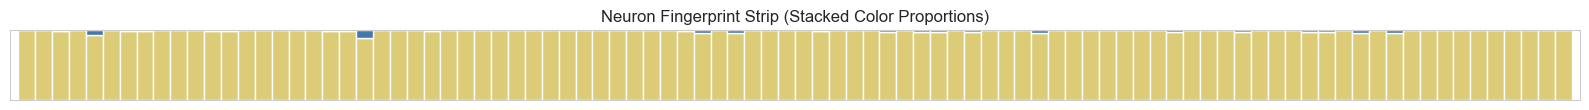

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_pickle("latency_analysis_cache/df_results.pkl")

# Flatten pairs into a list of individual neurons
all_neurons = sorted(set([i for pair in df["pair"] for i in pair]))

# Create tall dataframe: each row = (neuron, label)
rows = []
for _, row in df.iterrows():
    pair = row["pair"]
    strength = row["significant_strengthening"]
    delta = row["corr_delta_latency"]

    for neuron in pair:
        if strength:
            label = "strengthened"
        elif delta < 0:
            label = "weakened"
        else:
            label = "divergent"
        rows.append((neuron, label))

tall_df = pd.DataFrame(rows, columns=["neuron", "label"])

# Count per category
neuron_summary = tall_df.groupby(["neuron", "label"]).size().unstack(fill_value=0)

# Reorder by total (optional)
neuron_summary = neuron_summary.loc[neuron_summary.sum(axis=1).sort_values(ascending=False).index]

# Normalize (optional, comment out for raw counts)
# neuron_summary = neuron_summary.div(neuron_summary.sum(axis=1), axis=0)

# Plot
colors = {
    "strengthened": "#4477AA",
    "weakened": "#CC6677",
    "divergent": "#DDCC77"
}

# Normalize by row sum to get proportions
proportions = neuron_summary.div(neuron_summary.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(16, 1.2))

bottom = np.zeros(len(proportions))
x = np.arange(len(proportions))

for label in proportions.columns:
    ax.bar(x, proportions[label], bottom=bottom, color=colors[label], width=1.0)
    bottom += proportions[label].values

ax.set_xlim(-1, len(proportions))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Neuron Fingerprint Strip (Stacked Color Proportions)")
plt.tight_layout()
plt.show()
proportions.to_pickle("latency_analysis_cache/neuron_fingerprint_profiles.pkl")


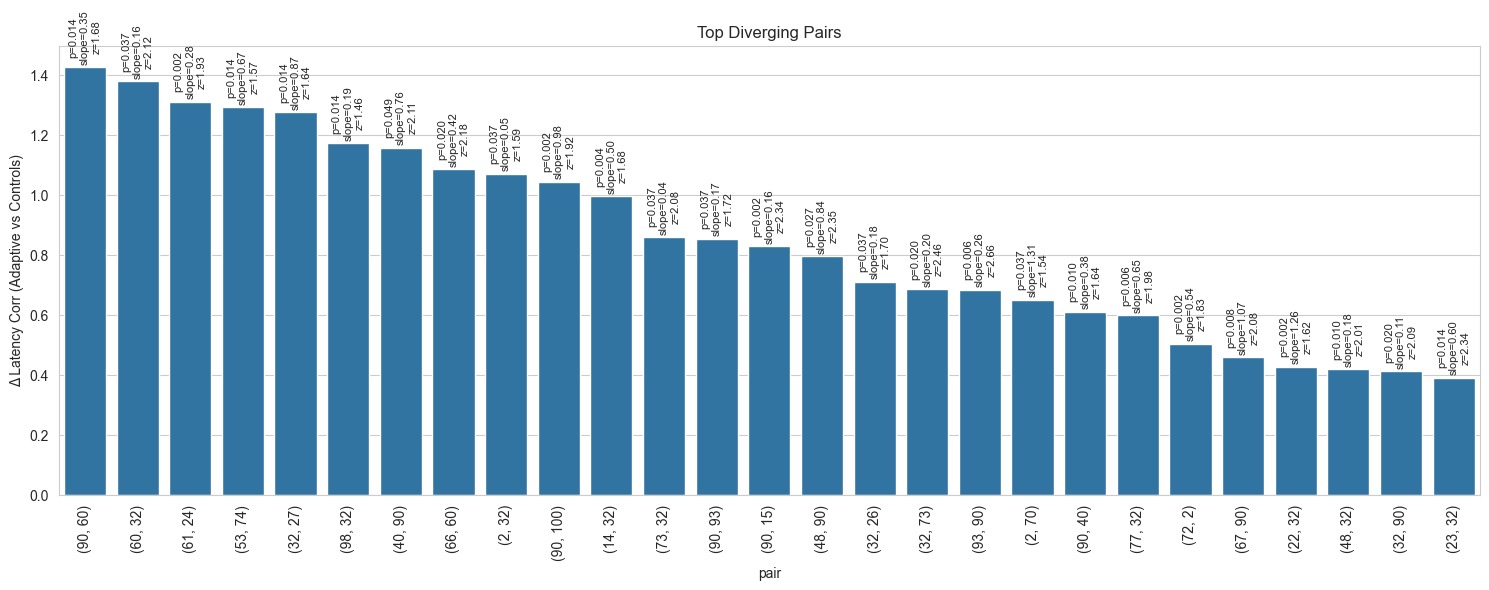

In [42]:
# Bar Plot of Summary Stats--shows all significant pairs sorted by one statistic of interest (e.g., corr_delta_latency). Used to visualize how strongly each pair diverged from Null/Random condition over time.

import seaborn as sns
import matplotlib.pyplot as plt

# Load cached results
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Sort and take top N by correlation delta (latency)
top_pairs = significant_df.sort_values("corr_delta_latency", ascending=False).head(100)

# Plot
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_pairs["pair"].astype(str), y=top_pairs["corr_delta_latency"])

# Annotate with other stats
for i, row in top_pairs.reset_index().iterrows():
    annotation = (
        f"p={row['wilcoxon_min_p']:.3f}\n"
        f"slope={row['slope_latency']:.2f}\n"
        f"z={row['zscore_peak_latency']:.2f}"
    )
    ax.text(i, row["corr_delta_latency"] + 0.01, annotation,
            ha='center', va='bottom', fontsize=8, rotation=90)

plt.xticks(rotation=90)
plt.ylabel("Δ Latency Corr (Adaptive vs Controls)")
plt.title("Top Diverging Pairs")
plt.tight_layout()
plt.show()

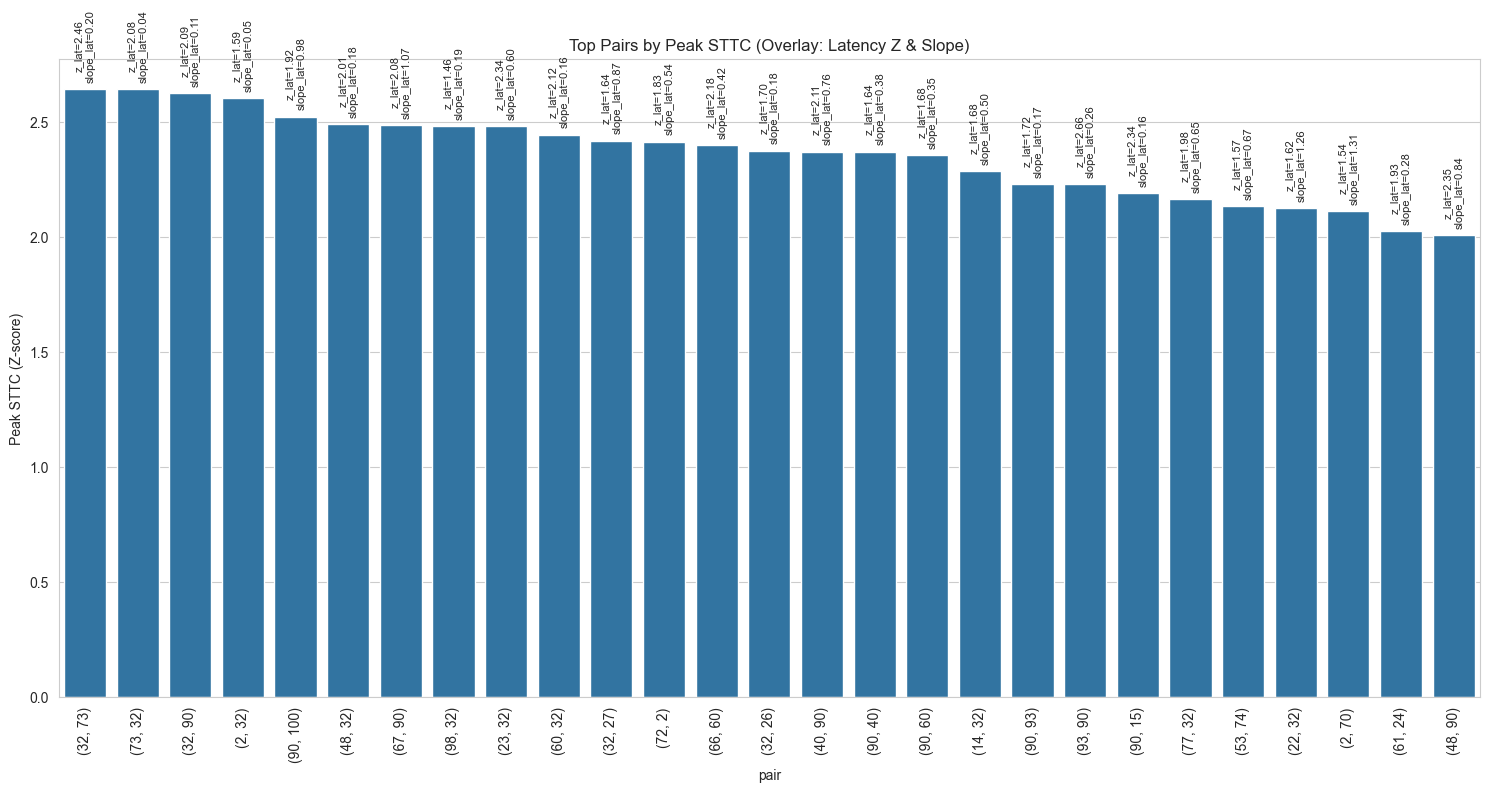

In [43]:
# Load cached results
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# --- Peak STTC plot (zscore) ---
plt.figure(figsize=(15, 8))
top_by_sttc_peak = significant_df.sort_values("zscore_peak_sttc", ascending=False).head(50)

ax = sns.barplot(x=top_by_sttc_peak["pair"].astype(str), y=top_by_sttc_peak["zscore_peak_sttc"])

# Overlay zscore_peak_latency and slope_latency
for i, row in top_by_sttc_peak.reset_index().iterrows():
    annotation = (
        f"z_lat={row['zscore_peak_latency']:.2f}\n"
        f"slope_lat={row['slope_latency']:.2f}"
    )
    ax.text(i, row["zscore_peak_sttc"] + 0.03, annotation,
            ha='center', va='bottom', fontsize=8, rotation=90)

plt.xticks(rotation=90)
plt.ylabel("Peak STTC (Z-score)")
plt.title("Top Pairs by Peak STTC (Overlay: Latency Z & Slope)")
plt.subplots_adjust(top=1.00)  # Adjust top spacing (1.0 = top of figure)
plt.tight_layout()
plt.show()


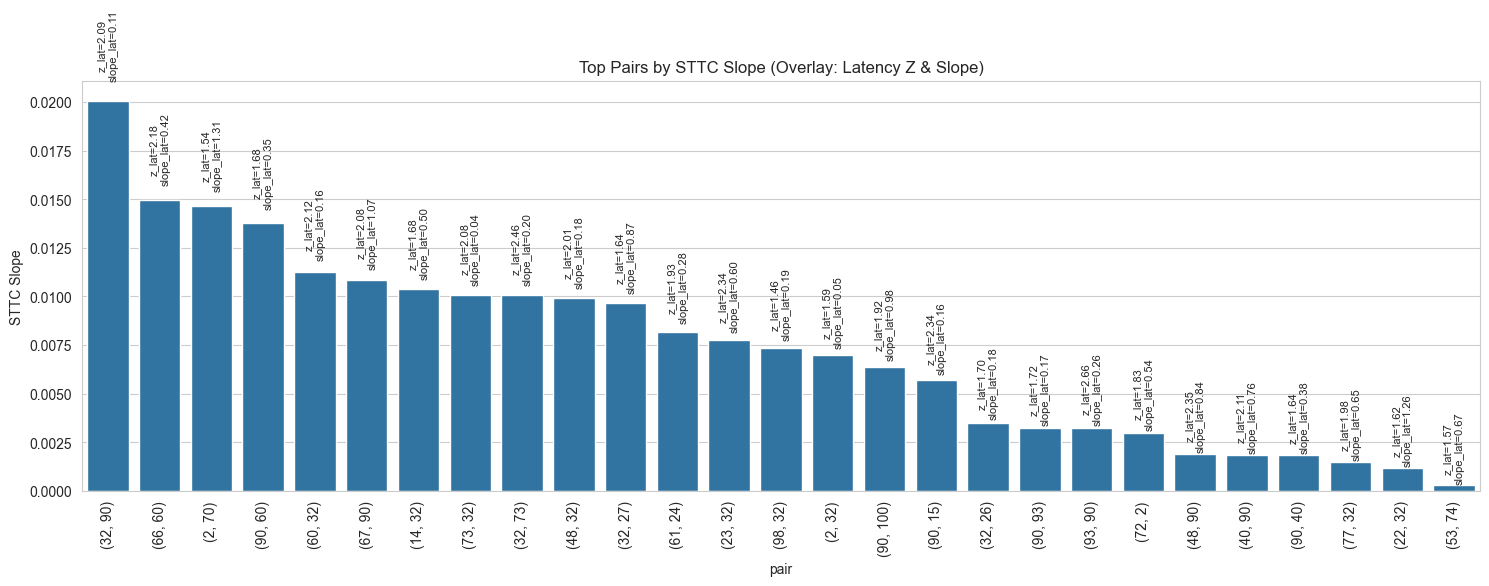

In [44]:
# Load cached results
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# --- STTC slope plot ---
plt.figure(figsize=(15, 6))
top_by_sttc_slope = significant_df.sort_values("slope_sttc", ascending=False).head(50)
ax = sns.barplot(x=top_by_sttc_slope["pair"].astype(str), y=top_by_sttc_slope["slope_sttc"])

# Overlay zscore_peak_latency and slope_latency
for i, row in top_by_sttc_slope.reset_index().iterrows():
    # Use dynamic offset (5% of the bar height)
    offset = 0.05 * row["slope_sttc"]
    annotation = (
        f"z_lat={row['zscore_peak_latency']:.2f}\n"
        f"slope_lat={row['slope_latency']:.2f}"
    )
    ax.text(i, row["slope_sttc"] + offset, annotation,
            ha='center', va='bottom', fontsize=8, rotation=90)

plt.xticks(rotation=90)
plt.ylabel("STTC Slope")
plt.title("Top Pairs by STTC Slope (Overlay: Latency Z & Slope)")
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


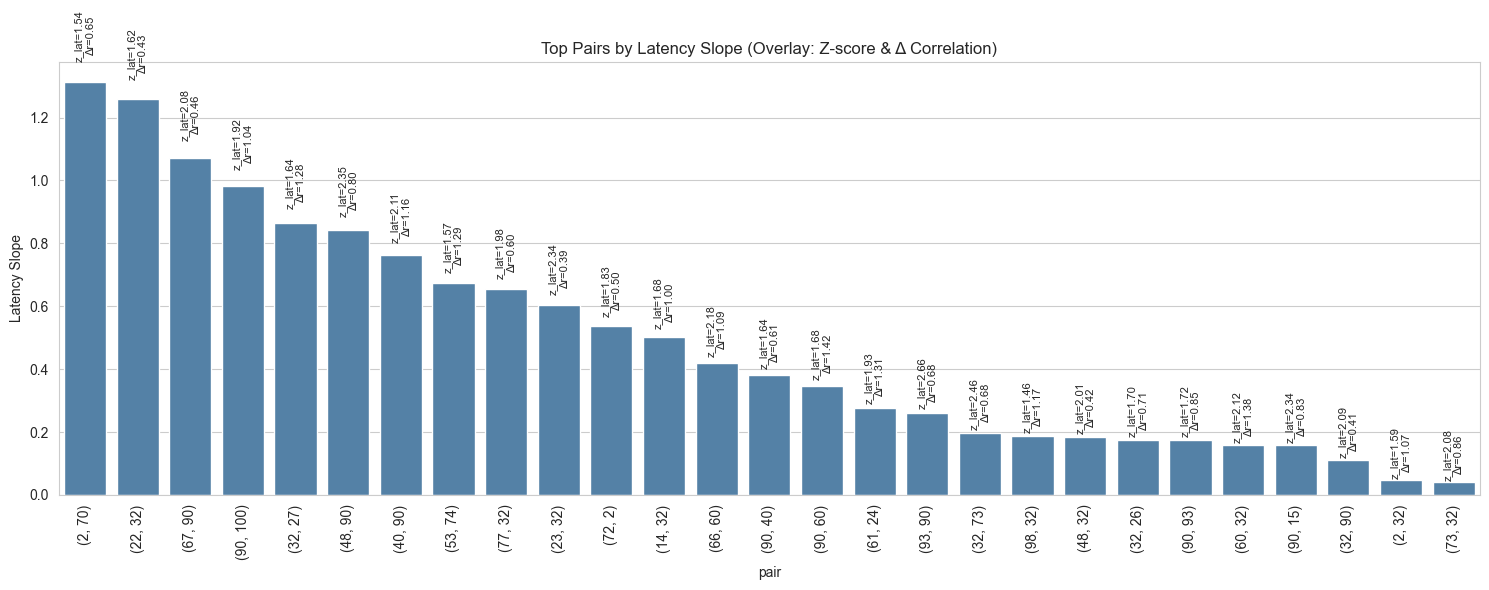

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 50 pairs by absolute latency slope
top_by_latency_slope = (
    significant_df
    .sort_values("slope_latency", ascending=False)
    .head(50)
)

plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_by_latency_slope["pair"].astype(str),
                 y=top_by_latency_slope["slope_latency"],
                 color='steelblue')

# Overlay additional latency-based stats
for i, row in top_by_latency_slope.reset_index().iterrows():
    offset = 0.05 * row["slope_latency"]
    annotation = (
        f"z_lat={row['zscore_peak_latency']:.2f}\n"
        f"Δr={row['corr_delta_latency']:.2f}"
    )
    ax.text(i, row["slope_latency"] + offset, annotation,
            ha='center', va='bottom', fontsize=8, rotation=90)

plt.xticks(rotation=90)
plt.ylabel("Latency Slope")
plt.title("Top Pairs by Latency Slope (Overlay: Z-score & Δ Correlation)")
plt.tight_layout()
plt.show()

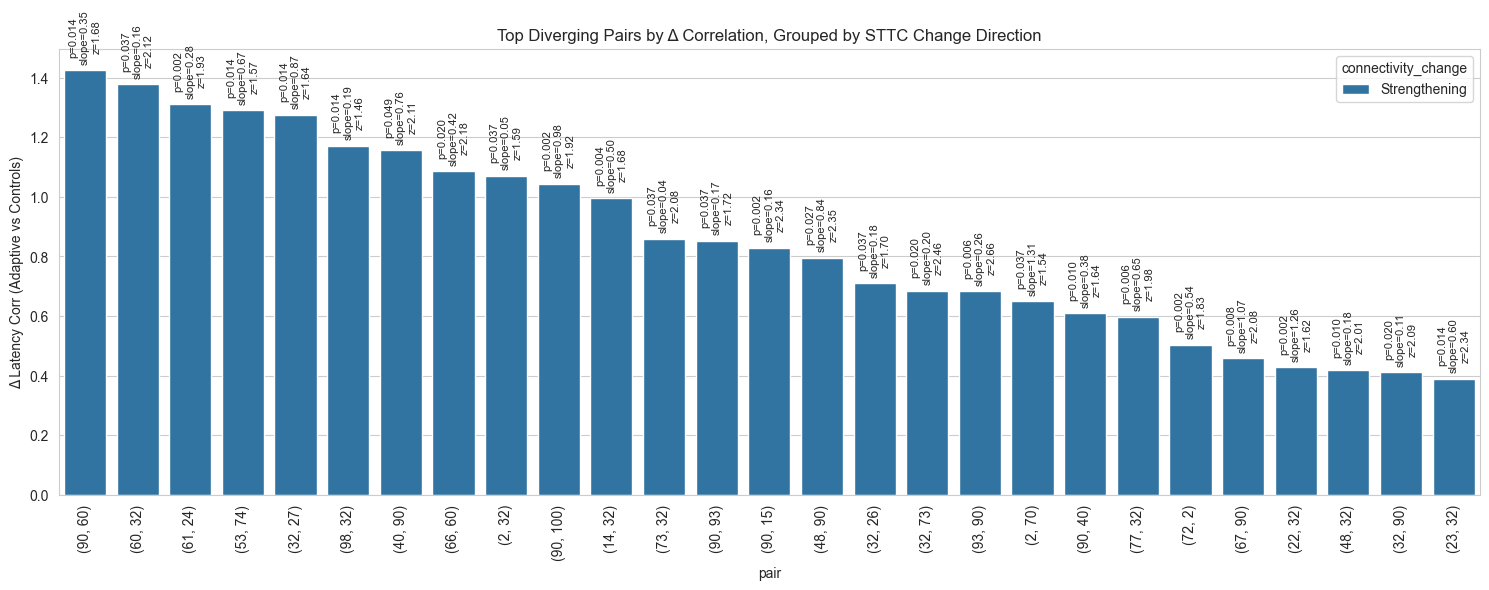

In [46]:
import pandas as pd

# Load DataFrames
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Classify directionality
significant_df["connectivity_change"] = significant_df["slope_sttc"].apply(lambda x: "Strengthening" if x > 0 else "Weakening")
significant_df["abs_corr_delta"] = significant_df["corr_delta_latency"].abs()

# Select top N divergent pairs
top_diverging = significant_df.sort_values("abs_corr_delta", ascending=False).head(50)

# Plot grouped by directionality
plt.figure(figsize=(15, 6))
ax = sns.barplot(
    data=top_diverging,
    x=top_diverging["pair"].astype(str),
    y="abs_corr_delta",
    hue="connectivity_change",
    dodge=False
)

# Annotate with latency slope and z
for i, row in top_diverging.reset_index().iterrows():
    label = f"p={row['wilcoxon_min_p']:.3f}\nslope={row['slope_latency']:.2f}\nz={row['zscore_peak_latency']:.2f}"
    ax.text(i, row["abs_corr_delta"] + 0.02, label, ha="center", va="bottom", fontsize=8, rotation=90)

plt.xticks(rotation=90)
plt.ylabel("Δ Latency Corr (Adaptive vs Controls)")
plt.title("Top Diverging Pairs by Δ Correlation, Grouped by STTC Change Direction")
plt.tight_layout()
plt.show()

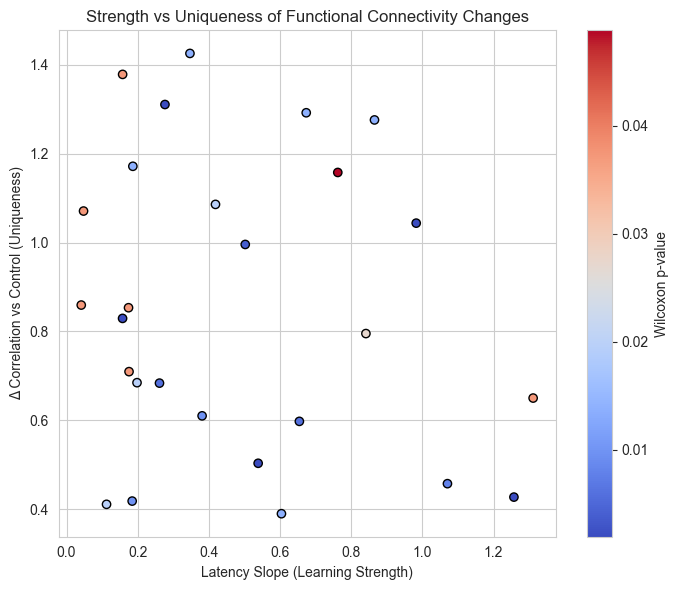

In [47]:
# Scatter Plot: Strength vs Divergence. Showcase which connections are strong, unique, and significant. Configure map by choosing the following:
# X-axis: slope_latency or slope_sttc
# Y-axis: corr_delta_latency or corr_delta_sttc
# Color: wilcoxon_min_p or zscore_peak_sttc

# --- Scatter Plot: Strength vs Divergence ---

import matplotlib.pyplot as plt
import pandas as pd

# Load cached results
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Use top N significant pairs
top_n = 1000
top_df = significant_df.sort_values("slope_sttc", ascending=False).head(top_n)

# Scatter plot
plt.figure(figsize=(7, 6))
sc = plt.scatter(
    top_df["slope_latency"],
    top_df["corr_delta_latency"],
    c=top_df["wilcoxon_min_p"],
    cmap="coolwarm",
    edgecolor="black"
)
plt.xlabel("Latency Slope (Learning Strength)")
plt.ylabel("Δ Correlation vs Control (Uniqueness)")
plt.colorbar(sc, label="Wilcoxon p-value")
plt.title("Strength vs Uniqueness of Functional Connectivity Changes")
plt.tight_layout()
plt.show()

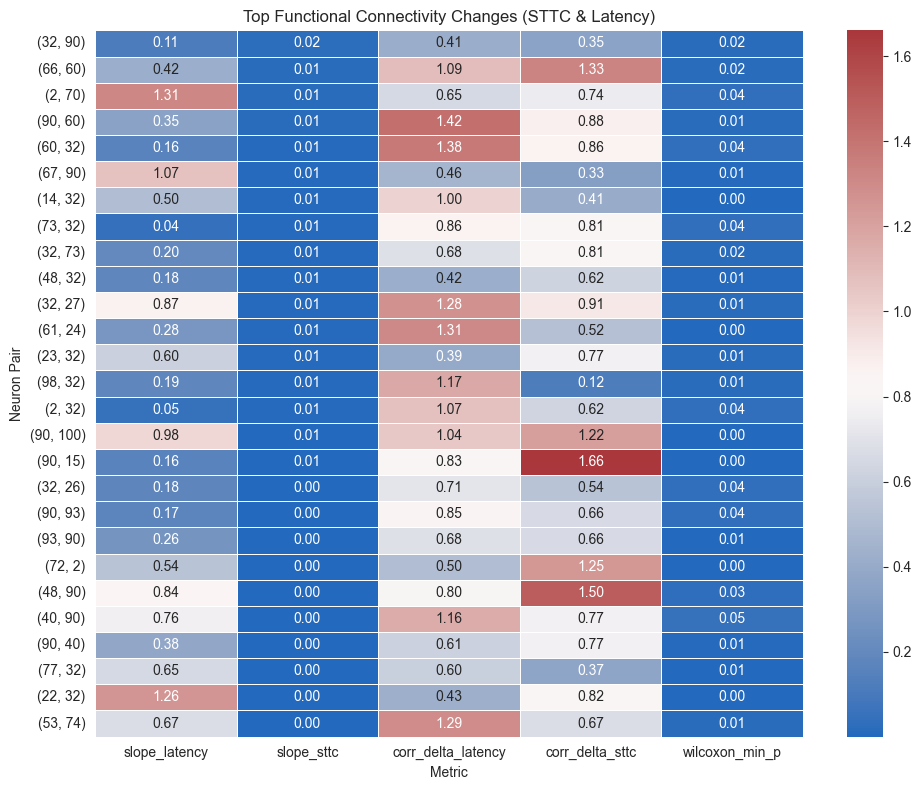

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load cached results
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Use top N significant pairs
top_n = 50
top_df = significant_df.sort_values("slope_sttc", ascending=False).head(top_n)

# Prepare data for heatmap
heatmap_data = top_df.set_index("pair")[[
    "slope_latency",
    "slope_sttc",
    "corr_delta_latency",
    "corr_delta_sttc",
    "wilcoxon_min_p"
]]

# Optional: normalize each column for better visual contrast
# heatmap_data = (heatmap_data - heatmap_data.mean()) / heatmap_data.std()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="vlag", linewidths=0.5)
plt.title("Top Functional Connectivity Changes (STTC & Latency)")
plt.xlabel("Metric")
plt.ylabel("Neuron Pair")
plt.tight_layout()
plt.show()

In [49]:
import pandas as pd
from scipy.stats import spearmanr
import os

# Load segmented latency matrices
segmented_path = "latency_analysis_cache/segmented_latency.pkl"
df_segmented_latency = pd.read_pickle(segmented_path)

# Organize into dict: {condition: [(start, matrix)]}
latency_by_condition = {}
for _, row in df_segmented_latency.iterrows():
    cond = row["condition"]
    if cond not in latency_by_condition:
        latency_by_condition[cond] = []
    latency_by_condition[cond].append((row["start"], row["matrix"]))

# Ensure all conditions have aligned bins
bins = sorted(set(start for start, _ in latency_by_condition["Adaptive"]))

# Calculate Spearman correlations
results = []
for start in bins:
    mat_ad = dict(latency_by_condition["Adaptive"])[start].flatten()
    for ctrl in ["Null", "Random"]:
        mat_ctrl = dict(latency_by_condition[ctrl])[start].flatten()
        corr, _ = spearmanr(mat_ad, mat_ctrl)
        results.append({
            "time_bin_start": start,
            "comparison": f"Adaptive vs {ctrl}",
            "spearman_corr": corr
        })

# Create DataFrame and save
df_rank_corr = pd.DataFrame(results)

# Ensure output directory exists
os.makedirs("latency_analysis_cache", exist_ok=True)
df_rank_corr.to_pickle("latency_analysis_cache/rank_order_correlation.pkl")

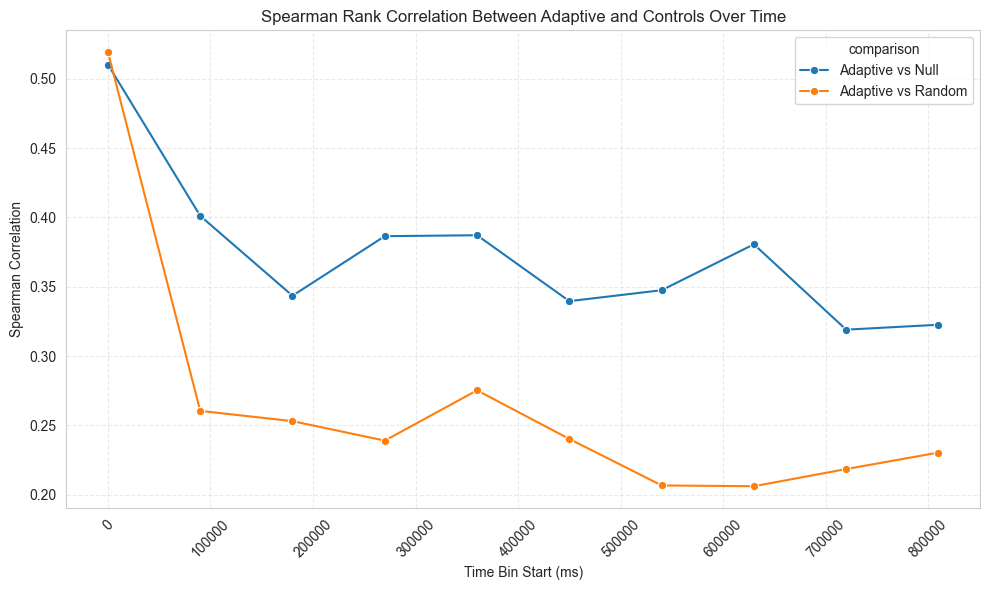

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load computed correlation results
df_rank_corr = pd.read_pickle("latency_analysis_cache/rank_order_correlation.pkl")

# Plot with lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_rank_corr,
    x="time_bin_start",
    y="spearman_corr",
    hue="comparison",
    marker="o"
)
plt.title("Spearman Rank Correlation Between Adaptive and Controls Over Time")
plt.xlabel("Time Bin Start (ms)")
plt.ylabel("Spearman Correlation")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [51]:
df_corr = pd.read_pickle("latency_analysis_cache/rank_order_correlation.pkl")
print("Columns in rank-order correlation DataFrame:")
print(df_corr.columns)
display(df_corr.head())

Columns in rank-order correlation DataFrame:
Index(['time_bin_start', 'comparison', 'spearman_corr'], dtype='object')


time_bin_start          comparison  spearman_corr
0               0    Adaptive vs Null       0.510413
1               0  Adaptive vs Random       0.519361
2           90000    Adaptive vs Null       0.401165
3           90000  Adaptive vs Random       0.260396
4          180000    Adaptive vs Null       0.343517

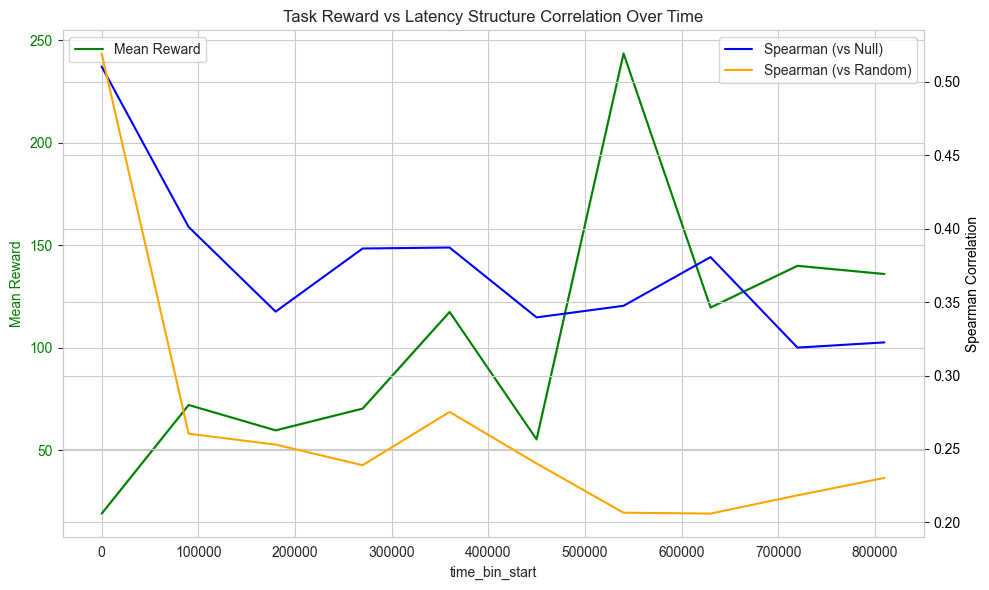

In [52]:
# Overlay of task performance with functional connectivity dynamics.

# Load the Spearman rank correlations from the .pkl file
# Load the smoothed Adaptive reward data
# Normalize and align the reward timeline to match latency bin time windows
# Overlay both trends (correlation vs control and reward performance) for visual comparison

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load correlation results ===
df_corr = pd.read_pickle("latency_analysis_cache/rank_order_correlation.pkl")

# === Load reward data for Adaptive ===
reward_df = ole.get_reward_df("Adaptive").copy()
reward_df["time_ms"] = reward_df["time"] * 1000  # convert to ms

# === Create time bins from correlation DataFrame ===
bin_edges = sorted(df_corr["time_bin_start"].unique())
reward_df["bin_start"] = pd.cut(
    reward_df["time_ms"],
    bins=[-1] + bin_edges[1:] + [reward_df["time_ms"].max()],
    labels=bin_edges,
    include_lowest=True
).astype(float)

# === Mean reward per bin ===
binned_reward = reward_df.groupby("bin_start")["reward"].mean().reset_index()
binned_reward.columns = ["time_bin_start", "mean_reward"]

# === Merge with correlation results ===
merged = df_corr.merge(binned_reward, on="time_bin_start", how="left")

# === Plot ===
plt.figure(figsize=(10, 6))

# Plot reward curve
ax1 = sns.lineplot(data=merged, x="time_bin_start", y="mean_reward", color="green", label="Mean Reward")
ax1.set_ylabel("Mean Reward", color="green")
ax1.tick_params(axis="y", labelcolor="green")

# Create second axis
ax2 = ax1.twinx()
sns.lineplot(data=merged[merged["comparison"] == "Adaptive vs Null"], x="time_bin_start", y="spearman_corr",
             ax=ax2, color="blue", label="Spearman (vs Null)")
sns.lineplot(data=merged[merged["comparison"] == "Adaptive vs Random"], x="time_bin_start", y="spearman_corr",
             ax=ax2, color="orange", label="Spearman (vs Random)")
ax2.set_ylabel("Spearman Correlation", color="black")
ax2.tick_params(axis="y", labelcolor="black")

plt.title("Task Reward vs Latency Structure Correlation Over Time")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [53]:
# Time series panel plots of top significant connections to illustrate how latencies and STTC evolved in time across training.
ole.plot_top_connection_trajectories(
    results=results,
    ts_latency=ole.ts_latency,
    ts_sttc=ole.ts_sttc,
    top_n=100  # or 10
)

In [54]:
# === Compute segmented causal matrices for Adaptive, Null, Random ===
for cond in ["Adaptive", "Null", "Random"]:
    ole.segment_and_compute_causal(
        condition=cond,
        bin_size_s=60,         # 1-minute bins
        max_latency_ms=30,     # Short causal window
        bin_size=5,            # Histogram resolution
        order="first",         # or 'multi'
        unit_ids=None          # Use all available units
    )

# === Analyze changes in latency trajectories over time ===
results = ole.analyze_all_latency_changes(
    bin_size_s=60,
    order="first",
    unit_ids=None,               # Or restrict to task units
    min_corr_diff=0.3,
    conditions=("Adaptive", "Null", "Random")
)

# === Convert to DataFrame and show significant pairs ===
import pandas as pd
df_results = pd.DataFrame(results)

# Filter to show only significant changes
significant_df = df_results[df_results["significant"] == True]

# Display significant changes
from IPython.display import display
print(f"Significant pairs found: {len(significant_df)}")
display(significant_df)

AttributeError: 'OrgLearningEval' object has no attribute 'analyze_all_latency_changes'

In [ ]:
# Compute all causal matrices (first 5 min) — restricted to training neurons
training_inds = ole.metadata["training_inds"]
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.compute_causal_matrices(cond, start_ms=600000, end_ms=900000, neuron_ids=training_inds)

# Show causal plots for each condition (restricted to training neurons)
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    first = ole.causal_latency_matrices[(cond, 600000, 900000)]
    multi = ole.multi_order_matrices[(cond, 600000, 900000)]
    ole.show_causal_plot_from_matrices(first, multi,
                                       title=f"Causal Matrices - {cond} (10–15 min)",
                                       inds=training_inds)

In [ ]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.show_firing_order_overlay(cond, start_ms=0, end_ms=300000)

In [ ]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.show_firing_order_overlay(cond, start_ms=600000, end_ms=900000)

In [ ]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_matrix_overlay(cond, start_ms=0, end_ms=300000)

In [ ]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_matrix_overlay(cond, start_ms=600000, end_ms=900000)

In [ ]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_spatial_overlay(cond, start_ms=0, end_ms=300000, threshold=0.3)

In [ ]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_spatial_overlay(cond, start_ms=600000, end_ms=900000, threshold=0.3)

In [ ]:
# Define the time window and comparison settings
start_ms = 0  # e.g., 10 min
end_ms = 300000    # e.g., 15 min
order = "first"    # or "multi"

# Run comparison for two conditions
diff_matrix, stats = ole.compare_causal_matrices("Baseline", "Adaptive",
                                                 order=order,
                                                 start_ms=start_ms,
                                                 end_ms=end_ms,
                                                 show_plot=True)

In [ ]:
# Print summary statistics of the difference matrix
print("Causal Matrix Comparison (Baseline → Adaptive):")
for key, value in stats.items():
    print(f"{key}: {value:.4f}")

# Convert to DataFrame for visual inspection (optional)
diff_df = pd.DataFrame(diff_matrix)
diff_df.style.background_gradient(cmap="bwr", axis=None)

In [ ]:
# Define time window and comparison settings
start_ms = 600000  # e.g., 10 min
end_ms = 900000    # e.g., 15 min
order = "first"    # or "multi"

# Run comparison for two conditions
diff_matrix, stats = ole.compare_causal_matrices("Baseline", "Adaptive",
                                                 order=order,
                                                 start_ms=start_ms,
                                                 end_ms=end_ms,
                                                 show_plot=True)

In [ ]:
# Print summary statistics of the difference matrix
print("Causal Matrix Comparison (Baseline → Adaptive):")
for key, value in stats.items():
    print(f"{key}: {value:.4f}")

# Convert to DataFrame for visual inspection (optional)
diff_df = pd.DataFrame(diff_matrix)
diff_df.style.background_gradient(cmap="bwr", axis=None)

In [ ]:
df_sttc_timecourse = OrgLearningEval.plot_sttc_over_time(
    ole,
    conditions=["Baseline", "Adaptive", "Random", "Null"],
    window_ms=60000,   # 1-minute windows
    step_ms=30000      # 30-second steps
)

In [ ]:
ole.compute_bursts()

In [ ]:
ole.show_burst_stats("Adaptive")
ole.show_within_burst_dynamics("Adaptive")
ole.show_burst_latency_consistency("Adaptive")
ole.show_burst_propagation("Adaptive")

In [ ]:
ole.compare_burst_stats()
ole.compare_within_burst_dynamics()
ole.compare_burst_latency_consistency()
ole.compare_burst_propagation()